In [4]:
#In this code, just change all csv-file-paths according to where the data is stored. Once
#that is done, run through all parts of the code one by one.
######################## SCENE 1 ########################

import numpy as np
import pandas as pd
#################################################################### 
######################## AVERAGE PUPIL SIZE ######################## 
####################################################################
avg_fix_dur_S1 = []
avr_pupil_S1 = []
avr_fix_dur_S1 = []
dur_interval_S1 = []
nr_sacc_S1 = []
dur_interval_S1 = []
avr_amp_S1 = []
unformatted_freq_sacc_S1 = []
unformatted_freq_fix_S1 = []
freq_sacc_S1 =[]
freq_fix_S1 =[]
avr_peak_velo_S1 = []
nr_fix_S1 = []
data_dict = {}

def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        # Wert zum Float konvertieren vor dem Vergleich
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/TOI/0-5/S1_Metrics_TOI0-5.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            # Um mit floats als auch integern arbeiten zu können
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))

#############################################
############# Pupil size ####################
#############################################
#Participant 113 is excluded because in the 0-5 time frame, s/he misses data
count = 101
for participant in data_dict:
        if len(avr_pupil_S1) < 18:
            if count not in (102,113,121):
                if count != 113:
                    S1_participant = data_dict.get(count, {})
                    S1_participant_data_list = list(S1_participant.values())
                    #print(S1_participant_data_list)
                    S1_float_list = [item[0] for item in S1_participant_data_list]
                    avr_pupil_S1.append(S1_float_list[12])
                    count = count + 1
                else: 
                    S1_participant = data_dict.get(count, {})
                    S1_participant_data_list = list(S1_participant.values())
                    #print(S1_participant_data_list)
                    S1_float_list = [item[0] for item in S1_participant_data_list]
                    #print(S1_float_list[7])
                    avr_pupil_S1.append(S1_float_list[7])
                    count = count + 1
            else:
                count = count + 1
                continue
        else: 
             break


#############################################
######## AVERAGE FIXATION DURATION ##########
#############################################

count = 101
for participant in data_dict:
    if len(avg_fix_dur_S1)<18:
        if count not in (102,113,122):
            S1_participant = data_dict.get(count, {})
            S1_participant_data_list = list(S1_participant.values())
            #print(S1_participant_data_list)
            S1_float_list = [item[0] for item in S1_participant_data_list]
            avg_fix_dur_S1.append(S1_float_list[6])
            count = count + 1
        else:
            count = count + 1
            continue
    else:
        break

        
#############################################
############# DURATION OF INTERVAL ##########
#############################################

count = 101
for participant in data_dict:
    if len(dur_interval_S1) < 18:
        if count not in (102,113,122):
            S1_participant = data_dict.get(count, {})
            S1_participant_data_list = list(S1_participant.values())
            #print(S1_participant_data_list)
            S1_float_list = [item[0] for item in S1_participant_data_list]
            #print(S4_float_list)
            dur_interval_S1.append(S1_float_list[2])
            count = count + 1
        else: 
            count = count + 1
            continue

    
#####################################
######## NUMBER OF SACCADES #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_sacc_S1) < 18:
        if count not in (102,113,122): 
            if count not in (113, 121):
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S1_float_list)
                nr_sacc_S1.append(S1_float_list[40])
                count = count + 1
            else: 
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S3_float_list)
                nr_sacc_S1.append(S1_float_list[11])
                count = count + 1
                continue
        else:
            count = count + 1
            continue

            
#####################################
######## FREQUENCY OF SACCADES ######
#####################################

for i in range(len(dur_interval_S1)):
    unformatted_result = dur_interval_S1[i] / nr_sacc_S1[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_sacc_S1.append(result)
    
for i in unformatted_freq_sacc_S1:
    freq_sacc_i = 1000/i
    freq_sacc_S1.append(freq_sacc_i)

##############################################
######## Average saccade peak velocity ######
##############################################

count = 101    
for participant in data_dict:
    if len(avr_peak_velo_S1) < 18:
        if count not in (102,113,122):
            if count not in (113, 121):
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S1_float_list)
                avr_peak_velo_S1.append(S1_float_list[41])
                count = count + 1
            else: 
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S1_float_list)
                avr_peak_velo_S1.append(S1_float_list[14])
                count = count + 1
                continue
        else:
            count = count + 1
            continue

###########################################################
############AVERAGE AMPLITUDE OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_amp_S1) < 18:
        if count not in (102,113,122):
            if count not in (113, 121):
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S1_float_list)
                avr_amp_S1.append(S1_float_list[45])
                #print(S1_float_list[45])
                count = count + 1
            else:
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S1_float_list)
                avr_amp_S1.append(S1_float_list[18])
                #print(S1_float_list)
                count = count + 1
        else:
            count = count + 1
            continue


#####################################
######## NUMBER OF Fixations #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_fix_S1) < 18:
        if count not in (102,113,122):
            if count not in (113, 120):
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S5_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S5_float_list)
                nr_fix_S1.append(S1_float_list[9])
                count = count + 1 
            else: 
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S1_float_list)
                nr_fix_S1.append(S1_float_list[6])
                count = count + 1
                continue
        else:
            count = count + 1
            continue

#####################################
######## FREQUENCY OF FIXATIONS ######
#####################################


for i in range(len(dur_interval_S1)):
    unformatted_result = dur_interval_S1[i] / nr_fix_S1[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_fix_S1.append(result)

for i in unformatted_freq_fix_S1:
    freq_fix_i = 1000/i
    freq_fix_S1.append(freq_fix_i)
print("done")


done


In [5]:
######################## SCENE 2 ########################

import numpy as np
import pandas as pd
#################################################################### 
######################## AVERAGE PUPIL SIZE ######################## 
####################################################################
avg_fix_dur_S2=[]
avr_pupil_S2 = []
dur_interval_S2 = []
nr_sacc_S2 = []
dur_interval_S2 = []
unformatted_freq_sacc_S2 = []
unformatted_freq_fix_S2 = []
freq_sacc_S2 = []
freq_fix_S2 = []
avr_peak_velo_S2 = []
avr_amp_S2 = []
nr_fix_S2 = []
data_dict = {}

def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        # Wert zum Float konvertieren vor dem Vergleich
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/TOI/0-5/S2_Metrics_TOI0-5.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            # Um mit floats als auch integern arbeiten zu können
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))


count = 101
for participant in data_dict:
    if len(avr_pupil_S2) < 18:
        if count not in (102,113,122):
            if count != 118:
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S2_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S2_float_list)
                avr_pupil_S2.append(S2_float_list[13])
                count = count + 1
            else: 
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S2_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                avr_pupil_S2.append(S2_float_list[13])
                count = count + 1
        else:
            count = count + 1
            continue
    else: 
            break



#############################################
############# DURATION OF INTERVAL ##########
#############################################

count = 101
for participant in data_dict:
    if len(dur_interval_S2) < 18:
        if count not in (102,113,122):
            S2_participant = data_dict.get(count, {})
            S2_participant_data_list = list(S2_participant.values())
            S2_float_list = [item[0] for item in S2_participant_data_list]
            #print(S4_float_list)
            dur_interval_S2.append(S2_float_list[2])
            count = count + 1
        else: 
            count = count + 1
            continue

#############################################
########## Average Fixation Duration ########
#############################################
  

count = 101
for participant in data_dict:
    if len(avg_fix_dur_S2) < 18:
        if count not in (102,113,122):
            if count not in (118, 121):
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S3_float_list)
                avg_fix_dur_S2.append(S2_float_list[7])
                count = count + 1
            else: 
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S3_float_list)
                avg_fix_dur_S2.append(S2_float_list[7])
                count = count + 1
                continue
        else:
            count = count + 1
            continue

#####################################
######## NUMBER OF SACCADES #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_sacc_S2) < 18:
        if count not in (102,113,122):
            if count not in (118, 121):
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S3_float_list)
                nr_sacc_S2.append(S2_float_list[41])
                count = count + 1
            else: 
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S3_float_list)
                nr_sacc_S2.append(S2_float_list[41])
                count = count + 1
                continue
        else:
            count = count + 1
            continue
            
######################################
######## FREQUENCY OF SACCADES ######
#####################################

for i in range(len(dur_interval_S2)):
    unformatted_result = dur_interval_S2[i] / nr_sacc_S2[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_sacc_S2.append(result)
    
for i in unformatted_freq_sacc_S2:
    freq_sacc_i = 1000/i
    freq_sacc_S2.append(freq_sacc_i)

##############################################
######## Average saccade peak velocity ######
##############################################
count = 101    
for participant in data_dict:
    if len(avr_peak_velo_S2) < 18:
        if count not in (102,113,122):
            if count not in (118, 121):
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S2_float_list)
                avr_peak_velo_S2.append(S2_float_list[42])
                count = count + 1
            else: 
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S2_float_list)
                avr_peak_velo_S2.append(S2_float_list[42])
                count = count + 1
                continue
        else:
            count = count + 1
            continue

###########################################################
############AVERAGE AMPLITUDE OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_amp_S2) < 18:
        if count not in (102,113,122):
            if count not in (118, 121):
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S2_float_list[45])
                avr_amp_S2.append(S2_float_list[46])
                count = count + 1
            else:
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S2_float_list[46])
                avr_amp_S2.append(S2_float_list[46])
                count = count + 1
        else:
            count=count+1
            continue
            
            
#####################################
######## NUMBER OF Fixations #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_fix_S2) < 18:
        if count not in (102,113,122):
            if count not in (118, 120):
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S5_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S5_float_list)
                nr_fix_S2.append(S2_float_list[10])
                count = count + 1 
            else: 
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S3_float_list)
                nr_fix_S2.append(S2_float_list[10])
                count = count + 1
        else:
            count=count+1
            continue

#####################################
######## FREQUENCY OF FIXATIONS ######
#####################################

for i in range(len(dur_interval_S2)):
    unformatted_result = dur_interval_S2[i] / nr_fix_S2[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_fix_S2.append(result)

for i in unformatted_freq_fix_S2:
    freq_fix_i = 1000/i
    freq_fix_S2.append(freq_fix_i)

print("done")

done


In [6]:
######################## SCENE 3 ########################

import numpy as np
import pandas as pd
#################################################################### 
######################## AVERAGE PUPIL SIZE ######################## 
####################################################################
avg_fix_dur_S3 = []
avr_pupil_S3 = []
dur_interval_S3 = []
nr_sacc_S3 = []
dur_interval_S3 = []
unformatted_freq_sacc_S3 = []
unformatted_freq_fix_S3 = []
freq_sacc_S3 =[]
freq_fix_S3 =[]
avr_peak_velo_S3 = []
avr_amp_S3 = []
nr_fix_S3 = []

data_dict = {}

def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        # Wert zum Float konvertieren vor dem Vergleich
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/TOI/0-5/S3_Metrics_TOI0-5.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            # Um mit floats als auch integern arbeiten zu können
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))



count = 101
for participant in data_dict:
    if len(avr_pupil_S3) < 18:
        if count not in (102,113,122):
            if count != 113:
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S1_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                avr_pupil_S3.append(S3_float_list[12])
                count = count + 1
            else: 
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S1_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list[6])
                avr_pupil_S3.append(S3_float_list[6])
                count = count + 1
        else:
            count = count + 1
            continue
    else: 
        break


#############################################
############# DURATION OF INTERVAL ##########
#############################################

count = 101
for participant in data_dict:
    if len(dur_interval_S3) < 18:
        if count not in (102,113,122):
            S3_participant = data_dict.get(count, {})
            S3_participant_data_list = list(S3_participant.values())
            #print(S6_participant_data_list)
            S3_float_list = [item[0] for item in S3_participant_data_list]
            #print(S4_float_list)
            dur_interval_S3.append(S3_float_list[2])
            count = count + 1
        else: 
            count = count + 1
            continue
            

#####################################
######## Duration of Fixation #########
#####################################

count = 101
for participant in data_dict:
    if len(avg_fix_dur_S3) < 18:
        if count not in (102,113,122):
            if count not in (113,121):
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                avg_fix_dur_S3.append(S3_float_list[6])
                count = count + 1
            else: 
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                avg_fix_dur_S3.append(S3_float_list[26])
                count = count + 1
                continue
        else:
            count=count+1
            continue

#####################################
######## NUMBER OF SACCADES #########
#####################################

count = 101
for participant in data_dict:
    if len(nr_sacc_S3) < 18:
        if count not in (102,113,122):
            if count not in (113, 121):
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                nr_sacc_S3.append(S3_float_list[40])
                count = count + 1
            else: 
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                nr_sacc_S3.append(S3_float_list[10])
                count = count + 1
                continue
        else:
            count=count+1
            continue
            
#####################################
######## FREQUENCY OF SACCADES ######
#####################################

for i in range(len(dur_interval_S3)):
    unformatted_result = dur_interval_S3[i] / nr_sacc_S3[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_sacc_S3.append(result)
    
for i in unformatted_freq_sacc_S3:
    freq_sacc_i = 1000/i
    freq_sacc_S3.append(freq_sacc_i)


##############################################
######## Average saccade peak velocity ######
##############################################
count = 101    
for participant in data_dict:
    if len(avr_peak_velo_S3) < 18:
        if count not in (102,113,122):
            if count not in (113, 121):
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                avr_peak_velo_S3.append(S3_float_list[41])
                count = count + 1
            else: 
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list[13])
                avr_peak_velo_S3.append(S3_float_list[13])
                count = count + 1
                continue
        else:
            count=count+1
            continue

###########################################################
############AVERAGE AMPLITUDE OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_amp_S3) < 18:
        if count not in (102,113,122):
            if count not in (113, 121):
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                avr_amp_S3.append(S3_float_list[45])
                count = count + 1
            else: 
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                avr_amp_S3.append(S3_float_list[17])
                count = count + 1
        else:
            count=count+1
            continue

#####################################
######## NUMBER OF Fixations #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_fix_S3) < 18:
        if count not in (102,113,122):
            if count not in (113, 120):
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S5_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S5_float_list)
                nr_fix_S3.append(S3_float_list[9])
                count = count + 1 
            else: 
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                nr_fix_S3.append(S3_float_list[5])
                count = count + 1
                continue
        else:
            count=count+1
            continue

#####################################
######## FREQUENCY OF FIXATIONS ######
#####################################

for i in range(len(dur_interval_S3)):
    unformatted_result = dur_interval_S3[i] / nr_fix_S3[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_fix_S3.append(result)

for i in unformatted_freq_fix_S3:
    freq_fix_i = 1000/i
    freq_fix_S3.append(freq_fix_i)

print("done")

done


In [7]:
######################## SCENE 4 ########################

import numpy as np
import pandas as pd
#################################################################### 
######################## AVERAGE PUPIL SIZE ######################## 
####################################################################
avr_fix_dur_S4 = []
avr_pupil_S4 = []
dur_interval_S4 = []
nr_sacc_S4 = []
unformatted_freq_sacc_S4 = []
unformatted_freq_fix_S4 = []
freq_sacc_S4 = []
avr_amp_S4 = []
avr_peak_velo_S4 = []
nr_fix_S4 = []
freq_fix_S4 = []
data_dict = {}

def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        # Wert zum Float konvertieren vor dem Vergleich
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/TOI/0-5/S4_Metrics_TOI0-5.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            # Um mit floats als auch integern arbeiten zu können
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))



count = 101
for participant in data_dict:
    if len(avr_pupil_S4) < 18:
        if count not in (101, 106, 108, 110,111):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S4_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            avr_pupil_S4.append(S4_float_list[12])
            count = count + 1
        else: 
            count = count + 1
            continue
#The for-construct does not, for some reason, add the last two IDs, which is why I add them "manually"
pupil_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(pupil_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
avr_pupil_S4.append(S4_117_float_list[12])


pupil_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(pupil_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
avr_pupil_S4.append(S4_118_float_list[12])


#############################################
############# DURATION OF INTERVAL ##########
#############################################

count = 101
for participant in data_dict:
    if len(dur_interval_S4) < 18:
        if count not in (101, 106, 108, 110,111):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S6_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            #print(S4_float_list)
            dur_interval_S4.append(S4_float_list[2])
            count = count + 1
        else: 
            count = count + 1
            continue

interval_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(interval_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
dur_interval_S4.append(S4_117_float_list[2])

interval_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(interval_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
dur_interval_S4.append(S4_118_float_list[2])



#####################################
######## Duration of Fixation #########
#####################################

count = 101
for participant in data_dict:
    if len(avr_fix_dur_S4) < 18:
        if count not in (101, 106, 108, 110,111):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S6_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            #print(S4_float_list)
            avr_fix_dur_S4.append(S4_float_list[6])
            count = count + 1
        else: 
            count = count + 1
            continue
    else: 
        break

avr_fix_dur_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(avr_fix_dur_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
#print(S4_117_float_list)
avr_fix_dur_S4.append(S4_117_float_list[6])

avr_fix_dur_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(avr_fix_dur_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
#print(S4_118_float_list)
avr_fix_dur_S4.append(S4_118_float_list[6])


#####################################
######## NUMBER OF SACCADES #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_sacc_S4) < 18:
        if count not in (101, 106, 108, 110,111):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S6_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            #print(S4_float_list)
            nr_sacc_S4.append(S4_float_list[40])
            count = count + 1
        else: 
            count = count + 1
            continue
    else: 
        break
           
nr_sacc_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(nr_sacc_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
#print(S4_118_float_list)
nr_sacc_S4.append(S4_117_float_list[40])

nr_sacc_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(nr_sacc_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
#print(S4_118_float_list)
nr_sacc_S4.append(S4_118_float_list[40])

#####################################
######## FREQUENCY OF SACCADES ######
#####################################
for i in range(len(nr_sacc_S4)):
    unformatted_result = dur_interval_S4[i] / nr_sacc_S4[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_sacc_S4.append(result)
    
for i in unformatted_freq_sacc_S4:
    freq_sacc_i = 1000/i
    freq_sacc_S4.append(freq_sacc_i)


##############################################
######## Average saccade peak velocity ######
##############################################
count = 101  
for participant in data_dict:
    if len(avr_peak_velo_S4) < 18:
        if count not in (101, 106, 108, 110,111):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S6_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            #print(S4_float_list)
            avr_peak_velo_S4.append(S4_float_list[41])
            count = count + 1
        else: 
            count = count + 1
            continue
##### 
avr_p_velo_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(avr_p_velo_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
#print(S4_117_float_list)
avr_peak_velo_S4.append(S4_117_float_list[41])

avr_p_velo_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(avr_p_velo_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
#print(S4_118_float_list)
avr_peak_velo_S4.append(S4_118_float_list[41])

###########################################################
############AVERAGE AMPLITUDE OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_amp_S4) < 18:
        if count not in (101, 106, 108, 110,111):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S6_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            #print(S4_float_list)
            avr_amp_S4.append(S4_float_list[45])
            count = count + 1
        else: 
            count = count + 1
            continue
###           
avr_amp_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(avr_amp_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
#print(S4_117_float_list)
avr_amp_S4.append(S4_117_float_list[45])

avr_amp_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(avr_amp_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
#print(S4_118_float_list)
avr_amp_S4.append(S4_118_float_list[45])

#####################################
######## NUMBER OF Fixations #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_fix_S4) < 18:
        if count not in (101, 106, 108, 110,111):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S5_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            #print(S4_float_list)
            nr_fix_S4.append(S4_float_list[9])
            count = count + 1
        else: 
            count = count + 1
            continue
    
           
nr_fix_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(nr_fix_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
#print(S4_118_float_list)
nr_fix_S4.append(S4_117_float_list[9])

nr_fix_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(nr_fix_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
#print(S4_118_float_list)
nr_fix_S4.append(S4_118_float_list[9])
               
#####################################
######## FREQUENCY OF FIXATIONS ######
#####################################

for i in range(len(dur_interval_S4)):
    unformatted_result = dur_interval_S4[i] / nr_fix_S4[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_fix_S4.append(result)


for i in unformatted_freq_fix_S4:
    freq_fix_i = 1000/i
    freq_fix_S4.append(freq_fix_i)

print("done")

done


In [8]:
######################## SCENE 5 ########################

import numpy as np
import pandas as pd
#################################################################### 
######################## AVERAGE PUPIL SIZE ######################## 
####################################################################
avr_fix_dur_S5 = []
avr_pupil_S5 = []
dur_interval_S5 = []
nr_sacc_S5 = []
avr_amp_S5 = []
avr_peak_velo_S5 =[]
unformatted_freq_sacc_S5 = []
unformatted_freq_fix_S5 = []
freq_sacc_S5 = []
nr_fix_S5 = []
freq_fix_S5 = []

data_dict = {}

def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        # Wert zum Float konvertieren vor dem Vergleich
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/TOI/0-5/S5_Metrics_TOI0-5.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))


count = 101
for participant in data_dict:
    if len(avr_pupil_S5) < 18:
        if count not in (102, 106, 108, 110, 113):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S5_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            avr_pupil_S5.append(S5_float_list[12])
            count = count + 1
        else: 
            count = count + 1
            continue

pupil_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(pupil_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
avr_pupil_S5.append(S5_115_float_list[12])

pupil_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(pupil_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
avr_pupil_S5.append(S5_116_float_list[12])

pupil_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(pupil_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S5_117_float_list)
avr_pupil_S5.append(S5_117_float_list[12])

pupil_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(pupil_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S5_118_float_list)
avr_pupil_S5.append(S5_118_float_list[12])



#############################################
############# DURATION OF INTERVAL ##########
#############################################

count = 101
for participant in data_dict:
    if len(dur_interval_S5) < 18:
        if count not in (102, 106, 108, 110, 113):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S6_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            dur_interval_S5.append(S5_float_list[2])
            count = count + 1
        else: 
            count = count + 1
            continue


intervall_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(intervall_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
dur_interval_S5.append(S5_115_float_list[2])

intervall_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(intervall_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
dur_interval_S5.append(S5_116_float_list[2])

intervall_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(intervall_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S6_117_float_list)
dur_interval_S5.append(S5_117_float_list[2])

intervall_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(intervall_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S6_118_float_list)
dur_interval_S5.append(S5_118_float_list[2])


#####################################
######## Fixation Duration #########
#####################################
avr_fix_dur_S5
count = 101
for participant in data_dict:
    if len(avr_fix_dur_S5) < 18:
        if count not in (102, 106, 108, 110, 113):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S6_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            avr_fix_dur_S5.append(S5_float_list[6])
            count = count + 1
        else: 
            count = count + 1
            continue

            
duration_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(duration_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
#print(S6_115_float_list)
avr_fix_dur_S5.append(S5_115_float_list[6])

duration_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(duration_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
#print(S6_116_float_list)
avr_fix_dur_S5.append(S5_116_float_list[6])

duration_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(duration_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S6_117_float_list)
avr_fix_dur_S5.append(S5_117_float_list[6])

duration_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(duration_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S6_118_float_list)
avr_fix_dur_S5.append(S5_118_float_list[6])


#####################################
######## NUMBER OF SACCADES #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_sacc_S5) < 18:
        if count not in (102, 106, 108, 110, 113):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S6_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            nr_sacc_S5.append(S5_float_list[40])
            count = count + 1
        else: 
            count = count + 1
            continue
            
nr_sacc_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(nr_sacc_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
nr_sacc_S5.append(S5_115_float_list[40])

nr_sacc_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(nr_sacc_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
nr_sacc_S5.append(S5_116_float_list[40])

nr_sacc_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(nr_sacc_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S6_117_float_list)
nr_sacc_S5.append(S5_117_float_list[40])

nr_sacc_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(nr_sacc_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S6_118_float_list)
nr_sacc_S5.append(S5_118_float_list[40])

#####################################
######## FREQUENCY OF SACCADES ######
#####################################

for i in range(len(dur_interval_S5)):
    unformatted_result = dur_interval_S5[i] / nr_sacc_S5[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_sacc_S5.append(result)
    
for i in unformatted_freq_sacc_S5:
    freq_sacc_i = 1000/i
    freq_sacc_S5.append(freq_sacc_i)

##############################################
######## Average saccade peak velocity ######
##############################################
count = 101    
for participant in data_dict:
    if len(avr_peak_velo_S5) < 18:
        if count not in (102, 106, 108, 110, 113):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S6_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            avr_peak_velo_S5.append(S5_float_list[41])
            count = count + 1
        else: 
            count = count + 1
            continue
            
avr_p_velo_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(avr_p_velo_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
#print(S6_115_float_list)
avr_peak_velo_S5.append(S5_115_float_list[41])

avr_p_velo_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(avr_p_velo_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
#print(S6_116_float_list)
avr_peak_velo_S5.append(S5_116_float_list[41])

avr_p_velo_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(avr_p_velo_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S6_117_float_list)
avr_peak_velo_S5.append(S5_117_float_list[41])

avr_p_velo_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(avr_p_velo_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S6_118_float_list)
avr_peak_velo_S5.append(S5_118_float_list[41])


###########################################################
############AVERAGE AMPLITUDE OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_amp_S5) < 18:
        if count not in (102, 106, 108, 110, 113):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S6_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            avr_amp_S5.append(S5_float_list[45])
            count = count + 1
        else: 
            count = count + 1
            continue

        
avr_amp_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(avr_amp_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
#print(S5_115_float_list)
avr_amp_S5.append(S5_115_float_list[45])

avr_amp_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(avr_amp_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
#print(S5_116_float_list)
avr_amp_S5.append(S5_116_float_list[45])

avr_amp_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(avr_amp_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S5_117_float_list)
avr_amp_S5.append(S5_117_float_list[45])

avr_amp_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(avr_amp_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S5_118_float_list)
avr_amp_S5.append(S5_118_float_list[45])

#####################################
######## NUMBER OF Fixations #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_fix_S5) < 18:
        if count not in (102, 106, 108, 110, 113):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S5_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            nr_fix_S5.append(S5_float_list[9])
            count = count + 1
        else: 
            count = count + 1
            continue
            
nr_fix_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(nr_fix_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
#print(S6_115_float_list)
nr_fix_S5.append(S5_115_float_list[9])

nr_fix_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(nr_fix_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
#print(S6_116_float_list)
nr_fix_S5.append(S5_116_float_list[9])

nr_fix_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(nr_fix_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S6_117_float_list)
nr_fix_S5.append(S5_117_float_list[9])

nr_fix_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(nr_fix_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S6_118_float_list)
nr_fix_S5.append(S5_118_float_list[9])
    
##########################
######## FREQUENCY OF FIXATIONS ######
#####################################

for i in range(len(dur_interval_S5)):
    unformatted_result = dur_interval_S5[i] / nr_fix_S5[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_fix_S5.append(result)

for i in unformatted_freq_fix_S5:
    freq_fix_i = 1000/i
    freq_fix_S5.append(freq_fix_i)

print("done")

done


In [11]:
######################## SCENE 6 ########################
import pandas as pd
import numpy as np
#############################################
###########AVERAGE PUPIL SIZE################
#############################################
avr_dur_fix_S6 = []
avr_pupil_S6 = []
dur_interval_S6 = []
nr_sacc_S6 = []
unformatted_freq_sacc_S6 = []
unformatted_freq_fix_S6 = []
avr_peak_velo_S6 = []
freq_sacc_S6 = []
avr_amp_S6 = []
nr_fix_S6 = []
freq_fix_S6 = []

data_dict = {}

def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        # Wert zum Float konvertieren vor dem Vergleich
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/TOI/0-5/S6_Metrics_TOI0-5.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            # Um mit floats als auch integern arbeiten zu können
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))

count = 101
for participant in data_dict:
    if len(avr_pupil_S6) < 18:
        #if count != 112:
        if count not in (102, 104, 106, 108, 110, 113):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            avr_pupil_S6.append(S6_float_list[12])
            count = count + 1
        else: 
            count = count + 1
            continue

pupil_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(pupil_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
avr_pupil_S6.append(S6_115_float_list[12])

pupil_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(pupil_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
avr_pupil_S6.append(S6_116_float_list[12])

#ID117 has missing data in this time frame which is why the participant is not added
pupil_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(pupil_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
#avr_pupil_S6.append(S6_117_float_list[12])

pupil_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(pupil_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
avr_pupil_S6.append(S6_118_float_list[12])
#print(avr_pupil_S6)


#############################################
############# DURATION OF INTERVAL ##########
#############################################

count = 101
for participant in data_dict:
    if len(dur_interval_S6) < 18:
        if count not in (102, 104, 106, 108, 110, 113):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            dur_interval_S6.append(S6_float_list[2])
            count = count + 1
        else: 
            count = count + 1
            continue
            
interval_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(interval_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
dur_interval_S6.append(S6_115_float_list[2])

interval_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(interval_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
dur_interval_S6.append(S6_116_float_list[2])

#ID117 has missing data in this time frame which is why the participant is not added
interval_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(interval_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
#dur_interval_S6.append(S6_117_float_list[2])

interval_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(interval_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
dur_interval_S6.append(S6_118_float_list[2])
#print(dur_interval_S6)

#####################################
######## Duration Fixations #########
#####################################

count = 101
for participant in data_dict:
    if len(avr_dur_fix_S6) < 18:
        if count not in (102, 104, 106, 108, 110, 113):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            avr_dur_fix_S6.append(S6_float_list[6])
            count = count + 1
        else: 
            count = count + 1
            continue
             
duration_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(duration_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
avr_dur_fix_S6.append(S6_115_float_list[6])

duration_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(duration_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
avr_dur_fix_S6.append(S6_116_float_list[6])

#ID117 has missing data in this time frame which is why the participant is not added
duration_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(duration_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
#avr_dur_fix_S6.append(S6_117_float_list[6])

duration_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(duration_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
avr_dur_fix_S6.append(S6_118_float_list[6])
 

#####################################
######## NUMBER OF SACCADES #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_sacc_S6) < 18:
        if count not in (102, 104, 106, 108, 110, 113):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            nr_sacc_S6.append(S6_float_list[40])
            count = count + 1
        else: 
            count = count + 1
            continue
             
nr_sacc_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(nr_sacc_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
nr_sacc_S6.append(S6_115_float_list[40])

nr_sacc_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(nr_sacc_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
nr_sacc_S6.append(S6_116_float_list[40])

#ID117 has missing data in this time frame which is why the participant is not added
nr_sacc_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(nr_sacc_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
#nr_sacc_S6.append(S6_117_float_list[40])

nr_sacc_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(nr_sacc_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
nr_sacc_S6.append(S6_118_float_list[40])

#####################################
######## FREQUENCY OF SACCADES ######
#####################################

for i in range(len(dur_interval_S6)):
    unformatted_result = dur_interval_S6[i] / nr_sacc_S6[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_sacc_S6.append(result)

for i in unformatted_freq_sacc_S6:
    freq_sacc_i = 1000/i
    freq_sacc_S6.append(freq_sacc_i)
    

###########################################################
############AVERAGE PEAK VELOCITY OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_peak_velo_S6) < 18:
        if count not in (102, 104, 106, 108, 110, 113):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            avr_peak_velo_S6.append(S6_float_list[41])
            count = count + 1
        else: 
            count = count + 1
            continue
                
avr_p_velo_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(avr_p_velo_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
avr_peak_velo_S6.append(S6_115_float_list[41])

avr_p_velo_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(avr_p_velo_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
avr_peak_velo_S6.append(S6_116_float_list[41])

#ID117 has missing data in this time frame which is why the participant is not added
avr_p_velo_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(avr_p_velo_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
#avr_peak_velo_S6.append(S6_117_float_list[41])

avr_p_velo_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(avr_p_velo_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
avr_peak_velo_S6.append(S6_118_float_list[41])

 
###########################################################
############AVERAGE AMPLITUDE OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_amp_S6) < 18:
        if count not in (102, 104, 106, 108, 110, 113):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            avr_amp_S6.append(S6_float_list[45])
            count = count + 1
        else: 
            count = count + 1
            continue
            
avr_amp_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(avr_amp_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
avr_amp_S6.append(S6_115_float_list[45])

avr_amp_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(avr_amp_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
avr_amp_S6.append(S6_116_float_list[45])

#ID117 has missing data in this time frame which is why the participant is not added
avr_amp_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(avr_amp_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
#avr_amp_S6.append(S6_117_float_list[45])

avr_amp_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(avr_amp_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
avr_amp_S6.append(S6_118_float_list[45])

#####################################
######## NUMBER OF Fixations #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_fix_S6) < 18:
        if count not in (102, 104, 106, 108, 110, 113):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            nr_fix_S6.append(S6_float_list[9])
            count = count + 1
        else: 
            count = count + 1
            continue

            
nr_fix_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(nr_fix_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
nr_fix_S6.append(S6_115_float_list[9])

nr_sacc_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(nr_sacc_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
nr_fix_S6.append(S6_116_float_list[9])

#ID117 has missing data in this time frame which is why the participant is not added
nr_sacc_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(nr_sacc_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
#nr_fix_S6.append(S6_117_float_list[9])

nr_sacc_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(nr_sacc_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
nr_fix_S6.append(S6_118_float_list[9])
  
#####################################
######## FREQUENCY OF FIXATIONS ######
#####################################

for i in range(len(dur_interval_S6)):
    unformatted_result = dur_interval_S6[i] / nr_fix_S6[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_fix_S6.append(result)

for i in unformatted_freq_fix_S6:
    freq_fix_i = 1000/i
    freq_fix_S6.append(freq_fix_i)


print("done")

done


16
16
16
13
13
11


(1.0, 9.0)

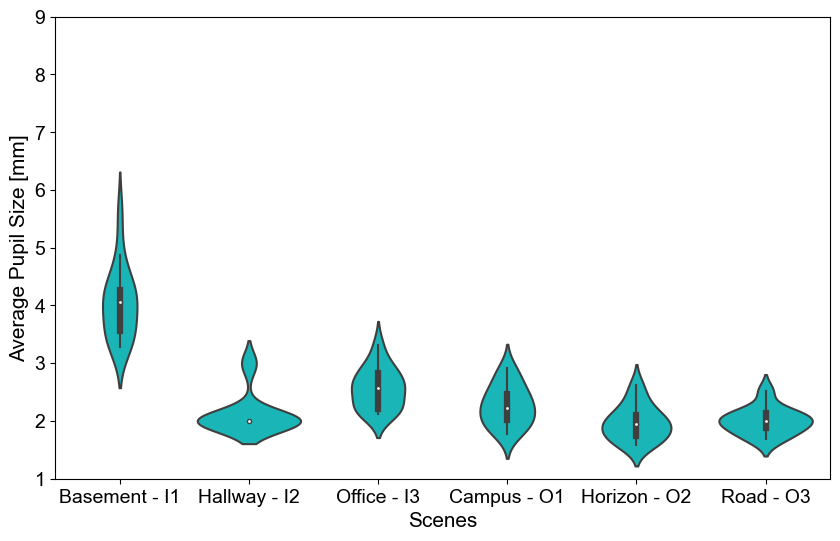

In [13]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd

pupil_list_all1 = [avr_pupil_S1, avr_pupil_S2, avr_pupil_S3, avr_pupil_S4, avr_pupil_S5, avr_pupil_S6]
for i in pupil_list_all1:
    print(len(i))

df_pupil = pd.DataFrame(pupil_list_all1).T

# Spaltennamen festlegen (optional)
column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_pupil.columns = column_names


#print(df_pupil)
plt.figure(figsize=(10, 6))
sea.violinplot(data=df_pupil, color="darkturquoise")
plt.xlabel('Scenes', fontsize=15, family='Arial')
plt.ylabel('Average Pupil Size [mm]', fontsize=15, family='Arial')
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.ylim(1,9)

16
16
16
13
13
11


(0.0, 2.5)

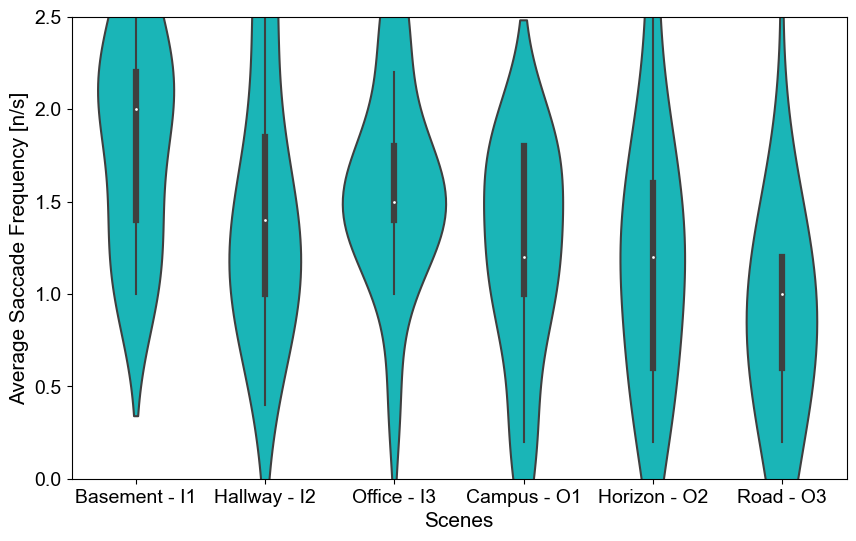

In [14]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd

nr_sacc_all = [freq_sacc_S1, freq_sacc_S2, freq_sacc_S3, freq_sacc_S4, freq_sacc_S5, freq_sacc_S6]
for i in nr_sacc_all:
    print(len(i))

df_sacc_all = pd.DataFrame(nr_sacc_all).T

column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_sacc_all.columns = column_names

#print(df_sacc_all)
plt.figure(figsize=(10, 6))
sea.violinplot(data=df_sacc_all, color="darkturquoise")
plt.xlabel('Scenes', fontsize=15, family='Arial')
plt.ylabel('Average Saccade Frequency [n/s]', fontsize=15, family='Arial')
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.ylim(0,2.5)




16
16
16
13
13
11
    Basement - I1  Hallway - I2  Office - I3  Campus - O1  Horizon - O2  \
0           284.0         195.0        220.0        271.0        208.60   
1           182.0         231.0        344.0        141.0        195.53   
2           297.0         259.0        240.0        220.0        166.48   
3           297.0         242.0        244.0        343.0        208.12   
4           192.0         309.0        406.0        158.0        240.82   
5           254.0         285.0        315.0        128.0        240.34   
6           328.0         241.0        231.0        231.0        263.82   
7           197.0         185.0        197.0        295.0        230.65   
8           213.0         231.0        285.0        256.0        145.97   
9           275.0         232.0        261.0        322.0        283.77   
10          177.0         191.0        246.0        217.0        278.65   
11          265.0         154.0        254.0        279.0        224.31   
12     

(100.0, 600.0)

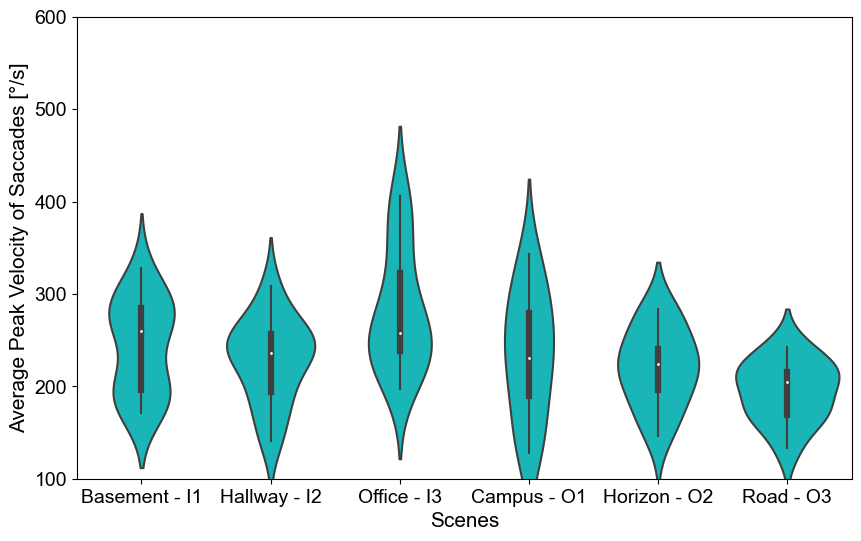

In [15]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd

avr_peak_velo_all = [avr_peak_velo_S1, avr_peak_velo_S2, avr_peak_velo_S3, avr_peak_velo_S4, avr_peak_velo_S5, avr_peak_velo_S6]
for i in avr_peak_velo_all:
    print(len(i))
df_velo_all = pd.DataFrame(avr_peak_velo_all).T

column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_velo_all.columns = column_names


print(df_velo_all)
plt.figure(figsize=(10, 6))
sea.violinplot(data=df_velo_all,color="darkturquoise")
plt.xlabel('Scenes', fontsize=15, family='Arial')
plt.ylabel('Average Peak Velocity of Saccades [°/s]', fontsize=15, family='Arial')
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.ylim(100,600)

16
16
16
13
13
11
    Basement - I1  Hallway - I2  Office - I3  Campus - O1  Horizon - O2  \
0             7.0           4.0         4.05         3.00          7.02   
1             4.0           7.0        11.48         3.14          6.79   
2             9.0           9.0         8.84         5.90          4.10   
3             8.0           6.0         7.56        12.00          5.91   
4             5.0          13.0         9.23         4.89          4.00   
5             9.0          11.0         9.22         4.25          7.33   
6             9.0           7.0         9.00         6.14          8.90   
7             7.0           9.0         8.22         8.34          9.02   
8             9.0          11.0        14.79         9.52          4.66   
9             7.0           7.0         7.11        10.31          8.97   
10            5.0           5.0         7.58         7.14         13.38   
11           14.0           4.0        10.08         6.95          5.50   
12     

(0.0, 15.0)

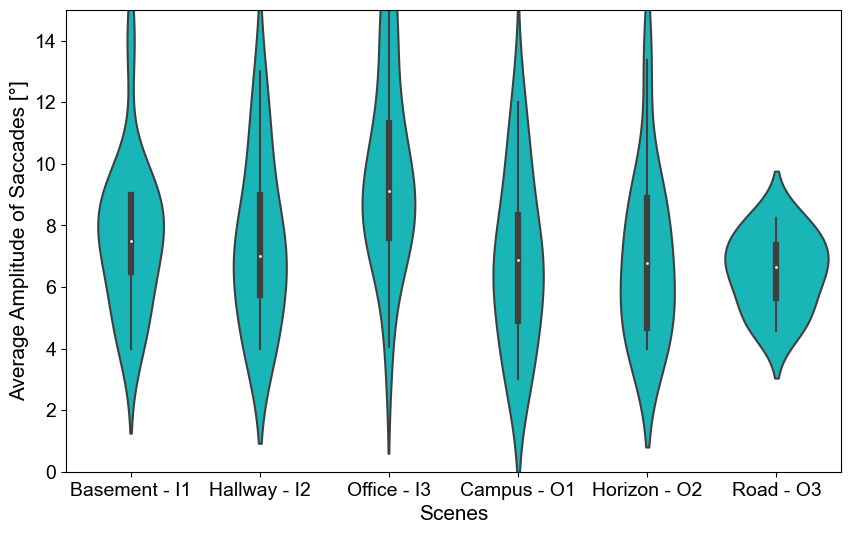

In [16]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd

avr_amp_all = [avr_amp_S1, avr_amp_S2, avr_amp_S3, avr_amp_S4, avr_amp_S5, avr_amp_S6]
for i in avr_amp_all:
    print(len(i))
df_amp_all = pd.DataFrame(avr_amp_all).T

column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_amp_all.columns = column_names

print(df_amp_all)
plt.figure(figsize=(10, 6))
sea.violinplot(data=df_amp_all,color="darkturquoise")
plt.xlabel('Scenes', fontsize=15, family='Arial')
plt.ylabel('Average Amplitude of Saccades [°]', fontsize=15, family='Arial')
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.ylim(0,15)



16
16
16
13
13
11
    Basement - I1  Hallway - I2  Office - I3  Campus - O1  Horizon - O2  \
0        3.799970      3.000030     4.000000     1.399992      2.399981   
1        2.199978      2.000000     1.799986     1.799986      1.799986   
2        2.599969      3.000030     2.000000     2.800022      2.800022   
3        2.399981      3.200000     2.800022     0.599999      1.600000   
4        2.800022      2.399981     1.000000     4.199916      2.000000   
5        3.399973      1.799986     2.000000     1.200005      1.799986   
6        2.599969      3.399973     3.200000     2.399981      3.399973   
7        2.199978      1.200005     3.399973     3.000030      3.000030   
8        1.399992      1.000000     1.399992     2.000000      2.399981   
9        3.399973      2.199978     2.199978     3.599971      3.200000   
10       3.000030      2.399981     3.000030     2.000000      2.599969   
11       1.799986      1.000000     1.600000     2.000000      2.000000   
12     

(0.0, 5.0)

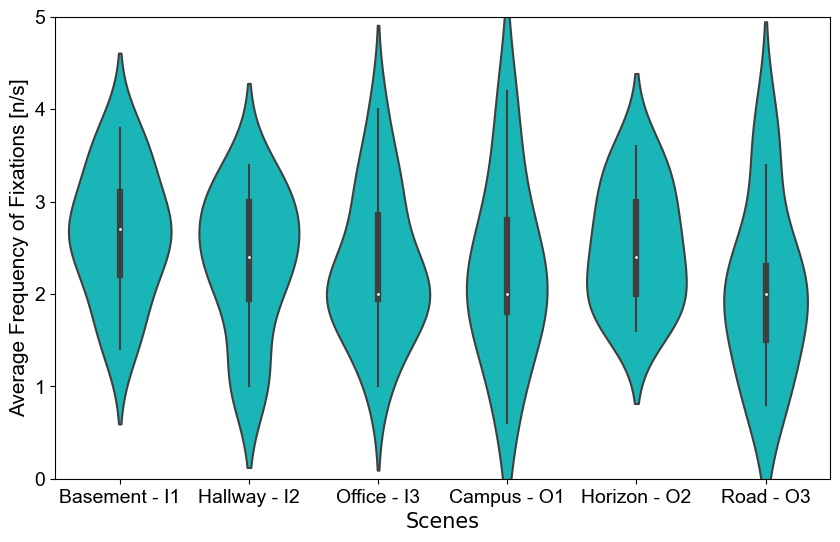

In [17]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd

freq_fix_all = [freq_fix_S1, freq_fix_S2, freq_fix_S3, freq_fix_S4, freq_fix_S5, freq_fix_S6]
for i in freq_fix_all:
    print(len(i))
df_fix_all = pd.DataFrame(freq_fix_all).T

column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_fix_all.columns = column_names

print(df_fix_all)
plt.figure(figsize=(10, 6))
sea.violinplot(data=df_fix_all, color="darkturquoise")
plt.xlabel('Scenes', fontsize=15)
plt.ylabel('Average Frequency of Fixations [n/s]', fontsize=15, family='Arial')
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.ylim(0,5)



16
16
16
13
13
11


(0.0, 3500.0)

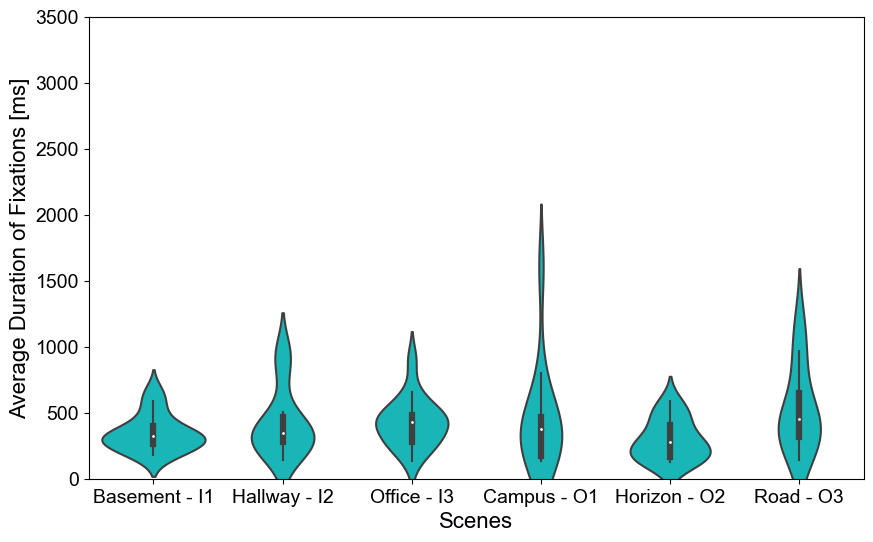

In [18]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd


avr_dur_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avr_fix_dur_S4, avr_fix_dur_S5, avr_dur_fix_S6]
for i in avr_dur_all:
    print(len(i))
df_dur_all = pd.DataFrame(avr_dur_all).T

# Spaltennamen festlegen (optional)
column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_dur_all.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_dur_all,color="darkturquoise")
plt.xlabel('Scenes', fontsize=16, family='Arial')
plt.ylabel('Average Duration of Fixations [ms]', fontsize=16, family='Arial')
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.ylim(0, 3500)

In [19]:
###Indoor vs. Outdoor###
##Average Pupil Size
pupil_in = []
pupil_out = []

print("Pupil in")
pupil_in.append(avr_pupil_S1)
pupil_in.append(avr_pupil_S2)
pupil_in.append(avr_pupil_S3)
pupil1 = (sum(avr_pupil_S1) + sum(avr_pupil_S2) + sum(avr_pupil_S3))
pupil2 = (len(avr_pupil_S1) + len(avr_pupil_S2) + len(avr_pupil_S3))
mean_pupil_in = pupil1/pupil2
print(pupil1)
print(pupil2)
print(mean_pupil_in)

print("Pupil out")
pupil_out.append(avr_pupil_S4)
pupil_out.append(avr_pupil_S5)
pupil_out.append(avr_pupil_S6)
pupil3 = (sum(avr_pupil_S4) + sum(avr_pupil_S5) + sum(avr_pupil_S6))
pupil4 = (len(avr_pupil_S4) + len(avr_pupil_S5) + len(avr_pupil_S6))
mean_pupil_out = pupil3/pupil4
print(pupil3)
print(pupil4)
print(mean_pupil_out)

##Average Saccade Peak Velocity
velo_in = []
velo_out = []

print("Velocity in")
velo_in.append(avr_peak_velo_S1)
velo_in.append(avr_peak_velo_S2)
velo_in.append(avr_peak_velo_S3)
velo1 = (sum(avr_peak_velo_S1) + sum(avr_peak_velo_S2) + sum(avr_peak_velo_S3))
velo2 = (len(avr_peak_velo_S1) + len(avr_peak_velo_S2) + len(avr_pupil_S2))
mean_velo_in = velo1/velo2
print(velo1)
print(velo2)
print(mean_velo_in)

print("Velocity out")
velo_out.append(avr_peak_velo_S4)
velo_out.append(avr_peak_velo_S5)
velo_out.append(avr_peak_velo_S6)
velo3 = (sum(avr_peak_velo_S4) + sum(avr_peak_velo_S5) + sum(avr_peak_velo_S6))
velo4 = (len(avr_peak_velo_S4) + len(avr_peak_velo_S5) + len(avr_peak_velo_S6))
mean_velo_out = velo3/velo4
print(velo3)
print(velo4)
print(mean_velo_out)

##Average Saccade Amplitude
amp_in = []
amp_out = []

print("Amplitude in")
amp_in.append(avr_amp_S1)
amp_in.append(avr_amp_S2)
amp_in.append(avr_amp_S3)

amp1 = (sum(avr_amp_S1) + sum(avr_amp_S2) + sum(avr_amp_S3))
amp2 = (len(avr_amp_S1) + len(avr_amp_S2) + len(avr_amp_S3))
mean_amp_in = amp1/amp2
print(amp1)
print(amp2)
print(mean_amp_in)

print("Amplitude out")
amp_out.append(avr_amp_S4)
amp_out.append(avr_amp_S5)
amp_out.append(avr_amp_S6)

amp3 = (sum(avr_amp_S4) + sum(avr_amp_S5) + sum(avr_amp_S6))
amp4 = (len(avr_amp_S4) + len(avr_amp_S5) + len(avr_amp_S6))
mean_amp_out = amp3/amp4
print(amp3)
print(amp4)
print(mean_amp_out)

##Average Saccade Frequency
freq_in = []
freq_out = []

print("Saccade Frequency in")
freq_in.append(freq_sacc_S1)
freq_in.append(freq_sacc_S2)
freq_in.append(freq_sacc_S3)

freq1 = (sum(freq_sacc_S1) + sum(freq_sacc_S2) + sum(freq_sacc_S3))
freq2 = (len(freq_sacc_S1) + len(freq_sacc_S2) + len(freq_sacc_S3))
mean_freq_in = freq1/freq2
print(freq1)
print(freq2)
print(mean_freq_in)

print("Saccade Frequency out")
freq_out.append(freq_sacc_S4)
freq_out.append(freq_sacc_S5)
freq_out.append(freq_sacc_S6)

freq3 = (sum(freq_sacc_S4) + sum(freq_sacc_S5) + sum(freq_sacc_S6))
freq4 = (len(freq_sacc_S4) + len(freq_sacc_S5) + len(freq_sacc_S6))
mean_freq_out = freq3/freq4
print(freq3)
print(freq4)
print(mean_freq_out)

##Average Fixation Duration
dur_in = []
dur_out = []

print("Duration in")
dur_in.append(avg_fix_dur_S1)
dur_in.append(avg_fix_dur_S2)
dur_in.append(avg_fix_dur_S3)

dur1 = (sum(avg_fix_dur_S1) + sum(avg_fix_dur_S2) + sum(avg_fix_dur_S3))
dur2 = (len(avg_fix_dur_S1) + len(avg_fix_dur_S2) + len(avg_fix_dur_S3))
mean_dur_in = dur1/dur2
print(dur1)
print(dur2)
print(mean_dur_in)

print("Duration out")
dur_out.append(avr_fix_dur_S4)
dur_out.append(avr_fix_dur_S5)
dur_out.append(avr_dur_fix_S6)

dur3 = (sum(avr_fix_dur_S4) + sum(avr_fix_dur_S5) + sum(avr_dur_fix_S6))
dur4 = (len(avr_fix_dur_S4) + len(avr_fix_dur_S5) + len(avr_dur_fix_S6))
mean_dur_out = dur3/dur4
print(dur3)
print(dur4)
print(mean_dur_out)

##Average Fixation Frequency
freqfix_in=[]
freqfix_out=[]

print("Fixation Frequency in")
freqfix_in.append(freq_fix_S1)
freqfix_in.append(freq_fix_S2)
freqfix_in.append(freq_fix_S3)

freqfix1 = (sum(freq_fix_S1) + sum(freq_fix_S2) + sum(freq_fix_S3))
freqfix2 = (len(freq_fix_S1) + len(freq_fix_S2) + len(freq_fix_S3))
mean_freqfix_in = freqfix1/freqfix2
print(freqfix1)
print(freqfix2)
print(mean_freqfix_in)

print("Fixation Frequency out")
freqfix_out.append(freq_fix_S4)
freqfix_out.append(freq_fix_S5)
freqfix_out.append(freq_fix_S6)


freqfix3 = (sum(freq_fix_S4) + sum(freq_fix_S5) + sum(freq_fix_S6))
freqfix4 = (len(freq_fix_S4) + len(freq_fix_S5) + len(freq_fix_S6))
mean_freqfix_out = freqfix3/freqfix4
print(freqfix_out)
print(mean_freqfix_out)



Pupil in
139.67384
48
2.909871666666667
Pupil out
77.27554
37
2.0885281081081084
Velocity in
12066.0
48
251.375
Velocity out
8060.59
37
217.8537837837838
Amplitude in
395.1
48
8.231250000000001
Amplitude out
249.84999999999997
37
6.752702702702702
Saccade Frequency in
78.19971040373116
48
1.6291606334110658
Saccade Frequency out
43.5999384012496
37
1.1783767135472865
Duration in
19227.0
48
400.5625
Duration out
15494.0
37
418.7567567567568
Fixation Frequency in
116.59976120697678
48
2.4291616918120162
Fixation Frequency out
[[1.3999916000503998, 1.7999856001151993, 2.8000224001792016, 0.5999988000024, 4.199916001679966, 1.2000048000192, 2.3999808001535987, 3.0000300003000033, 2.0, 3.5999712002303985, 2.0, 2.0, 2.1999780002199976], [2.3999808001535987, 1.7999856001151993, 2.8000224001792016, 1.6, 2.0, 1.7999856001151993, 3.3999728002175984, 3.0000300003000033, 2.3999808001535987, 3.2, 2.5999688003743953, 2.0, 3.5999712002303985], [3.3999728002175984, 1.7999856001151993, 0.8, 2.399980800

[3.7999696002431977, 2.1999780002199976, 2.5999688003743953, 2.3999808001535987, 2.8000224001792016, 3.3999728002175984, 2.5999688003743953, 2.1999780002199976, 1.3999916000503998, 3.3999728002175984, 3.0000300003000033, 1.7999856001151993, 1.6, 2.8000224001792016, 2.8000224001792016, 3.5999712002303985, 3.0000300003000033, 2.0, 3.0000300003000033, 3.2, 2.3999808001535987, 1.7999856001151993, 3.3999728002175984, 1.2000048000192, 1.0, 2.1999780002199976, 2.3999808001535987, 1.0, 3.0000300003000033, 2.3999808001535987, 2.8000224001792016, 2.5999688003743953, 4.0, 1.7999856001151993, 2.0, 2.8000224001792016, 1.0, 2.0, 3.2, 3.3999728002175984, 1.3999916000503998, 2.1999780002199976, 3.0000300003000033, 1.6, 2.0, 2.3999808001535987, 2.0, 2.0]
mean ffin5 2.4291616918120162
[1.3999916000503998, 1.7999856001151993, 2.8000224001792016, 0.5999988000024, 4.199916001679966, 1.2000048000192, 2.3999808001535987, 3.0000300003000033, 2.0, 3.5999712002303985, 2.0, 2.0, 2.1999780002199976, 2.39998080015

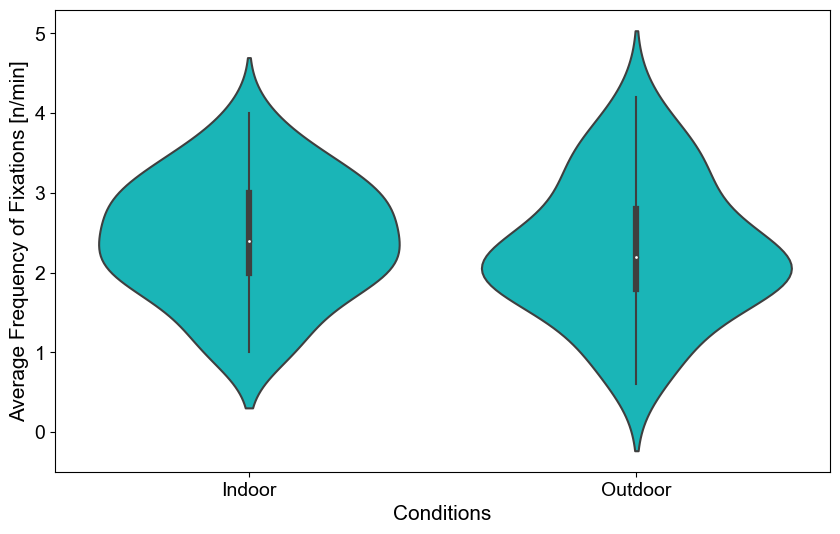

In [20]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats

#data_list_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avg_fix_dur_S4, avg_fix_dur_S5, avg_fix_dur_S6]
#df = pd.DataFrame(data_list_all)
#print(df)
# Liste aus Listen
ff_in5=[]
for item in freqfix_in:
    for i in item:
        ff_in5.append(i)
print(ff_in5)
print("mean ffin5 " + str(np.mean(ff_in5)))
ff_out5=[]
for item in freqfix_out:
    for i in item:
        ff_out5.append(i)
print(ff_out5)
print("mean ffout5 " + str(np.mean(ff_out5)))

fix_freq_all5 = [ff_in5, ff_out5]

# Liste von Listen in einen DataFrame umwandeln
df_fix_f5 = pd.DataFrame(fix_freq_all5).T
print(df_fix_f5)
# Spaltennamen festlegen (optional)
column_names = ["Indoor", "Outdoor"]
df_fix_f5.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_fix_f5, color="darkturquoise")
plt.xlabel('Conditions',family='Arial', fontsize=15)
plt.ylabel('Average Frequency of Fixations [n/min]', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks([0,1,2,3,4,5], family='Arial')  # Corrected yticks setting

# Durchführung des t-Tests für unabhängige Stichproben
t_statistic, p_value = stats.ttest_ind(ff_in5, ff_out5)


# Calculate Cohen's d
def cohen_d(group1, group2):
    mean_diff = np.mean(group1) - np.mean(group2)
    n1, n2 = len(group1), len(group2)
    #Using pooled SD as the group sizes are different between Indoor and Outdoor
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
    pooled_sd = np.sqrt(pooled_var)
    print("mean group1 " + str(np.mean(group1)))
    print("mean group2 " + str(np.mean(group2)))
    print("mean difference " + str(mean_diff))
    print("pooled sd " + str(pooled_sd))
    d = mean_diff / pooled_sd
    return d

cohen_d_value = cohen_d(ff_in5, ff_out5)
print("Cohen's d:", cohen_d_value)

# Ausgabe der Ergebnisse
print("T = 0 to 5s: Average Fixation Frequency T-Statistic:", t_statistic)
print("T = 0 to 5s: Average Fixation Frequency P-Value:", p_value)
print("Mean Fixation Frequency Indoor = " + str(mean_freqfix_in))
print("Mean Fixation Frequency Outdoor = " + str(mean_freqfix_out))

[[177.0, 421.0, 321.0, 327.0, 320.0, 219.0, 274.0, 388.0, 667.0, 240.0, 285.0, 502.0, 591.0, 313.0, 320.0, 188.0], [144.0, 450.0, 300.0, 245.0, 349.0, 506.0, 232.0, 807.0, 963.0, 374.0, 289.0, 954.0, 305.0, 359.0, 201.0, 345.0], [131.0, 518.0, 469.0, 265.0, 903.0, 448.0, 262.0, 253.0, 657.0, 418.0, 281.0, 570.0, 472.0, 348.0, 420.0, 436.0]]
[143.0, 510.0, 278.0, 1607.0, 143.0, 803.0, 346.0, 134.0, 374.0, 174.0, 458.0, 470.0, 421.0, 276.0, 407.0, 131.0, 591.0, 146.0, 510.0, 247.0, 275.0, 124.0, 186.0, 317.0, 466.0, 164.0, 144.0, 491.0, 1190.0, 316.0, 788.0, 970.0, 450.0, 400.0, 311.0, 508.0, 225.0]
        0       1
0   177.0   143.0
1   421.0   510.0
2   321.0   278.0
3   327.0  1607.0
4   320.0   143.0
5   219.0   803.0
6   274.0   346.0
7   388.0   134.0
8   667.0   374.0
9   240.0   174.0
10  285.0   458.0
11  502.0   470.0
12  591.0   421.0
13  313.0   276.0
14  320.0   407.0
15  188.0   131.0
16  144.0   591.0
17  450.0   146.0
18  300.0   510.0
19  245.0   247.0
20  349.0   275.0

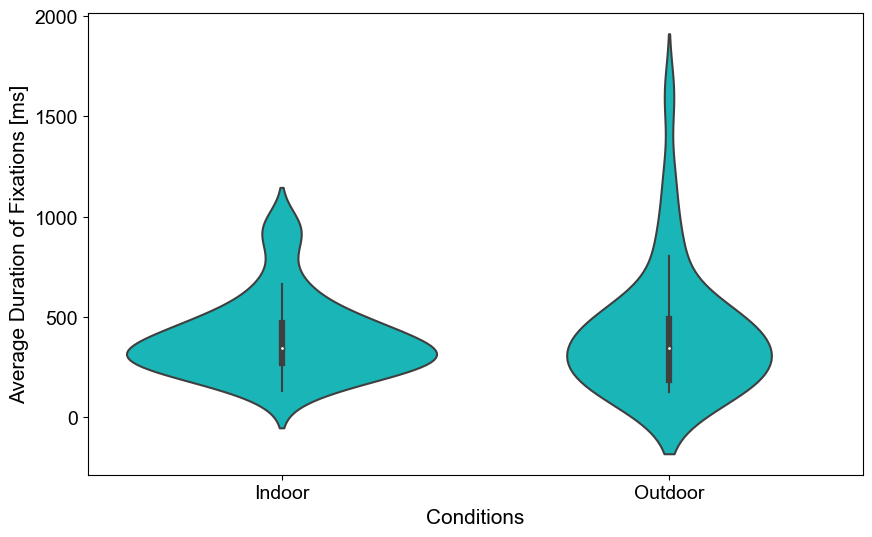

In [21]:
#Hier plotte ich für jede Frage die Ergebnisse über die Scene hinweg!
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats

#data_list_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avg_fix_dur_S4, avg_fix_dur_S5, avg_fix_dur_S6]
#df = pd.DataFrame(data_list_all)
#print(df)
# Liste aus Listen
Fdur_in5=[]
for item in dur_in:
    for i in item:
        Fdur_in5.append(i)
print(dur_in)

Fdur_out5=[]
for item in dur_out:
    for i in item:
        Fdur_out5.append(i)
print(Fdur_out5)

Fdur_all5 = [Fdur_in5, Fdur_out5]

# Liste von Listen in einen DataFrame umwandeln
df_fdur_f5 = pd.DataFrame(Fdur_all5).T
print(df_fdur_f5)
# Spaltennamen festlegen (optional)
column_names = ["Indoor", "Outdoor"]
df_fdur_f5.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_fdur_f5, color="darkturquoise")
plt.xlabel('Conditions',family='Arial', fontsize=15)
plt.ylabel('Average Duration of Fixations [ms]', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks(family='Arial')  # Corrected yticks setting

# Durchführung des t-Tests für unabhängige Stichproben
t_statistic, p_value = stats.ttest_ind(Fdur_in5, Fdur_out5)


# Calculate Cohen's d
def cohen_d(group1, group2):
    mean_diff = np.mean(group1) - np.mean(group2)
    n1, n2 = len(group1), len(group2)
    #Using pooled SD as the group sizes are different between Indoor and Outdoor
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
    pooled_sd = np.sqrt(pooled_var)
    print("mean group1 " + str(np.mean(group1)))
    print("mean group2 " + str(np.mean(group2)))
    print("mean difference " + str(mean_diff))
    print("pooled sd " + str(pooled_sd))
    d = mean_diff / pooled_sd
    return d

cohen_d_value = cohen_d(Fdur_in5, Fdur_out5)
print("Cohen's d:", cohen_d_value)
# Ausgabe der Ergebnisse
print("Average Fixation Duration T-Statistic:", t_statistic)
print("Average Fixation Duration P-Value:", p_value)
print("Mean Indoor = " + str(mean_dur_in))
print("Mean Outdoor = " + str(mean_dur_out))


[2.0, 1.7999856001151993, 2.1999780002199976, 1.0, 2.1999780002199976, 2.3999808001535987, 1.0, 1.3999916000503998, 1.0, 2.8000224001792016, 2.0, 1.3999916000503998, 1.3999916000503998, 2.0, 2.5999688003743953, 2.1999780002199976, 1.0, 1.3999916000503998, 2.8000224001792016, 0.8, 2.0, 1.3999916000503998, 2.3999808001535987, 1.0, 0.8, 1.3999916000503998, 1.2000048000192, 0.4, 2.8000224001792016, 1.3999916000503998, 1.0, 1.7999856001151993, 1.3999916000503998, 1.6, 1.7999856001151993, 1.6, 0.4, 1.3999916000503998, 2.3999808001535987, 2.5999688003743953, 1.0, 1.7999856001151993, 2.1999780002199976, 1.2000048000192, 1.6, 1.3999916000503998, 1.3999916000503998, 1.3999916000503998]
[0.2, 1.2000048000192, 1.7999856001151993, 0.2, 1.6, 0.8, 1.0, 1.2000048000192, 1.0, 1.7999856001151993, 1.3999916000503998, 1.7999856001151993, 1.7999856001151993, 1.2000048000192, 0.5999988000024, 0.5999988000024, 1.2000048000192, 0.2, 1.0, 2.8000224001792016, 2.0, 0.4, 1.7999856001151993, 1.2000048000192, 1.399

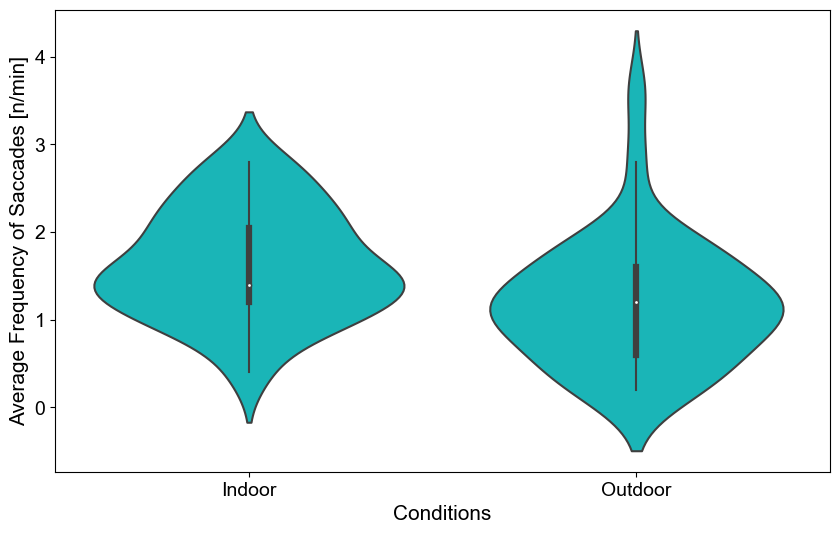

In [22]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats

#data_list_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avg_fix_dur_S4, avg_fix_dur_S5, avg_fix_dur_S6]
#df = pd.DataFrame(data_list_all)
#print(df)
# Liste aus Listen
Sfreq_in5=[]
for item in freq_in:
    for i in item:
        Sfreq_in5.append(i)
print(Sfreq_in5)

Sfreq_out5=[]
for item in freq_out:
    for i in item:
        Sfreq_out5.append(i)
print(Sfreq_out5)

Sfreq_all5 = [Sfreq_in5, Sfreq_out5]

# Liste von Listen in einen DataFrame umwandeln
df_Sfreq_f5 = pd.DataFrame(Sfreq_all5).T
print(df_Sfreq_f5)
# Spaltennamen festlegen (optional)
column_names = ["Indoor", "Outdoor"]
df_Sfreq_f5.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_Sfreq_f5, color="darkturquoise")
plt.xlabel('Conditions',family='Arial', fontsize=15)
plt.ylabel('Average Frequency of Saccades [n/min]', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks(family='Arial')  # Corrected yticks setting

# Durchführung des t-Tests für unabhängige Stichproben
t_statistic, p_value = stats.ttest_ind(Sfreq_in5, Sfreq_out5)

# Calculate Cohen's d
def cohen_d(group1, group2):
    mean_diff = np.mean(group1) - np.mean(group2)
    n1, n2 = len(group1), len(group2)
    #Using pooled SD as the group sizes are different between Indoor and Outdoor
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
    pooled_sd = np.sqrt(pooled_var)
    print("mean group1 " + str(np.mean(group1)))
    print("mean group2 " + str(np.mean(group2)))
    print("mean difference " + str(mean_diff))
    print("pooled sd " + str(pooled_sd))
    d = mean_diff / pooled_sd
    return d

cohen_d_value = cohen_d(Sfreq_in5, Sfreq_out5)
print("Cohen's d:", cohen_d_value)

# Ausgabe der Ergebnisse
print("Average Frequency of Saccades T-Statistic:", t_statistic)
print("Average Frequency of Saccades P-Value:", p_value)

print("Mean Indoor = " + str(mean_freq_in))
print("Mean Outdoor = " + str(mean_freq_out))


[7.0, 4.0, 9.0, 8.0, 5.0, 9.0, 9.0, 7.0, 9.0, 7.0, 5.0, 14.0, 8.0, 5.0, 7.0, 9.0, 4.0, 7.0, 9.0, 6.0, 13.0, 11.0, 7.0, 9.0, 11.0, 7.0, 5.0, 4.0, 8.0, 6.0, 7.0, 4.0, 4.05, 11.48, 8.84, 7.56, 9.23, 9.22, 9.0, 8.22, 14.79, 7.11, 7.58, 10.08, 7.56, 11.28, 13.61, 15.49]
[3.0, 3.14, 5.9, 12.0, 4.89, 4.25, 6.14, 8.34, 9.52, 10.31, 7.14, 6.95, 6.87, 7.02, 6.79, 4.1, 5.91, 4.0, 7.33, 8.9, 9.02, 4.66, 8.97, 13.38, 5.5, 4.37, 4.87, 7.42, 8.0, 6.87, 6.66, 5.34, 4.56, 8.24, 6.27, 5.93, 7.29]
        0      1
0    7.00   3.00
1    4.00   3.14
2    9.00   5.90
3    8.00  12.00
4    5.00   4.89
5    9.00   4.25
6    9.00   6.14
7    7.00   8.34
8    9.00   9.52
9    7.00  10.31
10   5.00   7.14
11  14.00   6.95
12   8.00   6.87
13   5.00   7.02
14   7.00   6.79
15   9.00   4.10
16   4.00   5.91
17   7.00   4.00
18   9.00   7.33
19   6.00   8.90
20  13.00   9.02
21  11.00   4.66
22   7.00   8.97
23   9.00  13.38
24  11.00   5.50
25   7.00   4.37
26   5.00   4.87
27   4.00   7.42
28   8.00   8.00
29   6

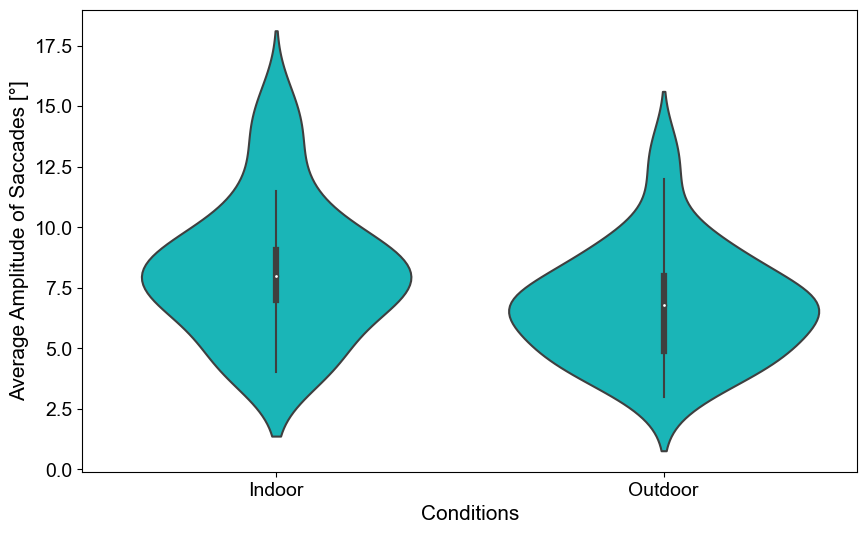

In [23]:
#Hier plotte ich für jede Frage die Ergebnisse über die Scene hinweg!
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats

#data_list_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avg_fix_dur_S4, avg_fix_dur_S5, avg_fix_dur_S6]
#df = pd.DataFrame(data_list_all)
#print(df)
# Liste aus Listen
Samp_in5=[]
for item in amp_in:
    for i in item:
        Samp_in5.append(i)
print(Samp_in5)

Samp_out5=[]
for item in amp_out:
    for i in item:
        Samp_out5.append(i)
print(Samp_out5)

Samp_all5 = [Samp_in5, Samp_out5]

# Liste von Listen in einen DataFrame umwandeln
df_Samp_f5 = pd.DataFrame(Samp_all5).T
print(df_Samp_f5)
# Spaltennamen festlegen (optional)
column_names = ["Indoor", "Outdoor"]
df_Samp_f5.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_Samp_f5, color="darkturquoise")
plt.xlabel('Conditions',family='Arial', fontsize=15)
plt.ylabel('Average Amplitude of Saccades [°]', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks(family='Arial')  # Corrected yticks setting

# Durchführung des t-Tests für unabhängige Stichproben
t_statistic, p_value = stats.ttest_ind(Samp_in5, Samp_out5)

# Calculate Cohen's d
def cohen_d(group1, group2):
    mean_diff = np.mean(group1) - np.mean(group2)
    n1, n2 = len(group1), len(group2)
    #Using pooled SD as the group sizes are different between Indoor and Outdoor
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
    pooled_sd = np.sqrt(pooled_var)
    print("mean group1 " + str(np.mean(group1)))
    print("mean group2 " + str(np.mean(group2)))
    print("mean difference " + str(mean_diff))
    print("pooled sd " + str(pooled_sd))
    d = mean_diff / pooled_sd
    return d

cohen_d_value = cohen_d(Samp_in5, Samp_out5)
print("Cohen's d:", cohen_d_value)

# Ausgabe der Ergebnisse
print("Average Saccade Amplitude T-Statistic:", t_statistic)
print("Average Saccade Amplitude P-Value:", p_value)
print("Mean Indoor = " + str(mean_amp_in))
print("Mean Outdoor = " + str(mean_amp_out))


[284.0, 182.0, 297.0, 297.0, 192.0, 254.0, 328.0, 197.0, 213.0, 275.0, 177.0, 265.0, 289.0, 171.0, 203.0, 267.0, 195.0, 231.0, 259.0, 242.0, 309.0, 285.0, 241.0, 185.0, 231.0, 232.0, 191.0, 154.0, 256.0, 251.0, 259.0, 141.0, 220.0, 344.0, 240.0, 244.0, 406.0, 315.0, 231.0, 197.0, 285.0, 261.0, 246.0, 254.0, 283.0, 219.0, 372.0, 396.0]
[271.0, 141.0, 220.0, 343.0, 158.0, 128.0, 231.0, 295.0, 256.0, 322.0, 217.0, 279.0, 190.0, 208.6, 195.53, 166.48, 208.12, 240.82, 240.34, 263.82, 230.65, 145.97, 283.77, 278.65, 224.31, 177.53, 185.0, 231.0, 215.0, 243.0, 167.0, 133.0, 170.0, 205.0, 215.0, 169.0, 212.0]
        0       1
0   284.0  271.00
1   182.0  141.00
2   297.0  220.00
3   297.0  343.00
4   192.0  158.00
5   254.0  128.00
6   328.0  231.00
7   197.0  295.00
8   213.0  256.00
9   275.0  322.00
10  177.0  217.00
11  265.0  279.00
12  289.0  190.00
13  171.0  208.60
14  203.0  195.53
15  267.0  166.48
16  195.0  208.12
17  231.0  240.82
18  259.0  240.34
19  242.0  263.82
20  309.0  23

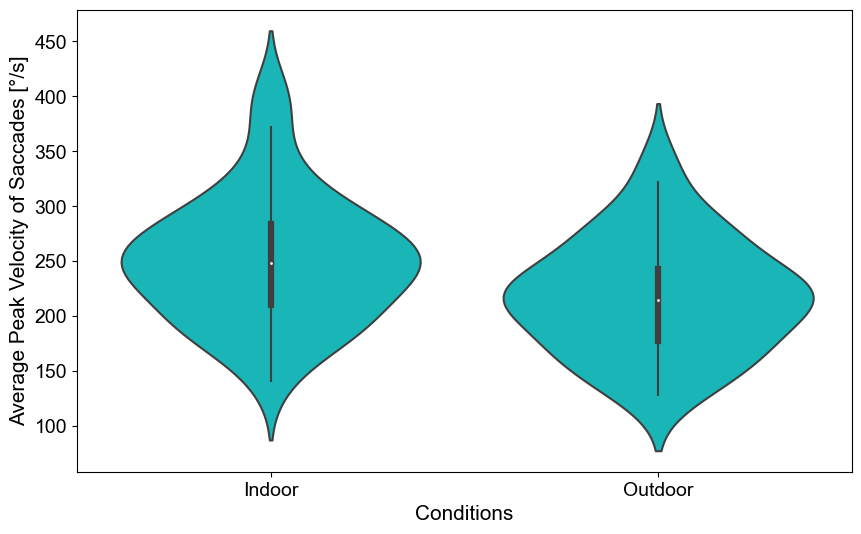

In [24]:
#Hier plotte ich für jede Frage die Ergebnisse über die Scene hinweg!
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats

#data_list_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avg_fix_dur_S4, avg_fix_dur_S5, avg_fix_dur_S6]
#df = pd.DataFrame(data_list_all)
#print(df)
# Liste aus Listen
Svelo_in5=[]
for item in velo_in:
    for i in item:
        Svelo_in5.append(i)
print(Svelo_in5)

Svelo_out5=[]
for item in velo_out:
    for i in item:
        Svelo_out5.append(i)
print(Svelo_out5)

Svelo_all5 = [Svelo_in5, Svelo_out5]

# Liste von Listen in einen DataFrame umwandeln
df_Svelo_f5 = pd.DataFrame(Svelo_all5).T
print(df_Svelo_f5)
# Spaltennamen festlegen (optional)
column_names = ["Indoor", "Outdoor"]
df_Svelo_f5.columns = column_names
####5

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_Svelo_f5, color="darkturquoise")
plt.xlabel('Conditions',family='Arial', fontsize=15)
plt.ylabel('Average Peak Velocity of Saccades [°/s]', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks(family='Arial')  # Corrected yticks setting

# Durchführung des t-Tests für unabhängige Stichproben
t_statistic, p_value = stats.ttest_ind(Svelo_in5, Svelo_out5)

# Calculate Cohen's d
def cohen_d(group1, group2):
    mean_diff = np.mean(group1) - np.mean(group2)
    n1, n2 = len(group1), len(group2)
    #Using pooled SD as the group sizes are different between Indoor and Outdoor
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
    pooled_sd = np.sqrt(pooled_var)
    print("mean group1 " + str(np.mean(group1)))
    print("mean group2 " + str(np.mean(group2)))
    print("mean difference " + str(mean_diff))
    print("pooled sd " + str(pooled_sd))
    d = mean_diff / pooled_sd
    return d

cohen_d_value = cohen_d(Svelo_in5, Svelo_out5)
print("Cohen's d:", cohen_d_value)

# Ausgabe der Ergebnisse
print("Average Velocity of Saccades T-Statistic:", t_statistic)
print("Average Velocity of Saccades P-Value:", p_value)
print("Mean Indoor = " + str(mean_velo_in))
print("Mean Outdoor = " + str(mean_velo_out))


[3.82625, 3.66701, 4.25383, 4.14954, 3.3801, 3.60953, 4.20254, 4.51101, 5.60249, 3.99576, 4.87618, 4.13796, 3.39919, 3.28499, 4.31735, 3.40346, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.51135, 2.88497, 2.13464, 2.63752, 2.19583, 2.35937, 2.56205, 2.61041, 3.0347, 3.31958, 2.81122, 2.21266, 2.21305, 2.58874, 2.11733, 2.86323]
[1.86593, 2.01488, 2.19347, 2.77124, 2.0906, 2.30634, 2.91024, 2.45911, 1.9325, 2.22346, 2.45179, 2.59664, 1.77112, 1.88527, 1.96265, 1.73689, 2.37929, 1.68297, 1.93979, 2.2152, 2.61563, 1.84307, 2.10991, 2.05157, 1.6207, 1.58376, 1.95249, 2.14875, 1.85501, 1.89188, 2.01947, 2.11472, 2.00209, 1.71979, 2.51631, 2.15947, 1.68154]
          0        1
0   3.82625  1.86593
1   3.66701  2.01488
2   4.25383  2.19347
3   4.14954  2.77124
4   3.38010  2.09060
5   3.60953  2.30634
6   4.20254  2.91024
7   4.51101  2.45911
8   5.60249  1.93250
9   3.99576  2.22346
10  4.87618  2.45179
11  4.13796  2.59664
12  3.39919  1.77112
13  3.284

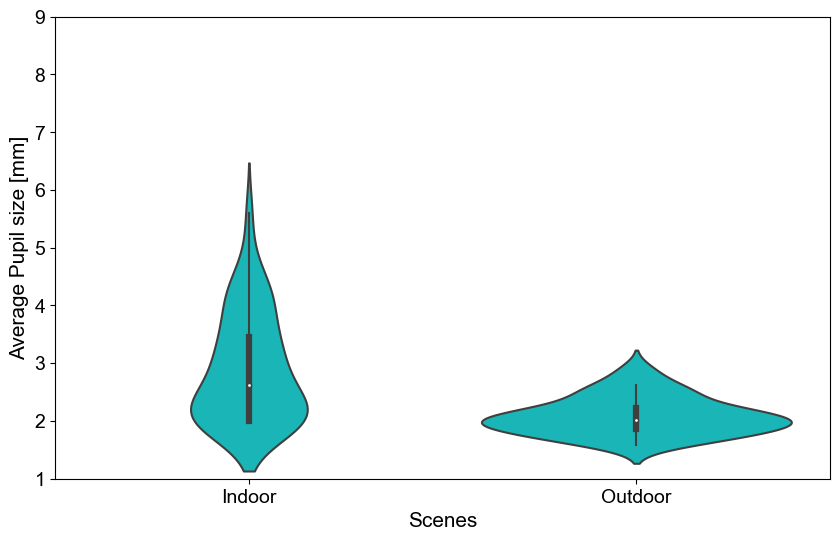

In [25]:
#Hier plotte ich für jede Frage die Ergebnisse über die Scene hinweg!
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats

#data_list_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avg_fix_dur_S4, avg_fix_dur_S5, avg_fix_dur_S6]
#df = pd.DataFrame(data_list_all)
#print(df)
# Liste aus Listen
Pup_in=[]
for item in pupil_in:
    for i in item:
        Pup_in.append(i)
print(Pup_in)

Pup_out=[]
for item in pupil_out:
    for i in item:
        Pup_out.append(i)
print(Pup_out)

Pup_all = [Pup_in, Pup_out]

# Liste von Listen in einen DataFrame umwandeln
df_Pup_f5 = pd.DataFrame(Pup_all).T
print(df_Pup_f5)
# Spaltennamen festlegen (optional)
column_names_IO = ["Indoor", "Outdoor"]
df_Pup_f5.columns = column_names_IO
####
df_combinded = []

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_Pup_f5, color="darkturquoise")
plt.xlabel('Scenes',family='Arial', fontsize=15)
plt.ylabel('Average Pupil size [mm]', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks(family='Arial')  # Corrected yticks setting
plt.ylim(1,9)

# Durchführung des t-Tests für unabhängige Stichproben
t_statistic, p_value = stats.ttest_ind(Pup_in, Pup_out)

# Calculate Cohen's d
def cohen_d(group1, group2):
    mean_diff = np.mean(group1) - np.mean(group2)
    n1, n2 = len(group1), len(group2)
    #Using pooled SD as the group sizes are different between Indoor and Outdoor
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
    pooled_sd = np.sqrt(pooled_var)
    print("mean group1 " + str(np.mean(group1)))
    print("mean group2 " + str(np.mean(group2)))
    print("mean difference " + str(mean_diff))
    print("pooled sd " + str(pooled_sd))
    d = mean_diff / pooled_sd
    return d

cohen_d_value = cohen_d(Pup_in, Pup_out)
print("Cohen's d:", cohen_d_value)

# Ausgabe der Ergebnisse
print("Average Pupil size T-Statistic:", t_statistic)
print("Average Pupil size P-Value:", p_value)
print("Mean Indoor = " + str(mean_pupil_in))
print("Mean Outdoor = " + str(mean_pupil_out))


In [26]:
######################## SCENE 1 ########################

import numpy as np
import pandas as pd
#################################################################### 
######################## AVERAGE PUPIL SIZE ######################## 
####################################################################
avg_fix_dur_S1 = []
avr_pupil_S1 = []
avr_fix_dur_S1 = []
dur_interval_S1 = []
nr_sacc_S1 = []
dur_interval_S1 = []
avr_amp_S1 = []
unformatted_freq_sacc_S1 = []
unformatted_freq_fix_S1 = []
freq_sacc_S1 =[]
freq_fix_S1 =[]
avr_peak_velo_S1 = []
nr_fix_S1 = []
#Erstelle Dictionary für alle Daten
data_dict = {}

#Funktionen zum Finden der korrekten Zahlenwerte bzw. umwandeln
def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        # Wert zum Float konvertieren vor dem Vergleich
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/TOI/5-10/S1_Metrics_TOI5-10.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            # Um mit floats als auch integern arbeiten zu können
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))

#############################################
############# Pupil size ####################
#############################################

count = 101
for participant in data_dict:
        if len(avr_pupil_S1) < 18:
            if count not in (102,113,121):
                if count != 113:
                    S1_participant = data_dict.get(count, {})
                    S1_participant_data_list = list(S1_participant.values())
                    #print(S1_participant_data_list)
                    S1_float_list = [item[0] for item in S1_participant_data_list]
                    print(S1_float_list)
                    print(S1_float_list[12])
                    avr_pupil_S1.append(S1_float_list[12])
                    count = count + 1
                else: 
                    S1_participant = data_dict.get(count, {})
                    S1_participant_data_list = list(S1_participant.values())
                    #print(S1_participant_data_list)
                    S1_float_list = [item[0] for item in S1_participant_data_list]
                    #print(S1_float_list)
                    avr_pupil_S1.append(S1_float_list[12])
                    count = count + 1
            else:
                count = count + 1
                continue
        else: 
             break

print("pupil size")
print(avr_pupil_S1)
#############################################
######## AVERAGE FIXATION DURATION ##########
#############################################

count = 101
for participant in data_dict:
    if len(avg_fix_dur_S1)<18:
        if count not in (102,113,122):
            S1_participant = data_dict.get(count, {})
            S1_participant_data_list = list(S1_participant.values())
            #print(S1_participant_data_list)
            S1_float_list = [item[0] for item in S1_participant_data_list]
            print(S1_float_list)
            print(S1_float_list[6])
            avg_fix_dur_S1.append(S1_float_list[6])
            count = count + 1
        else:
            count = count + 1
            continue
    else:
        break
print("average fixation duration")
print(avg_fix_dur_S1)
#############################################
############# DURATION OF INTERVAL ##########
#############################################

count = 101
for participant in data_dict:
    if len(dur_interval_S1) < 18:
        #if count != 102 or 104 or 106 or 113:
        if count not in (102,113,122):
            S1_participant = data_dict.get(count, {})
            S1_participant_data_list = list(S1_participant.values())
            #print(S1_participant_data_list)
            S1_float_list = [item[0] for item in S1_participant_data_list]
            print(S1_float_list)
            print(S1_float_list[2])
            dur_interval_S1.append(S1_float_list[2])
            count = count + 1
        else: 
            count = count + 1
            continue
print("duration of interval")
print(dur_interval_S1)
#####################################
######## NUMBER OF SACCADES #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_sacc_S1) < 18:
        if count not in (102,113, 122): 
            if count not in (113, 121):
            #Diese if-schliefe ist für 113 angelegt worden!
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                print(S1_float_list)
                print(S1_float_list[40])
                nr_sacc_S1.append(S1_float_list[40])
                count = count + 1
            else: 
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S3_float_list)
                nr_sacc_S1.append(S1_float_list[10])
                count = count + 1
                continue
        else:
            count = count + 1
            continue
print("nr saccades")
print(nr_sacc_S1)
#####################################
######## FREQUENCY OF SACCADES ######
#####################################

for i in range(len(dur_interval_S1)):
    unformatted_result = dur_interval_S1[i] / nr_sacc_S1[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_sacc_S1.append(result)
    
for i in unformatted_freq_sacc_S1:
    freq_sacc_i = 1000/i
    freq_sacc_S1.append(freq_sacc_i)
print("freq_sacc")
print(freq_sacc_S1)
##############################################
######## Average saccade peak velocity ######
##############################################

count = 101    
for participant in data_dict:
    if len(avr_peak_velo_S1) < 18:
        #if count != 102 or 104 or 106 or 113:
        if count not in (102,113,122):
            if count not in (113, 121):
                #Diese if-schliefe ist für 113 angelegt worden!
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                print(S1_float_list)
                print(S1_float_list[41])
                avr_peak_velo_S1.append(S1_float_list[41])
                count = count + 1
            else: 
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S1_float_list)
                avr_peak_velo_S1.append(S1_float_list[11])
                count = count + 1
                continue
        else:
            count = count + 1
            continue
print("peak velo")  
print(avr_peak_velo_S1)
###########################################################
############AVERAGE AMPLITUDE OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_amp_S1) < 18:
        #if count != 102 or 104 or 106 or 113:
        if count not in (102,113,122):
            if count not in (113, 121):
                #Diese if-schliefe ist für 113 angelegt worden!
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                print(S1_float_list)
                print(S1_float_list[45])
                avr_amp_S1.append(S1_float_list[45])
                #print(S1_float_list[45])
                count = count + 1
            else:
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S1_float_list)
                avr_amp_S1.append(S1_float_list[15])
                #print(S1_float_list)
                count = count + 1
        else:
            count = count + 1
            continue

print("avg amplitude")
print(avr_amp_S1)
#####################################
######## NUMBER OF Fixations #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_fix_S1) < 18:
        if count not in (102,113,122):
            if count not in (113, 120):
            #Diese if-schliefe ist für 113 angelegt worden!
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S5_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                print(S1_float_list)
                print(S1_float_list[9])
                nr_fix_S1.append(S1_float_list[9])
                count = count + 1 
            else: 
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S1_float_list)
                nr_fix_S1.append(S1_float_list[9])
                count = count + 1
                continue
        else:
            count = count + 1
            continue
print("nr fixations")            
print(nr_fix_S1)
#####################################
######## FREQUENCY OF FIXATIONS ######
#####################################


for i in range(len(dur_interval_S1)):
    unformatted_result = dur_interval_S1[i] / nr_fix_S1[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_fix_S1.append(result)

for i in unformatted_freq_fix_S1:
    freq_fix_i = 1000/i
    freq_fix_S1.append(freq_fix_i)

    
print("fix_freq")
print(freq_fix_S1)    
print("S1 done")

[101.0, 1.0, 5000.0, 5000.0, 0.0, 4100.0, 293.0, 33.0, 832.0, 14.0, 0.0, 33.0, 3.67161, 4067.0, 313.0, 80.0, 832.0, 13.0, 73.0, 711.0, 3.0, 5000.0, 5000.0, 5000.0, 5000.0, 1.0, 0.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 1.0, 0.0, 5000.0, 4067.0, 313.0, 13.0, 711.0, 3.0, 8.0, 203.0, 131.0, 371.0, 103.0, 5.84, 1.0, 15.0, 46.0, 33.0, 250.0, 199.0, 163.0, 6.0, 8.0]
3.67161
[103.0, 1.0, 5000.0, 5000.0, 0.0, 2900.0, 223.0, 60.0, 536.0, 13.0, 36.0, 200.0, 3.20982, 1683.0, 240.0, 140.0, 361.0, 7.0, 36.0, 200.0, 3.0, 5000.0, 5000.0, 5000.0, 5000.0, 1.0, 0.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 1.0, 0.0, 5000.0, 1683.0, 240.0, 7.0, 200.0, 3.0, 5.0, 257.0, 152.0, 380.0, 86.0, 7.52, 4.0, 11.0, 37.0, 236.0, 80.0, 289.0, 289.0, 6.0, 5.0]
3.20982
[104.0, 1.0, 5000.0, 5000.0, 0.0, 4118.0, 374.0, 90.0, 793.0, 11.0, 0.0, 793.0, 4.05865, 3236.0, 360.0, 190.0, 741.0, 9.0, 803.0, 741.0, 4.0, 5000.0, 5000.0, 5000.0, 5000.0, 1.0, 0.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 1.0, 0.0, 5000.0, 3236.0, 36

In [27]:
######################## SCENE 2 ########################

import numpy as np
import pandas as pd
#################################################################### 
######################## AVERAGE PUPIL SIZE ######################## 
####################################################################
avg_fix_dur_S2=[]
avr_pupil_S2 = []
dur_interval_S2 = []
nr_sacc_S2 = []
dur_interval_S2 = []
unformatted_freq_sacc_S2 = []
unformatted_freq_fix_S2 = []
freq_sacc_S2 = []
freq_fix_S2 = []
avr_peak_velo_S2 = []
avr_amp_S2 = []
nr_fix_S2 = []
#Erstelle Dictionary für alle Daten
data_dict = {}

#Funktionen zum Finden der korrekten Zahlenwerte bzw. umwandeln
def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        # Wert zum Float konvertieren vor dem Vergleich
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/TOI/5-10/S2_Metrics_TOI5-10.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            # Um mit floats als auch integern arbeiten zu können
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))


count = 101
for participant in data_dict:
    if len(avr_pupil_S2) < 18:
        if count not in (102,113,122):
            if count != 118:
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S2_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                print(S2_float_list)
                avr_pupil_S2.append(S2_float_list[13])
                count = count + 1
            else: 
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S2_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                avr_pupil_S2.append(S2_float_list[13])
                count = count + 1
        else:
            count = count + 1
            continue
    else: 
            break


print("pupil size")
print(avr_pupil_S2)
#############################################
############# DURATION OF INTERVAL ##########
#############################################

count = 101
for participant in data_dict:
    if len(dur_interval_S2) < 18:
        #if count != 102 or 104 or 106 or 113:
        if count not in (102,113,122):
            S2_participant = data_dict.get(count, {})
            S2_participant_data_list = list(S2_participant.values())
            S2_float_list = [item[0] for item in S2_participant_data_list]
            #print(S4_float_list)
            dur_interval_S2.append(S2_float_list[2])
            count = count + 1
        else: 
            count = count + 1
            continue
print("interval")
print(dur_interval_S2)
#############################################
########## Average Fixation Duration ########
#############################################
  

count = 101
for participant in data_dict:
    if len(avg_fix_dur_S2) < 18:
        if count not in (102,113,122):
            if count not in (118, 121):
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S3_float_list)
                avg_fix_dur_S2.append(S2_float_list[7])
                count = count + 1
            else: 
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S3_float_list)
                avg_fix_dur_S2.append(S2_float_list[7])
                count = count + 1
                continue
        else:
            count = count + 1
            continue
print("dur fixations")
print(avg_fix_dur_S2)
#####################################
######## NUMBER OF SACCADES #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_sacc_S2) < 18:
        if count not in (102,113,122):
            if count not in (118, 121):
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S3_float_list)
                nr_sacc_S2.append(S2_float_list[41])
                count = count + 1
            else: 
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S3_float_list)
                nr_sacc_S2.append(S2_float_list[41])
                count = count + 1
                continue
        else:
            count = count + 1
            continue
            
######################################
######## FREQUENCY OF SACCADES ######
#####################################

for i in range(len(dur_interval_S2)):
    unformatted_result = dur_interval_S2[i] / nr_sacc_S2[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_sacc_S2.append(result)
    
for i in unformatted_freq_sacc_S2:
    freq_sacc_i = 1000/i
    freq_sacc_S2.append(freq_sacc_i)
print("freq_sacc")
print(freq_sacc_S2)
##############################################
######## Average saccade peak velocity ######
##############################################
count = 101    
for participant in data_dict:
    if len(avr_peak_velo_S2) < 18:
        if count not in (102,113,122):
            if count not in (118, 121):
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S2_float_list)
                avr_peak_velo_S2.append(S2_float_list[42])
                count = count + 1
            else: 
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S2_float_list)
                avr_peak_velo_S2.append(S2_float_list[42])
                count = count + 1
                continue
        else:
            count = count + 1
            continue
print("peak velo")
print(avr_peak_velo_S2)
###########################################################
############AVERAGE AMPLITUDE OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_amp_S2) < 18:
        if count not in (102,113,122):
            if count not in (118, 121):
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S2_float_list[45])
                avr_amp_S2.append(S2_float_list[46])
                count = count + 1
            else:
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S2_float_list[46])
                avr_amp_S2.append(S2_float_list[46])
                count = count + 1
        else:
            count=count+1
            continue
print("amplitude")
print(avr_amp_S2)           
            
#####################################
######## NUMBER OF Fixations #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_fix_S2) < 18:
        if count not in (102,113,122):
            if count not in (118, 120):
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S5_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S5_float_list)
                nr_fix_S2.append(S2_float_list[10])
                count = count + 1 
            else: 
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S3_float_list)
                nr_fix_S2.append(S2_float_list[10])
                count = count + 1
        else:
            count=count+1
            continue
print("nr fixations")
print(nr_fix_S2)
print("nr saccades")
print(nr_sacc_S2)

#####################################
######## FREQUENCY OF FIXATIONS ######
#####################################

for i in range(len(dur_interval_S2)):
    unformatted_result = dur_interval_S2[i] / nr_fix_S2[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_fix_S2.append(result)

for i in unformatted_freq_fix_S2:
    freq_fix_i = 1000/i
    freq_fix_S2.append(freq_fix_i)
    
print("fix_freq")
print(freq_fix_S2) 
print("S2 done")

[101.0, 1.0, 5000.0, 5000.0, 0.0, 0.0, 3848.0, 192.0, 37.0, 541.0, 20.0, 0.0, 84.0, 2.25283, 3126.0, 195.0, 60.0, 541.0, 16.0, 204.0, 60.0, 2.0, 5000.0, 5000.0, 5000.0, 5000.0, 1.0, 0.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 1.0, 0.0, 5000.0, 3126.0, 195.0, 16.0, 60.0, 2.0, 12.0, 215.0, 101.0, 529.0, 146.0, 5.68, 1.0, 11.0, 68.0, 264.0, 242.0, 101.0, 101.0, 3.0, 12.0]
[103.0, 1.0, 5000.0, 5000.0, 0.0, 0.0, 4419.0, 295.0, 160.0, 922.0, 15.0, 0.0, 213.0, 2.56009, 3967.0, 305.0, 160.0, 922.0, 13.0, 233.0, 180.0, 2.0, 5000.0, 5000.0, 5000.0, 5000.0, 1.0, 0.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 1.0, 0.0, 5000.0, 3967.0, 305.0, 13.0, 180.0, 2.0, 12.0, 241.0, 132.0, 504.0, 102.0, 5.81, 2.0, 12.0, 69.0, 213.0, 166.0, 167.0, 167.0, 4.0, 12.0]
[104.0, 1.0, 5000.0, 5000.0, 0.0, 0.0, 3888.0, 216.0, 77.0, 501.0, 18.0, 0.0, 375.0, 2.36912, 3436.0, 215.0, 90.0, 501.0, 16.0, 395.0, 200.0, 2.0, 5000.0, 5000.0, 5000.0, 5000.0, 1.0, 0.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 1.0, 0.0, 5000.0, 34

In [28]:
######################## SCENE 3 ########################

import numpy as np
import pandas as pd
#################################################################### 
######################## AVERAGE PUPIL SIZE ######################## 
####################################################################
avg_fix_dur_S3 = []
avr_pupil_S3 = []
dur_interval_S3 = []
nr_sacc_S3 = []
dur_interval_S3 = []
unformatted_freq_sacc_S3 = []
unformatted_freq_fix_S3 = []
freq_sacc_S3 =[]
freq_fix_S3 =[]
avr_peak_velo_S3 = []
avr_amp_S3 = []
nr_fix_S3 = []

#Erstelle Dictionary für alle Daten
data_dict = {}

#Funktionen zum Finden der korrekten Zahlenwerte bzw. umwandeln
def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        # Wert zum Float konvertieren vor dem Vergleich
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/TOI/5-10/S3_Metrics_TOI5-10.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            # Um mit floats als auch integern arbeiten zu können
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))



count = 101
for participant in data_dict:
    if len(avr_pupil_S3) < 18:
        if count not in (102,113,112,122):
            if count != 113:
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S1_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                avr_pupil_S3.append(S3_float_list[12])
                count = count + 1
            else: 
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S1_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list[6])
                avr_pupil_S3.append(S3_float_list[6])
                count = count + 1
        else:
            count = count + 1
            continue
    else: 
        break
print("pupil")
print(avr_pupil_S3)

#############################################
############# DURATION OF INTERVAL ##########
#############################################

count = 101
for participant in data_dict:
    if len(dur_interval_S3) < 18:
        #if count != 102 or 104 or 106 or 113:
        if count not in (102,113,112,122):
            S3_participant = data_dict.get(count, {})
            S3_participant_data_list = list(S3_participant.values())
            #print(S6_participant_data_list)
            S3_float_list = [item[0] for item in S3_participant_data_list]
            #print(S4_float_list)
            dur_interval_S3.append(S3_float_list[2])
            count = count + 1
        else: 
            count = count + 1
            continue
print("interval")
print(dur_interval_S3)            

#####################################
######## Duration of Fixation #########
#####################################

count = 101
for participant in data_dict:
    if len(avg_fix_dur_S3) < 18:
        if count not in (102,113,112,122):
            if count not in (113,121):
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                avg_fix_dur_S3.append(S3_float_list[6])
                count = count + 1
            else: 
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                avg_fix_dur_S3.append(S3_float_list[26])
                count = count + 1
                continue
        else:
            count=count+1
            continue

print("fix dur")    
print(avg_fix_dur_S3) 
#####################################
######## NUMBER OF SACCADES #########
#####################################

count = 101
for participant in data_dict:
    if len(nr_sacc_S3) < 18:
        if count not in (102,113,112,122):
            if count not in (113, 121):
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                nr_sacc_S3.append(S3_float_list[40])
                count = count + 1
            else: 
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                nr_sacc_S3.append(S3_float_list[10])
                count = count + 1
                continue
        else:
            count=count+1
            continue
print("nr saccades")    
print(nr_sacc_S3)            
#####################################
######## FREQUENCY OF SACCADES ######
#####################################

for i in range(len(dur_interval_S3)):
    unformatted_result = dur_interval_S3[i] / nr_sacc_S3[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_sacc_S3.append(result)
    
for i in unformatted_freq_sacc_S3:
    freq_sacc_i = 1000/i
    freq_sacc_S3.append(freq_sacc_i)

print("freq_sacc")
print(freq_sacc_S3)
##############################################
######## Average saccade peak velocity ######
##############################################
count = 101    
for participant in data_dict:
    if len(avr_peak_velo_S3) < 18:
        if count not in (102,113,112,122):
            if count not in (113, 121):
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                avr_peak_velo_S3.append(S3_float_list[41])
                count = count + 1
            else: 
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list[13])
                avr_peak_velo_S3.append(S3_float_list[13])
                count = count + 1
                continue
        else:
            print("113!!!!!")
            count=count+1
            continue
print("velo")    
print(avr_peak_velo_S3)
###########################################################
############AVERAGE AMPLITUDE OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_amp_S3) < 18:
        if count not in (102,113,112,122):
            if count not in (113, 121):
                #print(count)
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                avr_amp_S3.append(S3_float_list[45])
                count = count + 1
            else: 
                #print(count)
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                avr_amp_S3.append(S3_float_list[10])
                count = count + 1
        else:
            count=count+1
            print("113!!!!")
            continue
print("amplitude")    
print(avr_amp_S3)
#####################################
######## NUMBER OF Fixations #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_fix_S3) < 18:
        if count not in (102,113,112,122):
            if count not in (113, 120):
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S5_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S5_float_list)
                nr_fix_S3.append(S3_float_list[9])
                count = count + 1 
            else: 
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                nr_fix_S3.append(S3_float_list[5])
                count = count + 1
                continue
        else:
            count=count+1
            continue
print("fixaiton nr")
print(nr_fix_S3)
#####################################
######## FREQUENCY OF FIXATIONS ######
#####################################

for i in range(len(dur_interval_S3)):
    unformatted_result = dur_interval_S3[i] / nr_fix_S3[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_fix_S3.append(result)

for i in unformatted_freq_fix_S3:
    freq_fix_i = 1000/i
    freq_fix_S3.append(freq_fix_i)
print("fix_freq")
print(freq_fix_S3) 
print("S3 done")

pupil
[2.54993, 2.87464, 2.13968, 2.73108, 2.24044, 1.99448, 2.47531, 2.67075, 2.98735, 3.22817, 2.24481, 2.26524, 2.4536, 1.99969, 2.75521]
interval
[5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0]
fix dur
[144.0, 663.0, 336.0, 367.0, 304.0, 694.0, 444.0, 317.0, 518.0, 595.0, 328.0, 280.0, 518.0, 198.0, 522.0]
nr saccades
[4.0, 5.0, 9.0, 7.0, 8.0, 6.0, 5.0, 12.0, 8.0, 7.0, 7.0, 15.0, 7.0, 15.0, 7.0]
freq_sacc
[0.8, 1.0, 1.7999856001151993, 1.3999916000503998, 1.6, 1.2000048000192, 1.0, 2.3999808001535987, 1.6, 1.3999916000503998, 1.3999916000503998, 3.0000300003000033, 1.3999916000503998, 3.0000300003000033, 1.3999916000503998]
113!!!!!
113!!!!!
113!!!!!
velo
[246.0, 306.0, 218.0, 153.0, 291.0, 169.0, 308.0, 231.0, 231.0, 259.0, 294.0, 232.0, 269.0, 180.0, 153.0]
113!!!!
113!!!!
113!!!!
amplitude
[2.16, 13.09, 7.49, 3.9, 8.2, 4.22, 7.76, 8.81, 10.7, 8.96, 16.04, 7.94, 9.06, 6.69, 4.52]
fixaiton nr
[15.01, 7.01, 13

In [29]:
######################## SCENE 4 ########################

import numpy as np
import pandas as pd
#################################################################### 
######################## AVERAGE PUPIL SIZE ######################## 
####################################################################
avr_fix_dur_S4 = []
avr_pupil_S4 = []
dur_interval_S4 = []
nr_sacc_S4 = []
unformatted_freq_sacc_S4 = []
unformatted_freq_fix_S4 = []
freq_sacc_S4 = []
avr_amp_S4 = []
avr_peak_velo_S4 = []
nr_fix_S4 = []
freq_fix_S4 = []
#Erstelle Dictionary für alle Daten
data_dict = {}

#Funktionen zum Finden der korrekten Zahlenwerte bzw. umwandeln
def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        # Wert zum Float konvertieren vor dem Vergleich
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/TOI/5-10/S4_Metrics_TOI5-10.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            # Um mit floats als auch integern arbeiten zu können
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))



count = 101
for participant in data_dict:
    if len(avr_pupil_S4) < 18:
        #if count != 113:
        if count not in (101, 106, 108, 110,102,105):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S4_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            avr_pupil_S4.append(S4_float_list[12])
            count = count + 1
        else: 
            count = count + 1
            continue
###Newly added####
print("pupil half")
print(avr_pupil_S4)
pupil_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(pupil_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
avr_pupil_S4.append(S4_117_float_list[12])


pupil_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(pupil_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
avr_pupil_S4.append(S4_118_float_list[12])
####Newly added#####
print("pupil full")
print(avr_pupil_S4)

#############################################
############# DURATION OF INTERVAL ##########
#############################################

count = 101
for participant in data_dict:
    if len(dur_interval_S4) < 18:
        #if count != 102 or 104 or 106 or 113:
        if count not in (101, 106, 108, 110,102,105):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S6_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            #print(S4_float_list)
            dur_interval_S4.append(S4_float_list[2])
            count = count + 1
        else: 
            count = count + 1
            continue
print("intervall half")
print(avr_fix_dur_S4)
interval_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(interval_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
dur_interval_S4.append(S4_117_float_list[2])

interval_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(interval_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
dur_interval_S4.append(S4_118_float_list[2])
print("interval full")
print(dur_interval_S4)


#####################################
######## Duration of Fixation #########
#####################################

count = 101
for participant in data_dict:
    if len(avr_fix_dur_S4) < 18:
        if count not in (101, 106, 108, 110,102,105):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S6_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            #print(S4_float_list)
            avr_fix_dur_S4.append(S4_float_list[6])
            count = count + 1
        else: 
            count = count + 1
            continue
    else: 
        break
print("fix dur half")
print(avr_fix_dur_S4)
avr_fix_dur_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(avr_fix_dur_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
#print(S4_117_float_list)
avr_fix_dur_S4.append(S4_117_float_list[6])

avr_fix_dur_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(avr_fix_dur_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
#print(S4_118_float_list)
avr_fix_dur_S4.append(S4_118_float_list[6])
print("fix dur full")
print(avr_fix_dur_S4)

#####################################
######## NUMBER OF SACCADES #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_sacc_S4) < 18:
        if count not in (101, 106, 108, 110,102,105):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S6_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            #print(S4_float_list)
            nr_sacc_S4.append(S4_float_list[40])
            count = count + 1
        else: 
            count = count + 1
            continue
    else: 
        break
print("number sacc half")
print(nr_sacc_S4)            
nr_sacc_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(nr_sacc_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
#print(S4_118_float_list)
nr_sacc_S4.append(S4_117_float_list[40])

nr_sacc_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(nr_sacc_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
#print(S4_118_float_list)
nr_sacc_S4.append(S4_118_float_list[40])
print("number sacc full")
print(nr_sacc_S4) 
#####################################
######## FREQUENCY OF SACCADES ######
#####################################
for i in range(len(nr_sacc_S4)):
    unformatted_result = dur_interval_S4[i] / nr_sacc_S4[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_sacc_S4.append(result)
    
for i in unformatted_freq_sacc_S4:
    freq_sacc_i = 1000/i
    freq_sacc_S4.append(freq_sacc_i)

print("freq_sacc")
print(freq_sacc_S4)
##############################################
######## Average saccade peak velocity ######
##############################################
count = 101  
for participant in data_dict:
    if len(avr_peak_velo_S4) < 18:
        #if count != 102 or 104 or 106 or 113:
        if count not in (101, 106, 108, 110,102,105):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S6_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            #print(S4_float_list)
            avr_peak_velo_S4.append(S4_float_list[41])
            count = count + 1
        else: 
            count = count + 1
            continue
print("peak velo half")
print(avr_peak_velo_S4) 
avr_p_velo_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(avr_p_velo_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
#print(S4_117_float_list)
avr_peak_velo_S4.append(S4_117_float_list[41])

avr_p_velo_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(avr_p_velo_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
#print(S4_118_float_list)
avr_peak_velo_S4.append(S4_118_float_list[41])
print("peak velo full")
print(avr_peak_velo_S4)
###########################################################
############AVERAGE AMPLITUDE OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_amp_S4) < 18:
        if count not in (101, 106, 108, 110,102,105):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S6_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            #print(S4_float_list)
            avr_amp_S4.append(S4_float_list[45])
            count = count + 1
        else: 
            count = count + 1
            continue
print("amp half")
print(avr_amp_S4)           
avr_amp_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(avr_amp_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
#print(S4_117_float_list)
avr_amp_S4.append(S4_117_float_list[45])

avr_amp_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(avr_amp_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
#print(S4_118_float_list)
avr_amp_S4.append(S4_118_float_list[45])
print("amp full")
print(avr_amp_S4)
#####################################
######## NUMBER OF Fixations #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_fix_S4) < 18:
        if count not in (101, 106, 108, 110,102,105):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S5_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            #print(S4_float_list)
            nr_fix_S4.append(S4_float_list[9])
            count = count + 1
        else: 
            count = count + 1
            continue
    
print("fix half")
print(nr_fix_S4)           
nr_fix_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(nr_fix_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
#print(S4_118_float_list)
nr_fix_S4.append(S4_117_float_list[9])

nr_fix_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(nr_fix_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
#print(S4_118_float_list)
nr_fix_S4.append(S4_118_float_list[9])
print("fix full")
print(nr_fix_S4)               
#####################################
######## FREQUENCY OF FIXATIONS ######
#####################################

for i in range(len(dur_interval_S4)):
    unformatted_result = dur_interval_S4[i] / nr_fix_S4[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_fix_S4.append(result)


for i in unformatted_freq_fix_S4:
    freq_fix_i = 1000/i
    freq_fix_S4.append(freq_fix_i)

print("fix_freq")
print(freq_fix_S4) 

print("S4 done")

pupil half
[2.1175, 1.99942, 2.11635, 2.29728, 2.83876, 2.83283, 2.13042, 2.06007, 2.38662, 2.66102]
pupil full
[2.1175, 1.99942, 2.11635, 2.29728, 2.83876, 2.83283, 2.13042, 2.06007, 2.38662, 2.66102, 2.44501, 1.63245]
intervall half
[]
interval full
[5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0]
fix dur half
[432.0, 227.0, 192.0, 760.0, 450.0, 447.0, 215.0, 421.0, 362.0, 458.0]
fix dur full
[432.0, 227.0, 192.0, 760.0, 450.0, 447.0, 215.0, 421.0, 362.0, 458.0, 408.0, 289.0]
number sacc half
[6.0, 12.0, 6.0, 4.0, 7.0, 6.0, 6.0, 4.0, 8.0, 9.0]
number sacc full
[6.0, 12.0, 6.0, 4.0, 7.0, 6.0, 6.0, 4.0, 8.0, 9.0, 10.0, 5.0]
freq_sacc
[1.2000048000192, 2.3999808001535987, 1.2000048000192, 0.8, 1.3999916000503998, 1.2000048000192, 1.2000048000192, 0.8, 1.6, 1.7999856001151993, 2.0, 1.0]
peak velo half
[340.0, 257.0, 216.0, 194.0, 246.0, 237.0, 252.0, 188.0, 306.0, 258.0]
peak velo full
[340.0, 257.0, 216.0, 194.0, 246.0, 237.0, 252.0, 188.0

In [30]:
######################## SCENE 5 ########################

import numpy as np
import pandas as pd
#################################################################### 
######################## AVERAGE PUPIL SIZE ######################## 
####################################################################
avr_fix_dur_S5 = []
avr_pupil_S5 = []
dur_interval_S5 = []
nr_sacc_S5 = []
avr_amp_S5 = []
avr_peak_velo_S5 =[]
unformatted_freq_sacc_S5 = []
unformatted_freq_fix_S5 = []
freq_sacc_S5 = []
nr_fix_S5 = []
freq_fix_S5 = []

#Erstelle Dictionary für alle Daten
data_dict = {}

#Funktionen zum Finden der korrekten Zahlenwerte bzw. umwandeln
def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        # Wert zum Float konvertieren vor dem Vergleich
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/TOI/5-10/S5_Metrics_TOI5-10.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            # Um mit floats als auch integern arbeiten zu können
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))

#print(data_dict)

count = 101
for participant in data_dict:
    if len(avr_pupil_S5) < 18:
        #if count != 113:
        if count not in (102, 104, 106, 108, 110, 113):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S5_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            avr_pupil_S5.append(S5_float_list[12])
            count = count + 1
        else: 
            count = count + 1
            continue
print("pupil half")
print(avr_pupil_S5)
pupil_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(pupil_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
avr_pupil_S5.append(S5_115_float_list[12])

pupil_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(pupil_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
avr_pupil_S5.append(S5_116_float_list[12])

pupil_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(pupil_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S5_117_float_list)
avr_pupil_S5.append(S5_117_float_list[12])

pupil_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(pupil_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S5_118_float_list)
avr_pupil_S5.append(S5_118_float_list[12])

print("pupil full")
print(avr_pupil_S5)

#############################################
############# DURATION OF INTERVAL ##########
#############################################

count = 101
for participant in data_dict:
    if len(dur_interval_S5) < 18:
        if count not in (102, 106, 108, 110, 113,104):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S6_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            dur_interval_S5.append(S5_float_list[2])
            count = count + 1
        else: 
            count = count + 1
            continue

print("interval half")
print(dur_interval_S5)
intervall_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(intervall_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
dur_interval_S5.append(S5_115_float_list[2])

intervall_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(intervall_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
dur_interval_S5.append(S5_116_float_list[2])

intervall_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(intervall_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S6_117_float_list)
dur_interval_S5.append(S5_117_float_list[2])

intervall_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(intervall_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S6_118_float_list)
dur_interval_S5.append(S5_118_float_list[2])

print("interval full")
print(dur_interval_S5)
#####################################
######## Fixation Duration #########
#####################################
avr_fix_dur_S5
count = 101
for participant in data_dict:
    if len(avr_fix_dur_S5) < 18:
        if count not in (102, 106, 108, 110, 113,104):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S6_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            avr_fix_dur_S5.append(S5_float_list[6])
            count = count + 1
        else: 
            count = count + 1
            continue

print("fix half")
print(avr_fix_dur_S5)            
duration_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(duration_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
#print(S6_115_float_list)
avr_fix_dur_S5.append(S5_115_float_list[6])

duration_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(duration_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
#print(S6_116_float_list)
avr_fix_dur_S5.append(S5_116_float_list[6])

duration_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(duration_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S6_117_float_list)
avr_fix_dur_S5.append(S5_117_float_list[6])

duration_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(duration_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S6_118_float_list)
avr_fix_dur_S5.append(S5_118_float_list[6])
print("fix full")
print(avr_fix_dur_S5) 
#####################################
######## NUMBER OF SACCADES #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_sacc_S5) < 18:
        if count not in (102, 106, 108, 110, 113,104):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S6_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            nr_sacc_S5.append(S5_float_list[40])
            count = count + 1
        else: 
            count = count + 1
            continue
print("nr sacc half")
print(nr_sacc_S5)            
nr_sacc_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(nr_sacc_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
nr_sacc_S5.append(S5_115_float_list[40])

nr_sacc_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(nr_sacc_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
nr_sacc_S5.append(S5_116_float_list[40])

nr_sacc_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(nr_sacc_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S6_117_float_list)
nr_sacc_S5.append(S5_117_float_list[40])

nr_sacc_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(nr_sacc_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S6_118_float_list)
nr_sacc_S5.append(S5_118_float_list[40])
print("nr sacc full")
print(nr_sacc_S5)
#####################################
######## FREQUENCY OF SACCADES ######
#####################################

for i in range(len(dur_interval_S5)):
    unformatted_result = dur_interval_S5[i] / nr_sacc_S5[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_sacc_S5.append(result)
    
for i in unformatted_freq_sacc_S5:
    freq_sacc_i = 1000/i
    freq_sacc_S5.append(freq_sacc_i)
print("freq_sacc")
print(freq_sacc_S5)
##############################################
######## Average saccade peak velocity ######
##############################################
count = 101    
for participant in data_dict:
    if len(avr_peak_velo_S5) < 18:
        if count not in (102, 106, 108, 110, 113,104):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S6_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            avr_peak_velo_S5.append(S5_float_list[41])
            count = count + 1
        else: 
            count = count + 1
            continue
print("velo half")
print(avr_peak_velo_S5)            
avr_p_velo_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(avr_p_velo_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
#print(S6_115_float_list)
avr_peak_velo_S5.append(S5_115_float_list[41])

avr_p_velo_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(avr_p_velo_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
#print(S6_116_float_list)
avr_peak_velo_S5.append(S5_116_float_list[41])

avr_p_velo_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(avr_p_velo_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S6_117_float_list)
avr_peak_velo_S5.append(S5_117_float_list[41])

avr_p_velo_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(avr_p_velo_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S6_118_float_list)
avr_peak_velo_S5.append(S5_118_float_list[41])
print("velo full")
print(avr_peak_velo_S5) 

###########################################################
############AVERAGE AMPLITUDE OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_amp_S5) < 18:
        if count not in (102, 106, 108, 110, 113,104):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S6_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            avr_amp_S5.append(S5_float_list[45])
            count = count + 1
        else: 
            count = count + 1
            continue
print("amp half")
print(avr_amp_S5)             
avr_amp_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(avr_amp_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
#print(S5_115_float_list)
avr_amp_S5.append(S5_115_float_list[45])

avr_amp_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(avr_amp_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
#print(S5_116_float_list)
avr_amp_S5.append(S5_116_float_list[45])

avr_amp_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(avr_amp_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S5_117_float_list)
avr_amp_S5.append(S5_117_float_list[45])

avr_amp_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(avr_amp_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S5_118_float_list)
avr_amp_S5.append(S5_118_float_list[45])
print("amp full")
print(avr_amp_S5) 
#####################################
######## NUMBER OF Fixations #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_fix_S5) < 18:
        if count not in (102, 106, 108, 110, 113,104):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S5_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            nr_fix_S5.append(S5_float_list[9])
            count = count + 1
        else: 
            count = count + 1
            continue
print("nr fix half")
print(nr_fix_S5)            
nr_fix_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(nr_fix_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
#print(S6_115_float_list)
nr_fix_S5.append(S5_115_float_list[9])

nr_fix_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(nr_fix_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
#print(S6_116_float_list)
nr_fix_S5.append(S5_116_float_list[9])

nr_fix_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(nr_fix_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S6_117_float_list)
nr_fix_S5.append(S5_117_float_list[9])

nr_fix_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(nr_fix_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S6_118_float_list)
nr_fix_S5.append(S5_118_float_list[9])

print("nr fix full")
print(nr_fix_S5)    
##########################
######## FREQUENCY OF FIXATIONS ######
#####################################

for i in range(len(dur_interval_S5)):
    unformatted_result = dur_interval_S5[i] / nr_fix_S5[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_fix_S5.append(result)

for i in unformatted_freq_fix_S5:
    freq_fix_i = 1000/i
    freq_fix_S5.append(freq_fix_i)

print("fix_freq")
print(freq_fix_S5)             

print("S5 done")

pupil half
[1.89525, 1.96839, 2.35354, 1.82782, 1.97675, 2.19817, 2.68412, 1.66178]
pupil full
[1.89525, 1.96839, 2.35354, 1.82782, 1.97675, 2.19817, 2.68412, 1.66178, 1.94404, 2.10418, 1.6837, 1.84434]
interval half
[5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0]
interval full
[5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0]
fix half
[177.0, 657.0, 522.0, 191.0, 210.0, 674.0, 441.0, 145.0]
fix full
[177.0, 657.0, 522.0, 191.0, 210.0, 674.0, 441.0, 145.0, 170.0, 407.0, 677.0, 354.0]
nr sacc half
[10.0, 3.0, 7.0, 6.0, 7.0, 5.0, 6.0, 5.0]
nr sacc full
[10.0, 3.0, 7.0, 6.0, 7.0, 5.0, 6.0, 5.0, 9.0, 10.0, 4.0, 5.0]
freq_sacc
[2.0, 0.5999988000024, 1.3999916000503998, 1.2000048000192, 1.3999916000503998, 1.0, 1.2000048000192, 1.0, 1.7999856001151993, 2.0, 0.8, 1.0]
velo half
[303.0, 170.0, 208.0, 170.0, 261.0, 213.0, 267.0, 204.0]
velo full
[303.0, 170.0, 208.0, 170.0, 261.0, 213.0, 267.0, 204.0, 220.0, 262.0, 182.0, 287.0]
am

In [31]:
######################## SCENE 6 ########################
import pandas as pd
import numpy as np
#############################################
###########AVERAGE PUPIL SIZE################
#############################################
avr_dur_fix_S6 = []
avr_pupil_S6 = []
dur_interval_S6 = []
nr_sacc_S6 = []
unformatted_freq_sacc_S6 = []
unformatted_freq_fix_S6 = []
avr_peak_velo_S6 = []
freq_sacc_S6 = []
avr_amp_S6 = []
nr_fix_S6 = []
freq_fix_S6 = []

#Erstelle Dictionary für alle Daten
data_dict = {}

#Funktionen zum Finden der korrekten Zahlenwerte bzw. umwandeln
def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        # Wert zum Float konvertieren vor dem Vergleich
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/TOI/5-10/S6_Metrics_TOI5-10.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            # Um mit floats als auch integern arbeiten zu können
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))

count = 101
for participant in data_dict:
    if len(avr_pupil_S6) < 18:
        #if count != 112:
        if count not in (102, 104, 106, 108, 110, 113, 111):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            avr_pupil_S6.append(S6_float_list[12])
            count = count + 1
        else: 
            count = count + 1
            continue
print("pupil half")
print(avr_pupil_S6)
pupil_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(pupil_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
avr_pupil_S6.append(S6_115_float_list[12])

pupil_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(pupil_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
avr_pupil_S6.append(S6_116_float_list[12])

pupil_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(pupil_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
avr_pupil_S6.append(S6_117_float_list[12])

pupil_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(pupil_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
avr_pupil_S6.append(S6_118_float_list[12])
#print(avr_pupil_S6)

print("pupil full")
print(avr_pupil_S6)
#############################################
############# DURATION OF INTERVAL ##########
#############################################

count = 101
for participant in data_dict:
    if len(dur_interval_S6) < 18:
        if count not in (102, 104, 106, 108, 110, 113,111):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            dur_interval_S6.append(S6_float_list[2])
            count = count + 1
        else: 
            count = count + 1
            continue
print("interval half")
print(dur_interval_S6)            
interval_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(interval_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
dur_interval_S6.append(S6_115_float_list[2])

interval_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(interval_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
dur_interval_S6.append(S6_116_float_list[2])

interval_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(interval_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
dur_interval_S6.append(S6_117_float_list[2])

interval_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(interval_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
dur_interval_S6.append(S6_118_float_list[2])
#print(dur_interval_S6)
print("interval full")
print(dur_interval_S6) 
#####################################
######## Duration Fixations #########
#####################################

count = 101
for participant in data_dict:
    if len(avr_dur_fix_S6) < 18:
        if count not in (102, 104, 106, 108, 110, 113,111):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            avr_dur_fix_S6.append(S6_float_list[6])
            count = count + 1
        else: 
            count = count + 1
            continue
print("fixdur half")
print(avr_dur_fix_S6)             
duration_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(duration_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
avr_dur_fix_S6.append(S6_115_float_list[6])

duration_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(duration_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
avr_dur_fix_S6.append(S6_116_float_list[6])

duration_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(duration_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
avr_dur_fix_S6.append(S6_117_float_list[6])

duration_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(duration_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
avr_dur_fix_S6.append(S6_118_float_list[6])
print("fixdur full")
print(avr_dur_fix_S6)  

#####################################
######## NUMBER OF SACCADES #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_sacc_S6) < 18:
        if count not in (102, 104, 106, 108, 110, 113,111):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            nr_sacc_S6.append(S6_float_list[40])
            count = count + 1
        else: 
            count = count + 1
            continue
print("nr sacc half")
print(nr_sacc_S6)              
nr_sacc_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(nr_sacc_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
nr_sacc_S6.append(S6_115_float_list[40])

nr_sacc_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(nr_sacc_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
nr_sacc_S6.append(S6_116_float_list[40])

nr_sacc_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(nr_sacc_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
nr_sacc_S6.append(S6_117_float_list[40])

nr_sacc_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(nr_sacc_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
nr_sacc_S6.append(S6_118_float_list[40])
print("nr sacc full")
print(nr_sacc_S6)    

#####################################
######## FREQUENCY OF SACCADES ######
#####################################

for i in range(len(dur_interval_S6)):
    unformatted_result = dur_interval_S6[i] / nr_sacc_S6[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_sacc_S6.append(result)

for i in unformatted_freq_sacc_S6:
    freq_sacc_i = 1000/i
    freq_sacc_S6.append(freq_sacc_i)
    
print("freq_sacc")
print(freq_sacc_S6)
###########################################################
############AVERAGE PEAK VELOCITY OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_peak_velo_S6) < 18:
        if count not in (102, 104, 106, 108, 110, 113,111):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            avr_peak_velo_S6.append(S6_float_list[41])
            count = count + 1
        else: 
            count = count + 1
            continue
print("peak velo half")
print(avr_peak_velo_S6)                
avr_p_velo_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(avr_p_velo_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
avr_peak_velo_S6.append(S6_115_float_list[41])

avr_p_velo_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(avr_p_velo_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
avr_peak_velo_S6.append(S6_116_float_list[41])

avr_p_velo_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(avr_p_velo_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
avr_peak_velo_S6.append(S6_117_float_list[41])

avr_p_velo_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(avr_p_velo_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
avr_peak_velo_S6.append(S6_118_float_list[41])

print("peak velo full")
print(avr_peak_velo_S6) 
###########################################################
############AVERAGE AMPLITUDE OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_amp_S6) < 18:
        if count not in (102, 104, 106, 108, 110, 113,111):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            avr_amp_S6.append(S6_float_list[45])
            count = count + 1
        else: 
            count = count + 1
            continue
print("amp half")
print(avr_amp_S6)             
avr_amp_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(avr_amp_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
avr_amp_S6.append(S6_115_float_list[45])

avr_amp_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(avr_amp_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
avr_amp_S6.append(S6_116_float_list[45])

avr_amp_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(avr_amp_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
avr_amp_S6.append(S6_117_float_list[45])

avr_amp_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(avr_amp_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
avr_amp_S6.append(S6_118_float_list[45])
print("amp full")
print(avr_amp_S6)
#####################################
######## NUMBER OF Fixations #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_fix_S6) < 18:
        if count not in (102, 104, 106, 108, 110, 113,111):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            nr_fix_S6.append(S6_float_list[9])
            count = count + 1
        else: 
            count = count + 1
            continue
print("nr fix half")
print(nr_fix_S6)            
nr_fix_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(nr_fix_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
nr_fix_S6.append(S6_115_float_list[9])

nr_sacc_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(nr_sacc_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
nr_fix_S6.append(S6_116_float_list[9])

nr_sacc_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(nr_sacc_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
nr_fix_S6.append(S6_117_float_list[9])

nr_sacc_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(nr_sacc_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
nr_fix_S6.append(S6_118_float_list[9])
print("nr fix full")
print(nr_fix_S6)   
#####################################
######## FREQUENCY OF FIXATIONS ######
#####################################

for i in range(len(dur_interval_S6)):
    unformatted_result = dur_interval_S6[i] / nr_fix_S6[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_fix_S6.append(result)

for i in unformatted_freq_fix_S6:
    freq_fix_i = 1000/i
    freq_fix_S6.append(freq_fix_i)

print("fix_freq")
print(freq_fix_S6) 

print("S6 done")


pupil half
[1.90059, 2.29914, 1.93171, 1.82254, 2.01678, 1.99322, 1.691]
pupil full
[1.90059, 2.29914, 1.93171, 1.82254, 2.01678, 1.99322, 1.691, 2.03292, 2.11695, 1.74621, 1.6853]
interval half
[5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0]
interval full
[5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0]
fixdur half
[337.0, 502.0, 266.0, 165.0, 425.0, 225.0, 504.0]
fixdur full
[337.0, 502.0, 266.0, 165.0, 425.0, 225.0, 504.0, 274.0, 797.0, 335.0, 291.0]
nr sacc half
[4.0, 4.0, 9.0, 5.0, 2.0, 8.0, 7.0]
nr sacc full
[4.0, 4.0, 9.0, 5.0, 2.0, 8.0, 7.0, 15.0, 5.0, 9.0, 11.0]
freq_sacc
[0.8, 0.8, 1.7999856001151993, 1.0, 0.4, 1.6, 1.3999916000503998, 3.0000300003000033, 1.0, 1.7999856001151993, 2.1999780002199976]
peak velo half
[177.0, 357.0, 268.0, 136.0, 133.0, 210.0, 237.0]
peak velo full
[177.0, 357.0, 268.0, 136.0, 133.0, 210.0, 237.0, 262.0, 208.0, 235.0, 167.0]
amp half
[3.71, 6.94, 10.49, 5.65, 7.37, 5.88, 11.06]
amp full
[3.71, 6.94

In [32]:
###Indoor vs. Outdoor###
##Average Pupil Size
pupil_in = []
pupil_out = []

print("Pupil in")
pupil_in.append(avr_pupil_S1)
pupil_in.append(avr_pupil_S2)
pupil_in.append(avr_pupil_S3)
pupil1 = (sum(avr_pupil_S1) + sum(avr_pupil_S2) + sum(avr_pupil_S3))
pupil2 = (len(avr_pupil_S1) + len(avr_pupil_S2) + len(avr_pupil_S3))
mean_pupil_in = pupil1/pupil2
print(pupil1)
print(pupil2)
print(mean_pupil_in)

print("Pupil out")
pupil_out.append(avr_pupil_S4)
pupil_out.append(avr_pupil_S5)
pupil_out.append(avr_pupil_S6)
pupil3 = (sum(avr_pupil_S4) + sum(avr_pupil_S5) + sum(avr_pupil_S6))
pupil4 = (len(avr_pupil_S4) + len(avr_pupil_S5) + len(avr_pupil_S6))
mean_pupil_out = pupil3/pupil4
print(pupil3)
print(pupil4)
print(mean_pupil_out)

##Average Saccade Peak Velocity
velo_in = []
velo_out = []

print("Velocity in")
velo_in.append(avr_peak_velo_S1)
velo_in.append(avr_peak_velo_S2)
velo_in.append(avr_peak_velo_S3)
velo1 = (sum(avr_peak_velo_S1) + sum(avr_peak_velo_S2) + sum(avr_peak_velo_S3))
velo2 = (len(avr_peak_velo_S1) + len(avr_peak_velo_S2) + len(avr_pupil_S2))
mean_velo_in = velo1/velo2
print(velo1)
print(velo2)
print(mean_velo_in)

print("Velocity out")
velo_out.append(avr_peak_velo_S4)
velo_out.append(avr_peak_velo_S5)
velo_out.append(avr_peak_velo_S6)
velo3 = (sum(avr_peak_velo_S4) + sum(avr_peak_velo_S5) + sum(avr_peak_velo_S6))
velo4 = (len(avr_peak_velo_S4) + len(avr_peak_velo_S5) + len(avr_peak_velo_S6))
mean_velo_out = velo3/velo4
print(velo3)
print(velo4)
print(mean_velo_out)

##Average Saccade Amplitude
amp_in = []
amp_out = []

print("Amplitude in")
amp_in.append(avr_amp_S1)
amp_in.append(avr_amp_S2)
amp_in.append(avr_amp_S3)

amp1 = (sum(avr_amp_S1) + sum(avr_amp_S2) + sum(avr_amp_S3))
amp2 = (len(avr_amp_S1) + len(avr_amp_S2) + len(avr_amp_S3))
mean_amp_in = amp1/amp2
print(amp1)
print(amp2)
print(mean_amp_in)

print("Amplitude out")
amp_out.append(avr_amp_S4)
amp_out.append(avr_amp_S5)
amp_out.append(avr_amp_S6)

amp3 = (sum(avr_amp_S4) + sum(avr_amp_S5) + sum(avr_amp_S6))
amp4 = (len(avr_amp_S4) + len(avr_amp_S5) + len(avr_amp_S6))
mean_amp_out = amp3/amp4
print(amp3)
print(amp4)
print(mean_amp_out)

##Average Saccade Frequency
freq_in = []
freq_out = []

print("Saccade Frequency in")
freq_in.append(freq_sacc_S1)
freq_in.append(freq_sacc_S2)
freq_in.append(freq_sacc_S3)

freq1 = (sum(freq_sacc_S1) + sum(freq_sacc_S2) + sum(freq_sacc_S3))
freq2 = (len(freq_sacc_S1) + len(freq_sacc_S2) + len(freq_sacc_S3))
mean_freq_in = freq1/freq2
print(freq1)
print(freq2)
print(mean_freq_in)

print("Saccade Frequency out")
freq_out.append(freq_sacc_S4)
freq_out.append(freq_sacc_S5)
freq_out.append(freq_sacc_S6)

freq3 = (sum(freq_sacc_S4) + sum(freq_sacc_S5) + sum(freq_sacc_S6))
freq4 = (len(freq_sacc_S4) + len(freq_sacc_S5) + len(freq_sacc_S6))
mean_freq_out = freq3/freq4
print(freq3)
print(freq4)
print(mean_freq_out)

##Average Fixation Duration
dur_in = []
dur_out = []

print("Duration in")
dur_in.append(avg_fix_dur_S1)
dur_in.append(avg_fix_dur_S2)
dur_in.append(avg_fix_dur_S3)

dur1 = (sum(avg_fix_dur_S1) + sum(avg_fix_dur_S2) + sum(avg_fix_dur_S3))
dur2 = (len(avg_fix_dur_S1) + len(avg_fix_dur_S2) + len(avg_fix_dur_S3))
mean_dur_in = dur1/dur2
print(dur1)
print(dur2)
print(mean_dur_in)

print("Duration out")
dur_out.append(avr_fix_dur_S4)
dur_out.append(avr_fix_dur_S5)
dur_out.append(avr_dur_fix_S6)

dur3 = (sum(avr_fix_dur_S4) + sum(avr_fix_dur_S5) + sum(avr_dur_fix_S6))
dur4 = (len(avr_fix_dur_S4) + len(avr_fix_dur_S5) + len(avr_dur_fix_S6))
mean_dur_out = dur3/dur4
print(dur3)
print(dur4)
print(mean_dur_out)

##Average Fixation Frequency
freqfix_in=[]
freqfix_out=[]

print("Fixation Frequency in")
freqfix_in.append(freq_fix_S1)
freqfix_in.append(freq_fix_S2)
freqfix_in.append(freq_fix_S3)

freqfix1 = (sum(freq_fix_S1) + sum(freq_fix_S2) + sum(freq_fix_S3))
freqfix2 = (len(freq_fix_S1) + len(freq_fix_S2) + len(freq_fix_S3))
mean_freqfix_in = freqfix1/freqfix2
print(freqfix1)
print(freqfix2)
print(mean_freqfix_in)

print("Fixation Frequency out")
freqfix_out.append(freq_fix_S4)
freqfix_out.append(freq_fix_S5)
freqfix_out.append(freq_fix_S6)


freqfix3 = (sum(freq_fix_S4) + sum(freq_fix_S5) + sum(freq_fix_S6))
freqfix4 = (len(freq_fix_S4) + len(freq_fix_S5) + len(freq_fix_S6))
mean_freqfix_out = freqfix3/freqfix4
print(freqfix_out)
print(mean_freqfix_out)


Pupil in
138.79279
47
2.953038085106383
Pupil out
72.89617000000001
35
2.0827477142857145
Velocity in
11221.0
48
233.77083333333334
Velocity out
8106.0
35
231.6
Amplitude in
386.04999999999995
47
8.213829787234042
Amplitude out
272.02
35
7.771999999999999
Saccade Frequency in
77.1997824030688
47
1.6425485617674211
Saccade Frequency out
47.7999252014536
35
1.36571214861296
Duration in
19789.0
47
421.0425531914894
Duration out
13407.0
35
383.0571428571429
Fixation Frequency in
110.22976076595015
47
2.345314058850003
Fixation Frequency out
[[2.0, 3.5999712002303985, 3.0000300003000033, 1.2000048000192, 2.0, 2.0, 2.8000224001792016, 1.7999856001151993, 2.3999808001535987, 2.0, 2.1999780002199976, 2.5999688003743953], [4.199916001679966, 1.3999916000503998, 1.7999856001151993, 3.0000300003000033, 3.2, 1.3999916000503998, 2.0, 2.5999688003743953, 3.5999712002303985, 2.1999780002199976, 1.3999916000503998, 2.1999780002199976], [2.0, 1.3999916000503998, 2.8000224001792016, 3.2, 2.0, 3.00003000

16
16
15
12
12
11
    Basement - I1  Hallway - I2  Office - I3  Campus - O1  Horizon - O2  \
0         3.67161       2.25283      2.54993      2.11750       1.89525   
1         3.20982       2.56009      2.87464      1.99942       1.96839   
2         4.05865       2.36912      2.13968      2.11635       2.35354   
3         3.72926       2.41614      2.73108      2.29728       1.82782   
4         3.29216       2.12275      2.24044      2.83876       1.97675   
5         3.58464       2.10768      1.99448      2.83283       2.19817   
6         3.74259       2.45137      2.47531      2.13042       2.68412   
7         3.94358       2.47933      2.67075      2.06007       1.66178   
8         5.34384       2.69212      2.98735      2.38662       1.94404   
9         4.23124       3.26961      3.22817      2.66102       2.10418   
10        4.95361       2.76765      2.24481      2.44501       1.68370   
11        4.28602       2.08358      2.26524      1.63245       1.84434   
12     

(1.0, 9.0)

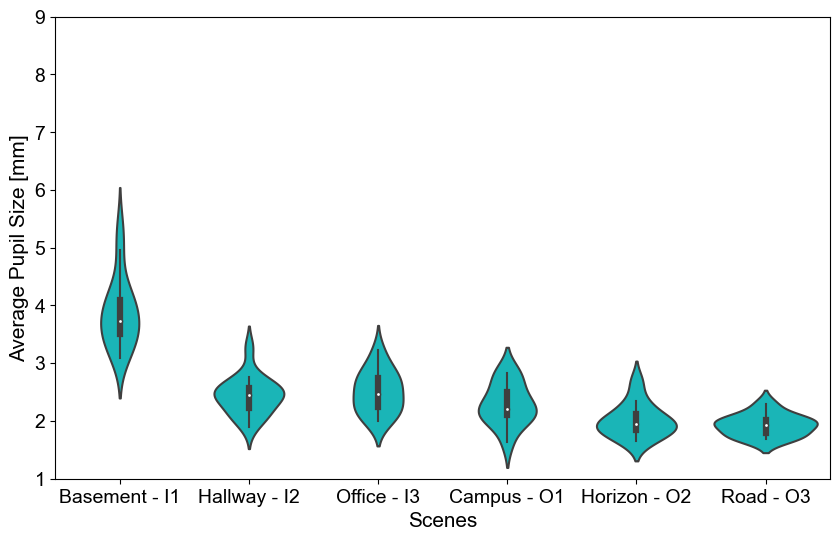

In [33]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd

# Liste aus Listen
pupil_list_all = [avr_pupil_S1, avr_pupil_S2, avr_pupil_S3, avr_pupil_S4, avr_pupil_S5, avr_pupil_S6]
for i in pupil_list_all:
    print(len(i))
# Liste von Listen in einen DataFrame umwandeln
df_pupil = pd.DataFrame(pupil_list_all).T

# Spaltennamen festlegen (optional)
column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_pupil.columns = column_names


print(df_pupil)
plt.figure(figsize=(10, 6))
sea.violinplot(data=df_pupil, color="darkturquoise")
plt.xlabel('Scenes', fontsize=15, family='Arial')
plt.ylabel('Average Pupil Size [mm]', fontsize=15, family='Arial')
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.ylim(1,9)

16
16
15
12
12
11
    Basement - I1  Hallway - I2  Office - I3  Campus - O1  Horizon - O2  \
0        1.600000      2.399981     0.800000     1.200005      2.000000   
1        1.000000      2.399981     1.000000     2.399981      0.599999   
2        1.399992      2.599969     1.799986     1.200005      1.399992   
3        0.800000      1.200005     1.399992     0.800000      1.200005   
4        3.200000      2.000000     1.600000     1.399992      1.399992   
5        0.400000      1.000000     1.200005     1.200005      1.000000   
6        1.799986      1.600000     1.000000     1.200005      1.200005   
7        0.800000      1.600000     2.399981     0.800000      1.000000   
8        1.399992      1.799986     1.600000     1.600000      1.799986   
9        1.000000      1.200005     1.399992     1.799986      2.000000   
10       0.800000      2.199978     1.399992     2.000000      0.800000   
11       2.000000      1.399992     3.000030     1.000000      1.000000   
12     

(0.0, 2.5)

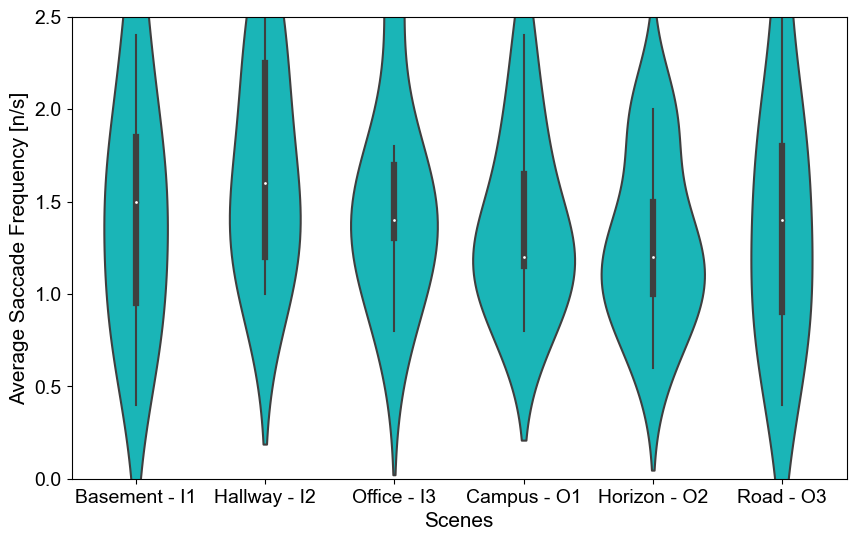

In [34]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd

# Liste aus Listen
nr_sacc_all = [freq_sacc_S1, freq_sacc_S2, freq_sacc_S3, freq_sacc_S4, freq_sacc_S5, freq_sacc_S6]
for i in nr_sacc_all:
    print(len(i))
# Liste von Listen in einen DataFrame umwandeln
df_sacc_all = pd.DataFrame(nr_sacc_all).T

# Spaltennamen festlegen (optional)
column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_sacc_all.columns = column_names

print(df_sacc_all)
plt.figure(figsize=(10, 6))
sea.violinplot(data=df_sacc_all, color="darkturquoise")
plt.xlabel('Scenes', fontsize=15, family='Arial')
plt.ylabel('Average Saccade Frequency [n/s]', fontsize=15, family='Arial')
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.ylim(0,2.5)




16
16
15
12
12
11
    Basement - I1  Hallway - I2  Office - I3  Campus - O1  Horizon - O2  \
0           203.0         215.0        246.0        340.0         303.0   
1           257.0         241.0        306.0        257.0         170.0   
2           327.0         270.0        218.0        216.0         208.0   
3           250.0         228.0        153.0        194.0         170.0   
4           474.0         225.0        291.0        246.0         261.0   
5           324.0         163.0        169.0        237.0         213.0   
6           296.0         187.0        308.0        252.0         267.0   
7           215.0         208.0        231.0        188.0         204.0   
8           216.0         173.0        231.0        306.0         220.0   
9           258.0         168.0        259.0        258.0         262.0   
10          204.0         189.0        294.0        294.0         182.0   
11          268.0         200.0        232.0        181.0         287.0   
12     

(100.0, 600.0)

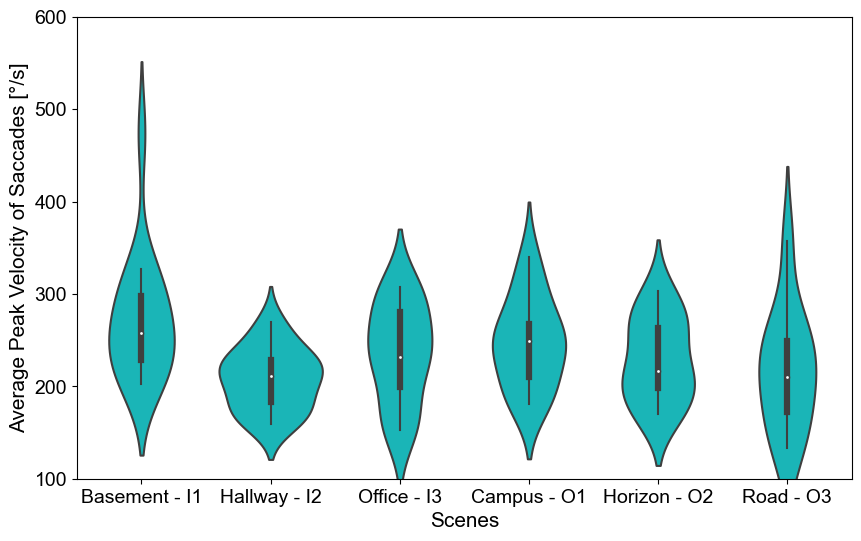

In [35]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd

# Liste aus Listen
avr_peak_velo_all = [avr_peak_velo_S1, avr_peak_velo_S2, avr_peak_velo_S3, avr_peak_velo_S4, avr_peak_velo_S5, avr_peak_velo_S6]
for i in avr_peak_velo_all:
    print(len(i))
# Liste von Listen in einen DataFrame umwandeln
df_velo_all = pd.DataFrame(avr_peak_velo_all).T

# Spaltennamen festlegen (optional)
column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_velo_all.columns = column_names


print(df_velo_all)
plt.figure(figsize=(10, 6))
sea.violinplot(data=df_velo_all,color="darkturquoise")
plt.xlabel('Scenes', fontsize=15, family='Arial')
plt.ylabel('Average Peak Velocity of Saccades [°/s]', fontsize=15, family='Arial')
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.ylim(100,600)

16
16
15
12
12
11
    Basement - I1  Hallway - I2  Office - I3  Campus - O1  Horizon - O2  \
0            5.84          5.68         2.16         7.51          8.35   
1            7.52          5.81        13.09         7.75          5.20   
2           11.56         10.16         7.49         7.97          6.93   
3            8.83          8.83         3.90         8.45          3.95   
4           13.02          8.67         8.20         8.69          6.92   
5            8.66          4.80         4.22         7.64          8.56   
6           13.53          7.57         7.76         5.73          9.40   
7            7.01          7.48         8.81         6.77          4.47   
8            9.02          7.22        10.70        11.35          5.84   
9            8.15          6.18         8.96        12.88         11.14   
10           6.37          6.00        16.04        13.65          4.53   
11          10.22          7.47         7.94         5.67          7.58   
12     

(0.0, 15.0)

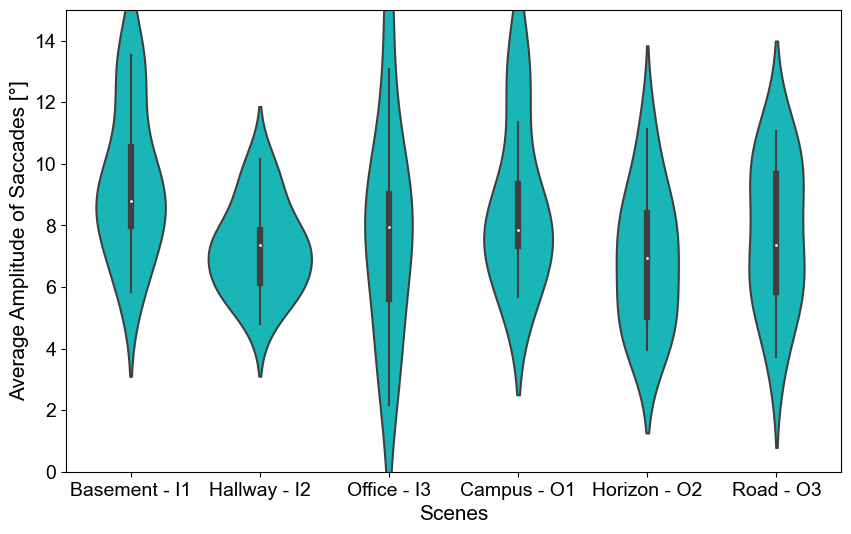

In [36]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
#data_list_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avg_fix_dur_S4, avg_fix_dur_S5, avg_fix_dur_S6]
#df = pd.DataFrame(data_list_all)
#print(df)
# Liste aus Listen
avr_amp_all = [avr_amp_S1, avr_amp_S2, avr_amp_S3, avr_amp_S4, avr_amp_S5, avr_amp_S6]
for i in avr_amp_all:
    print(len(i))
# Liste von Listen in einen DataFrame umwandeln
df_amp_all = pd.DataFrame(avr_amp_all).T

# Spaltennamen festlegen (optional)
column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_amp_all.columns = column_names

print(df_amp_all)
plt.figure(figsize=(10, 6))
sea.violinplot(data=df_amp_all,color="darkturquoise")
plt.xlabel('Scenes', fontsize=15, family='Arial')
plt.ylabel('Average Amplitude of Saccades [°]', fontsize=15, family='Arial')
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.ylim(0,15)


16
16
15
12
12
11
    Basement - I1  Hallway - I2  Office - I3  Campus - O1  Horizon - O2  \
0        2.800022      4.000000     3.002011     2.000000      4.199916   
1        2.599969      3.000030     1.401994     3.599971      1.399992   
2        2.199978      3.599971     2.601998     3.000030      1.799986   
3        1.600000      2.399981     2.401998     1.200005      3.000030   
4        4.600028      2.800022     2.601998     2.000000      3.200000   
5        1.200005      1.399992     1.401994     2.000000      1.399992   
6        2.599969      2.399981     2.002002     2.800022      2.000000   
7        1.000000      2.000000     2.801984     1.799986      2.599969   
8        2.399981      2.199978     1.801997     2.399981      3.599971   
9        1.600000      1.399992     1.601999     2.000000      2.199978   
10       1.600000      2.599969     2.202013     2.199978      1.399992   
11       2.399981      2.399981     3.202049     2.599969      2.199978   
12     

(0.0, 5.0)

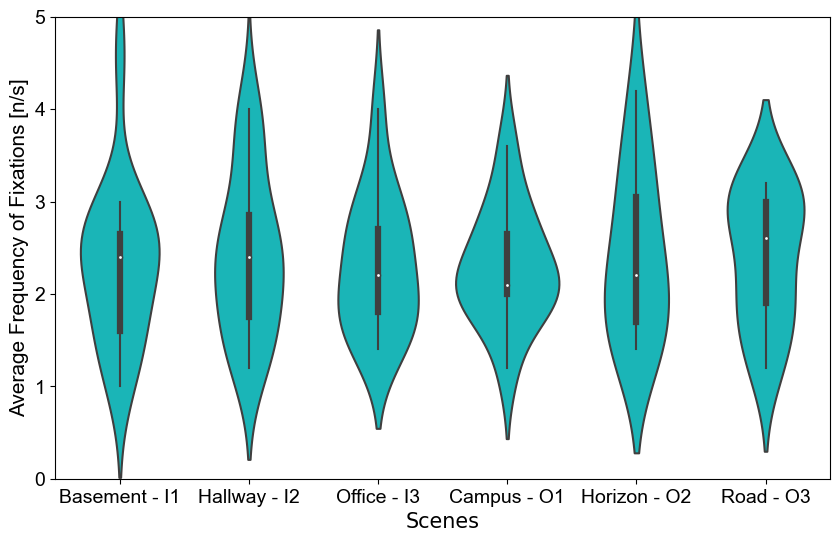

In [37]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
#data_list_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avg_fix_dur_S4, avg_fix_dur_S5, avg_fix_dur_S6]
#df = pd.DataFrame(data_list_all)
#print(df)
# Liste aus Listen
freq_fix_all = [freq_fix_S1, freq_fix_S2, freq_fix_S3, freq_fix_S4, freq_fix_S5, freq_fix_S6]
for i in freq_fix_all:
    print(len(i))
# Liste von Listen in einen DataFrame umwandeln
df_fix_all = pd.DataFrame(freq_fix_all).T

# Spaltennamen festlegen (optional)
column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_fix_all.columns = column_names

print(df_fix_all)
plt.figure(figsize=(10, 6))
sea.violinplot(data=df_fix_all, color="darkturquoise")
plt.xlabel('Scenes', fontsize=15)
plt.ylabel('Average Frequency of Fixations [n/s]', fontsize=15, family='Arial')
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.ylim(0,5)

16
16
15
12
12
11


(0.0, 3500.0)

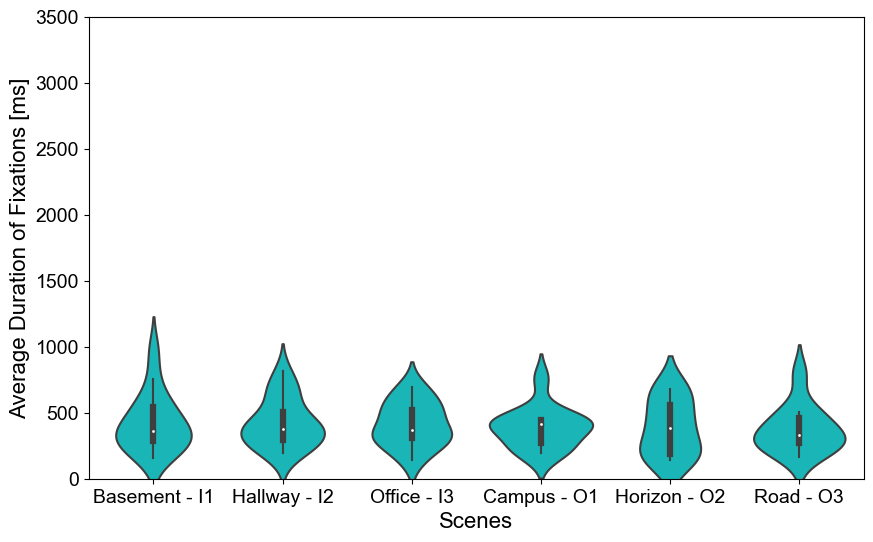

In [38]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
#data_list_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avg_fix_dur_S4, avg_fix_dur_S5, avg_fix_dur_S6]
#df = pd.DataFrame(data_list_all)
#print(df)
# Liste aus Listen

avr_dur_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avr_fix_dur_S4, avr_fix_dur_S5, avr_dur_fix_S6]
for i in avr_dur_all:
    print(len(i))
# Liste von Listen in einen DataFrame umwandeln
df_dur_all = pd.DataFrame(avr_dur_all).T

# Spaltennamen festlegen (optional)
column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_dur_all.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_dur_all,color="darkturquoise")
plt.xlabel('Scenes', fontsize=16, family='Arial')
plt.ylabel('Average Duration of Fixations [ms]', fontsize=16, family='Arial')
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.ylim(0, 3500)

[293.0, 223.0, 374.0, 540.0, 159.0, 757.0, 207.0, 979.0, 355.0, 565.0, 564.0, 363.0, 349.0, 459.0, 316.0, 253.0, 192.0, 295.0, 216.0, 386.0, 286.0, 676.0, 343.0, 462.0, 414.0, 688.0, 353.0, 374.0, 234.0, 593.0, 480.0, 813.0, 144.0, 663.0, 336.0, 367.0, 304.0, 694.0, 444.0, 317.0, 518.0, 595.0, 328.0, 280.0, 518.0, 198.0, 522.0]
[432.0, 227.0, 192.0, 760.0, 450.0, 447.0, 215.0, 421.0, 362.0, 458.0, 408.0, 289.0, 177.0, 657.0, 522.0, 191.0, 210.0, 674.0, 441.0, 145.0, 170.0, 407.0, 677.0, 354.0, 337.0, 502.0, 266.0, 165.0, 425.0, 225.0, 504.0, 274.0, 797.0, 335.0, 291.0]
        0      1
0   293.0  432.0
1   223.0  227.0
2   374.0  192.0
3   540.0  760.0
4   159.0  450.0
5   757.0  447.0
6   207.0  215.0
7   979.0  421.0
8   355.0  362.0
9   565.0  458.0
10  564.0  408.0
11  363.0  289.0
12  349.0  177.0
13  459.0  657.0
14  316.0  522.0
15  253.0  191.0
16  192.0  210.0
17  295.0  674.0
18  216.0  441.0
19  386.0  145.0
20  286.0  170.0
21  676.0  407.0
22  343.0  677.0
23  462.0  354.0

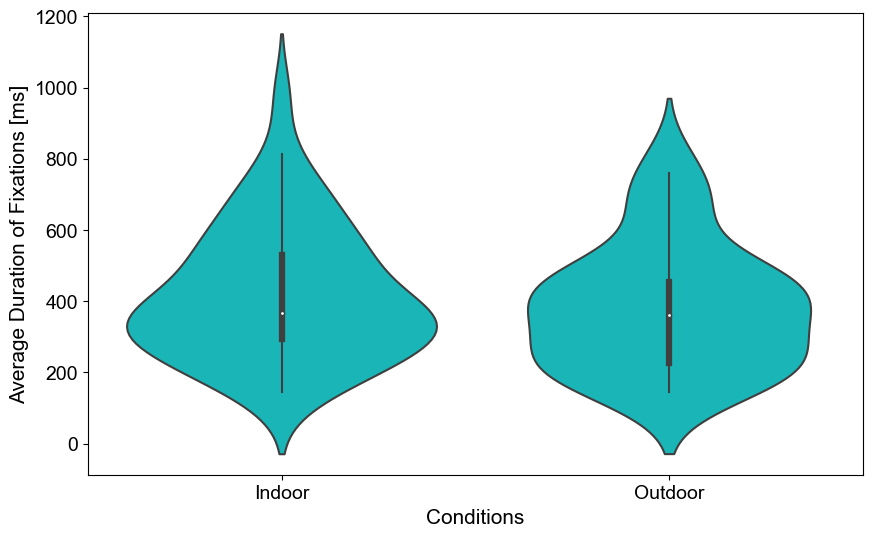

In [39]:
#Hier plotte ich für jede Frage die Ergebnisse über die Scene hinweg!
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats

#data_list_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avg_fix_dur_S4, avg_fix_dur_S5, avg_fix_dur_S6]
#df = pd.DataFrame(data_list_all)
#print(df)
# Liste aus Listen
Fdur_in10=[]
for item in dur_in:
    for i in item:
        Fdur_in10.append(i)
print(Fdur_in10)

Fdur_out10=[]
for item in dur_out:
    for i in item:
        Fdur_out10.append(i)
print(Fdur_out10)

Fdur_all10 = [Fdur_in10, Fdur_out10]

# Liste von Listen in einen DataFrame umwandeln
df_fdur_f10 = pd.DataFrame(Fdur_all10).T
print(df_fdur_f10)
# Spaltennamen festlegen (optional)
column_names = ["Indoor", "Outdoor"]
df_fdur_f10.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_fdur_f10, color="darkturquoise")
plt.xlabel('Conditions',family='Arial', fontsize=15)
plt.ylabel('Average Duration of Fixations [ms]', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks(family='Arial')  # Corrected yticks setting

# Durchführung des t-Tests für unabhängige Stichproben
t_statistic, p_value = stats.ttest_ind(Fdur_in10, Fdur_out10)

# Ausgabe der Ergebnisse
print("T = 5 to 10s: Average Fixation Duration T-Statistic:", t_statistic)
print("T = 5 to 10s: Average Fixation Duration P-Value:", p_value)
print("Mean Indoor = " + str(mean_dur_in))
print("Mean Outdoor = " + str(mean_dur_out))


[2.8000224001792016, 2.5999688003743953, 2.1999780002199976, 1.6, 4.6000276001656015, 1.2000048000192, 2.5999688003743953, 1.0, 2.3999808001535987, 1.6, 1.6, 2.3999808001535987, 2.5999688003743953, 2.0, 2.8000224001792016, 3.0000300003000033, 4.0, 3.0000300003000033, 3.5999712002303985, 2.3999808001535987, 2.8000224001792016, 1.3999916000503998, 2.3999808001535987, 2.0, 2.1999780002199976, 1.3999916000503998, 2.5999688003743953, 2.3999808001535987, 3.7999696002431977, 1.6, 1.7999856001151993, 1.2000048000192, 3.002011347602894, 1.4019936349488973, 2.601998334721066, 2.401998462720984, 2.601998334721066, 1.4019936349488973, 2.002002002002002, 2.80198380453361, 1.8019966122463689, 1.6019992951203101, 2.202012639552551, 3.202049311559398, 1.8019966122463689, 4.00192092204258, 1.8019966122463689]
[2.0, 3.5999712002303985, 3.0000300003000033, 1.2000048000192, 2.0, 2.0, 2.8000224001792016, 1.7999856001151993, 2.3999808001535987, 2.0, 2.1999780002199976, 2.5999688003743953, 4.199916001679966,

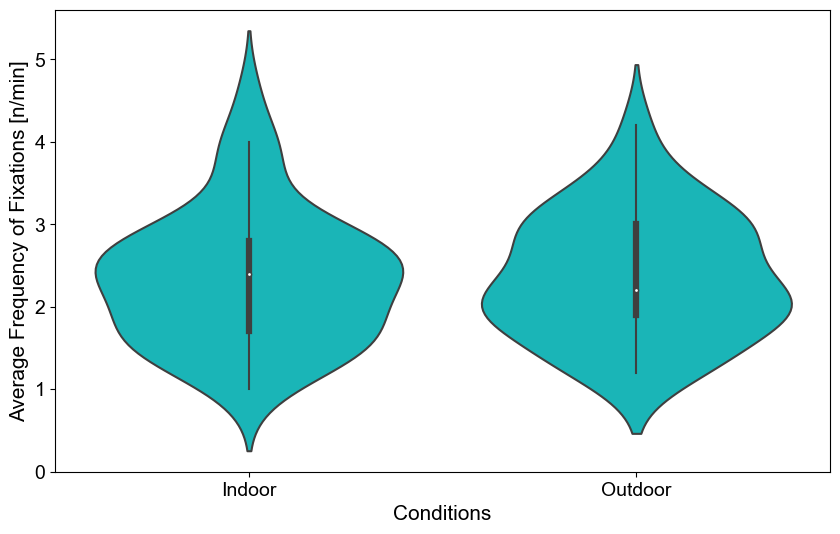

In [40]:
#Hier plotte ich für jede Frage die Ergebnisse über die Scene hinweg!
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats

#data_list_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avg_fix_dur_S4, avg_fix_dur_S5, avg_fix_dur_S6]
#df = pd.DataFrame(data_list_all)
#print(df)
# Liste aus Listen
ff_in10=[]
for item in freqfix_in:
    for i in item:
        ff_in10.append(i)
print(ff_in10)

ff_out10=[]
for item in freqfix_out:
    for i in item:
        ff_out10.append(i)
print(ff_out10)

fix_freq_all10 = [ff_in10, ff_out10]

# Liste von Listen in einen DataFrame umwandeln
df_fix_f10 = pd.DataFrame(fix_freq_all10).T
print(df_fix_f10)
# Spaltennamen festlegen (optional)
column_names = ["Indoor", "Outdoor"]
df_fix_f10.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_fix_f10, color="darkturquoise")
plt.xlabel('Conditions',family='Arial', fontsize=15)
plt.ylabel('Average Frequency of Fixations [n/min]', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks([0,1,2,3,4,5], family='Arial')  # Corrected yticks setting

# Durchführung des t-Tests für unabhängige Stichproben
t_statistic, p_value = stats.ttest_ind(ff_in10, ff_out10)

# Ausgabe der Ergebnisse
print("T = 0 to 5s: Average Fixation Frequency T-Statistic:", t_statistic)
print("T = 0 to 5s: Average Fixation Frequency P-Value:", p_value)
print("Mean Fixation Frequency Indoor = " + str(mean_freqfix_in))
print("Mean Fixation Frequency Outdoor = " + str(mean_freqfix_out))

[2.0, 1.7999856001151993, 2.1999780002199976, 1.0, 2.1999780002199976, 2.3999808001535987, 1.0, 1.3999916000503998, 1.0, 2.8000224001792016, 2.0, 1.3999916000503998, 1.3999916000503998, 2.0, 2.5999688003743953, 2.1999780002199976, 1.0, 1.3999916000503998, 2.8000224001792016, 0.8, 2.0, 1.3999916000503998, 2.3999808001535987, 1.0, 0.8, 1.3999916000503998, 1.2000048000192, 0.4, 2.8000224001792016, 1.3999916000503998, 1.0, 1.7999856001151993, 1.3999916000503998, 1.6, 1.7999856001151993, 1.6, 0.4, 1.3999916000503998, 2.3999808001535987, 2.5999688003743953, 1.0, 1.7999856001151993, 2.1999780002199976, 1.2000048000192, 1.6, 1.3999916000503998, 1.3999916000503998, 1.3999916000503998]
[1.6, 1.0, 1.3999916000503998, 0.8, 3.2, 0.4, 1.7999856001151993, 0.8, 1.3999916000503998, 1.0, 0.8, 2.0, 2.3999808001535987, 1.6, 2.3999808001535987, 1.6, 2.3999808001535987, 2.3999808001535987, 2.5999688003743953, 1.2000048000192, 2.0, 1.0, 1.6, 1.6, 1.7999856001151993, 1.2000048000192, 2.1999780002199976, 1.399

NameError: name 'Sfreq_in' is not defined

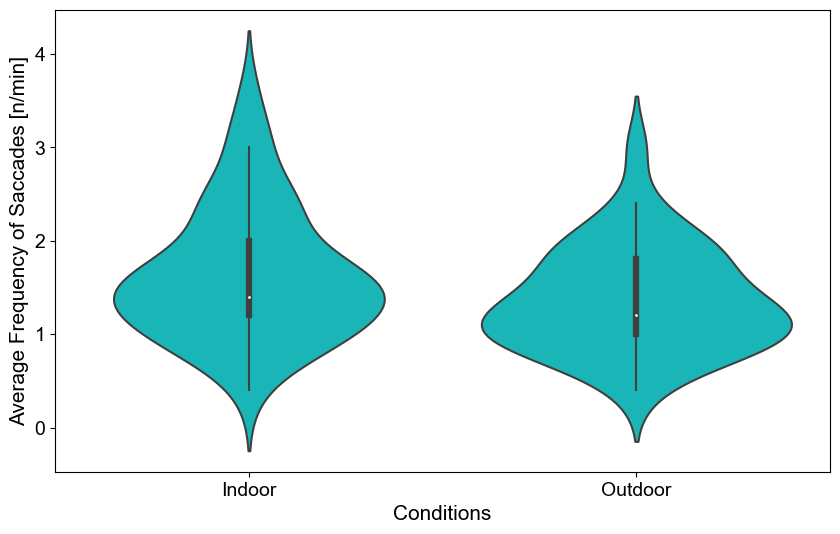

In [41]:
#Hier plotte ich für jede Frage die Ergebnisse über die Scene hinweg!
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats

#data_list_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avg_fix_dur_S4, avg_fix_dur_S5, avg_fix_dur_S6]
#df = pd.DataFrame(data_list_all)
#print(df)
# Liste aus Listen

Sfreq_in10=[]
for item in freq_in:
    for i in item:
        Sfreq_in10.append(i)
print(Sfreq_in5)
print(Sfreq_in10)

Sfreq_out10=[]
for item in freq_out:
    for i in item:
        Sfreq_out10.append(i)
print(Sfreq_out5)
print(Sfreq_out10)

Sfreq_all10 = [Sfreq_in10, Sfreq_out10]

# Liste von Listen in einen DataFrame umwandeln
df_Sfreq_f10 = pd.DataFrame(Sfreq_all10).T
print(df_Sfreq_f10)
# Spaltennamen festlegen (optional)
column_names = ["Indoor", "Outdoor"]
df_Sfreq_f10.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_Sfreq_f10, color="darkturquoise")
plt.xlabel('Conditions',family='Arial', fontsize=15)
plt.ylabel('Average Frequency of Saccades [n/min]', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks(family='Arial')  # Corrected yticks setting

# Durchführung des t-Tests für unabhängige Stichproben
t_statistic, p_value = stats.ttest_ind(Sfreq_in, Sfreq_out)


# Ausgabe der Ergebnisse
print("T = 5 to 10s: Average Frequency of Saccades T-Statistic:", t_statistic)
print("T = 5 to 10s: Average Frequency of Saccades P-Value:", p_value)

print("Mean Indoor = " + str(mean_freq_in))
print("Mean Outdoor = " + str(mean_freq_out))


[5.84, 7.52, 11.56, 8.83, 13.02, 8.66, 13.53, 7.01, 9.02, 8.15, 6.37, 10.22, 9.88, 8.71, 8.75, 13.31, 5.68, 5.81, 10.16, 8.83, 8.67, 4.8, 7.57, 7.48, 7.22, 6.18, 6.0, 7.47, 7.56, 6.3, 9.55, 6.85, 2.16, 13.09, 7.49, 3.9, 8.2, 4.22, 7.76, 8.81, 10.7, 8.96, 16.04, 7.94, 9.06, 6.69, 4.52]
[7.51, 7.75, 7.97, 8.45, 8.69, 7.64, 5.73, 6.77, 11.35, 12.88, 13.65, 5.67, 8.35, 5.2, 6.93, 3.95, 6.92, 8.56, 9.4, 4.47, 5.84, 11.14, 4.53, 7.58, 3.71, 6.94, 10.49, 5.65, 7.37, 5.88, 11.06, 8.87, 9.55, 9.76, 5.81]
        0      1
0    5.84   7.51
1    7.52   7.75
2   11.56   7.97
3    8.83   8.45
4   13.02   8.69
5    8.66   7.64
6   13.53   5.73
7    7.01   6.77
8    9.02  11.35
9    8.15  12.88
10   6.37  13.65
11  10.22   5.67
12   9.88   8.35
13   8.71   5.20
14   8.75   6.93
15  13.31   3.95
16   5.68   6.92
17   5.81   8.56
18  10.16   9.40
19   8.83   4.47
20   8.67   5.84
21   4.80  11.14
22   7.57   4.53
23   7.48   7.58
24   7.22   3.71
25   6.18   6.94
26   6.00  10.49
27   7.47   5.65
28   7

NameError: name 'Samp_in' is not defined

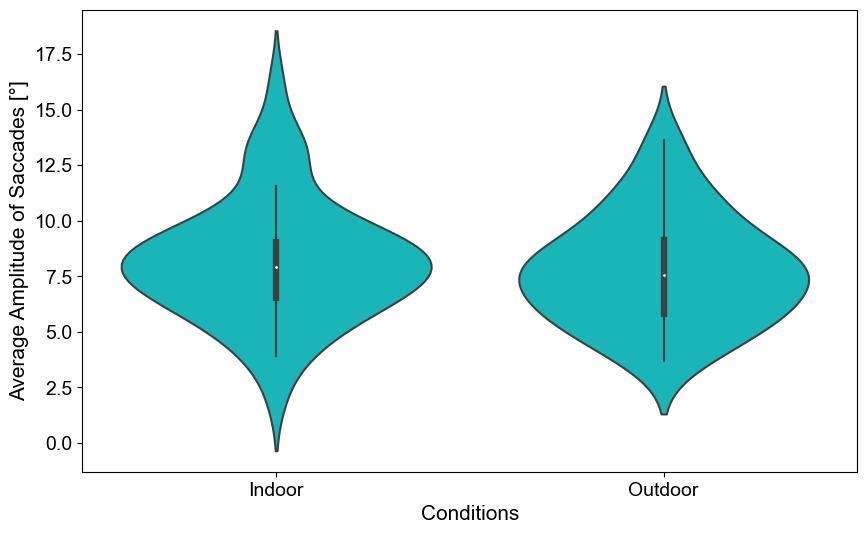

In [42]:
#Hier plotte ich für jede Frage die Ergebnisse über die Scene hinweg!
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats

#data_list_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avg_fix_dur_S4, avg_fix_dur_S5, avg_fix_dur_S6]
#df = pd.DataFrame(data_list_all)
#print(df)
# Liste aus Listen
Samp_in10=[]
for item in amp_in:
    for i in item:
        Samp_in10.append(i)
print(Samp_in10)

Samp_out10=[]
for item in amp_out:
    for i in item:
        Samp_out10.append(i)
print(Samp_out10)

Samp_all = [Samp_in10, Samp_out10]

# Liste von Listen in einen DataFrame umwandeln
df_Samp_f10 = pd.DataFrame(Samp_all).T
print(df_Samp_f10)
# Spaltennamen festlegen (optional)
column_names = ["Indoor", "Outdoor"]
df_Samp_f10.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_Samp_f10, color="darkturquoise")
plt.xlabel('Conditions',family='Arial', fontsize=15)
plt.ylabel('Average Amplitude of Saccades [°]', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks(family='Arial')  # Corrected yticks setting

# Durchführung des t-Tests für unabhängige Stichproben
t_statistic, p_value = stats.ttest_ind(Samp_in, Samp_out)

# Ausgabe der Ergebnisse
print("T = 5 to 10s: Average Saccade Amplitude T-Statistic:", t_statistic)
print("T = 5 to 10s: Average Saccade Amplitude P-Value:", p_value)
print("Mean Indoor = " + str(mean_amp_in))
print("Mean Outdoor = " + str(mean_amp_out))


[203.0, 257.0, 327.0, 250.0, 474.0, 324.0, 296.0, 215.0, 216.0, 258.0, 204.0, 268.0, 297.0, 233.0, 233.0, 299.0, 215.0, 241.0, 270.0, 228.0, 225.0, 163.0, 187.0, 208.0, 173.0, 168.0, 189.0, 200.0, 228.0, 218.0, 255.0, 159.0, 246.0, 306.0, 218.0, 153.0, 291.0, 169.0, 308.0, 231.0, 231.0, 259.0, 294.0, 232.0, 269.0, 180.0, 153.0]
[340.0, 257.0, 216.0, 194.0, 246.0, 237.0, 252.0, 188.0, 306.0, 258.0, 294.0, 181.0, 303.0, 170.0, 208.0, 170.0, 261.0, 213.0, 267.0, 204.0, 220.0, 262.0, 182.0, 287.0, 177.0, 357.0, 268.0, 136.0, 133.0, 210.0, 237.0, 262.0, 208.0, 235.0, 167.0]
        0      1
0   203.0  340.0
1   257.0  257.0
2   327.0  216.0
3   250.0  194.0
4   474.0  246.0
5   324.0  237.0
6   296.0  252.0
7   215.0  188.0
8   216.0  306.0
9   258.0  258.0
10  204.0  294.0
11  268.0  181.0
12  297.0  303.0
13  233.0  170.0
14  233.0  208.0
15  299.0  170.0
16  215.0  261.0
17  241.0  213.0
18  270.0  267.0
19  228.0  204.0
20  225.0  220.0
21  163.0  262.0
22  187.0  182.0
23  208.0  287.0

NameError: name 'Svelo_in' is not defined

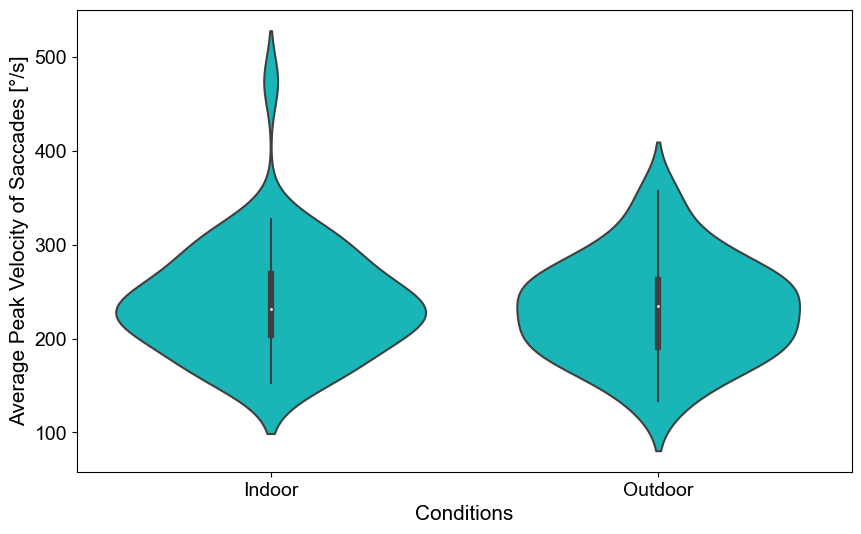

In [43]:
#Hier plotte ich für jede Frage die Ergebnisse über die Scene hinweg!
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats

#data_list_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avg_fix_dur_S4, avg_fix_dur_S5, avg_fix_dur_S6]
#df = pd.DataFrame(data_list_all)
#print(df)
# Liste aus Listen
Svelo_in10=[]
for item in velo_in:
    for i in item:
        Svelo_in10.append(i)
print(Svelo_in10)

Svelo_out10=[]
for item in velo_out:
    for i in item:
        Svelo_out10.append(i)
print(Svelo_out10)

Svelo_all = [Svelo_in10, Svelo_out10]

# Liste von Listen in einen DataFrame umwandeln
df_Svelo_f10 = pd.DataFrame(Svelo_all).T
print(df_Svelo_f10)
# Spaltennamen festlegen (optional)
column_names = ["Indoor", "Outdoor"]
df_Svelo_f10.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_Svelo_f10, color="darkturquoise")
plt.xlabel('Conditions',family='Arial', fontsize=15)
plt.ylabel('Average Peak Velocity of Saccades [°/s]', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks(family='Arial')  # Corrected yticks setting

# Durchführung des t-Tests für unabhängige Stichproben
t_statistic, p_value = stats.ttest_ind(Svelo_in, Svelo_out)

# Ausgabe der Ergebnisse
print("T = 5 to 10s: Average Velocity of Saccades T-Statistic:", t_statistic)
print("T = 5 to 10s: Average Velocity of Saccades P-Value:", p_value)
print("Mean Indoor = " + str(mean_velo_in))
print("Mean Outdoor = " + str(mean_velo_out))


[3.67161, 3.20982, 4.05865, 3.72926, 3.29216, 3.58464, 3.74259, 3.94358, 5.34384, 4.23124, 4.95361, 4.28602, 3.40789, 3.09688, 4.00379, 3.53814, 2.25283, 2.56009, 2.36912, 2.41614, 2.12275, 2.10768, 2.45137, 2.47933, 2.69212, 3.26961, 2.76765, 2.08358, 2.45417, 2.54535, 1.89519, 2.62171, 2.54993, 2.87464, 2.13968, 2.73108, 2.24044, 1.99448, 2.47531, 2.67075, 2.98735, 3.22817, 2.24481, 2.26524, 2.4536, 1.99969, 2.75521]
[2.1175, 1.99942, 2.11635, 2.29728, 2.83876, 2.83283, 2.13042, 2.06007, 2.38662, 2.66102, 2.44501, 1.63245, 1.89525, 1.96839, 2.35354, 1.82782, 1.97675, 2.19817, 2.68412, 1.66178, 1.94404, 2.10418, 1.6837, 1.84434, 1.90059, 2.29914, 1.93171, 1.82254, 2.01678, 1.99322, 1.691, 2.03292, 2.11695, 1.74621, 1.6853]
          0        1
0   3.67161  2.11750
1   3.20982  1.99942
2   4.05865  2.11635
3   3.72926  2.29728
4   3.29216  2.83876
5   3.58464  2.83283
6   3.74259  2.13042
7   3.94358  2.06007
8   5.34384  2.38662
9   4.23124  2.66102
10  4.95361  2.44501
11  4.28602  1

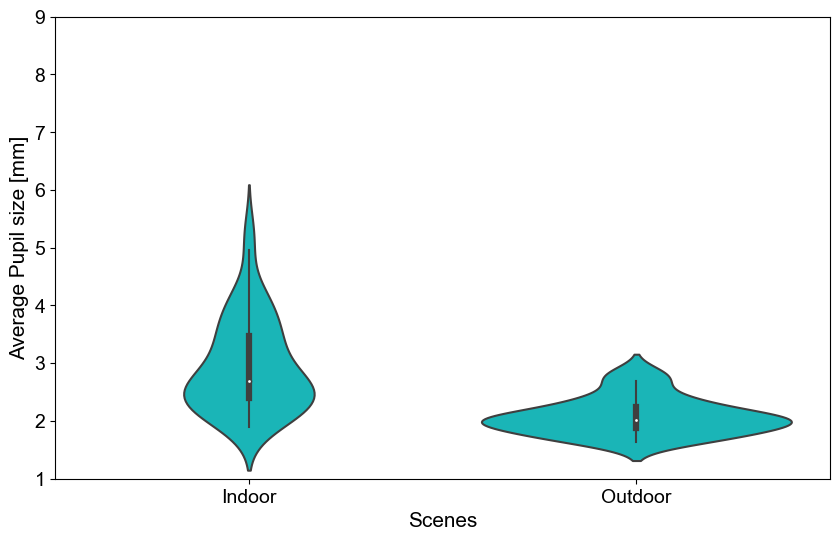

In [44]:
#Hier plotte ich für jede Frage die Ergebnisse über die Scene hinweg!
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats

#data_list_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avg_fix_dur_S4, avg_fix_dur_S5, avg_fix_dur_S6]
#df = pd.DataFrame(data_list_all)
#print(df)
# Liste aus Listen
Pup_in10=[]
for item in pupil_in:
    for i in item:
        Pup_in10.append(i)
print(Pup_in10)

Pup_out10=[]
for item in pupil_out:
    for i in item:
        Pup_out10.append(i)
print(Pup_out10)

Pup_all = [Pup_in10, Pup_out10]

# Liste von Listen in einen DataFrame umwandeln
df_Pup_f10 = pd.DataFrame(Pup_all).T
print(df_Pup_f10)
# Spaltennamen festlegen (optional)
column_names_IO = ["Indoor", "Outdoor"]
df_Pup_f10.columns = column_names_IO
####
df_combinded = []

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_Pup_f10, color="darkturquoise")
plt.xlabel('Scenes',family='Arial', fontsize=15)
plt.ylabel('Average Pupil size [mm]', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks(family='Arial')  # Corrected yticks setting
plt.ylim(1,9)

# Durchführung des t-Tests für unabhängige Stichproben
t_statistic, p_value = stats.ttest_ind(Pup_in, Pup_out)

# Ausgabe der Ergebnisse
print("Average Pupil size T-Statistic:", t_statistic)
print("Average Pupil size P-Value:", p_value)
print("Mean Indoor = " + str(mean_pupil_in))
print("Mean Outdoor = " + str(mean_pupil_out))

In [45]:
######################## SCENE 1 ########################

import numpy as np
import pandas as pd
#################################################################### 
######################## AVERAGE PUPIL SIZE ######################## 
####################################################################
avg_fix_dur_S1 = []
avr_pupil_S1 = []
avr_fix_dur_S1 = []
dur_interval_S1 = []
nr_sacc_S1 = []
dur_interval_S1 = []
avr_amp_S1 = []
unformatted_freq_sacc_S1 = []
unformatted_freq_fix_S1 = []
freq_sacc_S1 =[]
freq_fix_S1 =[]
avr_peak_velo_S1 = []
nr_fix_S1 = []
#Erstelle Dictionary für alle Daten
data_dict = {}

#Funktionen zum Finden der korrekten Zahlenwerte bzw. umwandeln
def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        # Wert zum Float konvertieren vor dem Vergleich
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/TOI/10-15/S1_Metrics_TOI10-15.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            # Um mit floats als auch integern arbeiten zu können
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))

#############################################
############# Pupil size ####################
#############################################

count = 101
for participant in data_dict:
        if len(avr_pupil_S1) < 18:
            if count not in (102,113,121):
                if count != 113:
                    S1_participant = data_dict.get(count, {})
                    S1_participant_data_list = list(S1_participant.values())
                    #print(S1_participant_data_list)
                    S1_float_list = [item[0] for item in S1_participant_data_list]
                    #print(S1_float_list)
                    #print(S1_float_list[12])
                    avr_pupil_S1.append(S1_float_list[12])
                    count = count + 1
                else: 
                    S1_participant = data_dict.get(count, {})
                    S1_participant_data_list = list(S1_participant.values())
                    #print(S1_participant_data_list)
                    S1_float_list = [item[0] for item in S1_participant_data_list]
                    #print(S1_float_list)
                    avr_pupil_S1.append(S1_float_list[12])
                    count = count + 1
            else:
                count = count + 1
                continue
        else: 
             break

print("pupil size")
print(avr_pupil_S1)
#############################################
######## AVERAGE FIXATION DURATION ##########
#############################################

count = 101
for participant in data_dict:
    if len(avg_fix_dur_S1)<18:
        if count not in (102,113,122):
            S1_participant = data_dict.get(count, {})
            S1_participant_data_list = list(S1_participant.values())
            #print(S1_participant_data_list)
            S1_float_list = [item[0] for item in S1_participant_data_list]
            #print(S1_float_list)
            #print(S1_float_list[6])
            avg_fix_dur_S1.append(S1_float_list[6])
            count = count + 1
        else:
            count = count + 1
            continue
    else:
        break
print("average fixation duration")
print(avg_fix_dur_S1)
#############################################
############# DURATION OF INTERVAL ##########
#############################################

count = 101
for participant in data_dict:
    if len(dur_interval_S1) < 18:
        #if count != 102 or 104 or 106 or 113:
        if count not in (102,113,122):
            S1_participant = data_dict.get(count, {})
            S1_participant_data_list = list(S1_participant.values())
            #print(S1_participant_data_list)
            S1_float_list = [item[0] for item in S1_participant_data_list]
            #print(S1_float_list)
            #print(S1_float_list[2])
            dur_interval_S1.append(S1_float_list[2])
            count = count + 1
        else: 
            count = count + 1
            continue
print("duration of interval")
print(dur_interval_S1)
#####################################
######## NUMBER OF SACCADES #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_sacc_S1) < 18:
        if count not in (102,113, 122): 
            if count not in (113, 121):
            #Diese if-schliefe ist für 113 angelegt worden!
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S1_float_list)
                #print(S1_float_list[40])
                nr_sacc_S1.append(S1_float_list[40])
                count = count + 1
            else: 
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S3_float_list)
                nr_sacc_S1.append(S1_float_list[10])
                count = count + 1
                continue
        else:
            count = count + 1
            continue
print("nr saccades")
print(nr_sacc_S1)
#####################################
######## FREQUENCY OF SACCADES ######
#####################################

for i in range(len(dur_interval_S1)):
    unformatted_result = dur_interval_S1[i] / nr_sacc_S1[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_sacc_S1.append(result)
    
for i in unformatted_freq_sacc_S1:
    freq_sacc_i = 1000/i
    freq_sacc_S1.append(freq_sacc_i)
print("freq_sacc")
print(freq_sacc_S1)
##############################################
######## Average saccade peak velocity ######
##############################################

count = 101    
for participant in data_dict:
    if len(avr_peak_velo_S1) < 18:
        #if count != 102 or 104 or 106 or 113:
        if count not in (102,113,122):
            if count not in (113, 121):
                #Diese if-schliefe ist für 113 angelegt worden!
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
               # print(S1_float_list)
                #print(S1_float_list[41])
                avr_peak_velo_S1.append(S1_float_list[41])
                count = count + 1
            else: 
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S1_float_list)
                avr_peak_velo_S1.append(S1_float_list[11])
                count = count + 1
                continue
        else:
            count = count + 1
            continue
print("peak velo")  
print(avr_peak_velo_S1)
###########################################################
############AVERAGE AMPLITUDE OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_amp_S1) < 18:
        #if count != 102 or 104 or 106 or 113:
        if count not in (102,113,122):
            if count not in (113, 121):
                #Diese if-schliefe ist für 113 angelegt worden!
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S1_float_list)
                #print(S1_float_list[45])
                avr_amp_S1.append(S1_float_list[45])
                #print(S1_float_list[45])
                count = count + 1
            else:
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S1_float_list)
                avr_amp_S1.append(S1_float_list[15])
                #print(S1_float_list)
                count = count + 1
        else:
            count = count + 1
            continue

print("avg amplitude")
print(avr_amp_S1)
#####################################
######## NUMBER OF Fixations #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_fix_S1) < 18:
        if count not in (102,113,122):
            if count not in (113, 120):
            #Diese if-schliefe ist für 113 angelegt worden!
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S5_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S1_float_list)
                #print(S1_float_list[9])
                nr_fix_S1.append(S1_float_list[9])
                count = count + 1 
            else: 
                S1_participant = data_dict.get(count, {})
                S1_participant_data_list = list(S1_participant.values())
                #print(S6_participant_data_list)
                S1_float_list = [item[0] for item in S1_participant_data_list]
                #print(S1_float_list)
                nr_fix_S1.append(S1_float_list[9])
                count = count + 1
                continue
        else:
            count = count + 1
            continue
print("nr fixations")            
print(nr_fix_S1)
#####################################
######## FREQUENCY OF FIXATIONS ######
#####################################


for i in range(len(dur_interval_S1)):
    unformatted_result = dur_interval_S1[i] / nr_fix_S1[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_fix_S1.append(result)

for i in unformatted_freq_fix_S1:
    freq_fix_i = 1000/i
    freq_fix_S1.append(freq_fix_i)

    
print("fix_freq")
print(freq_fix_S1)    
print("S1 done")

pupil size
[3.71929, 3.15042, 4.23333, 3.39777, 3.20363, 3.07692, 4.06081, 4.15755, 4.85929, 4.24327, 4.93895, 4.2498, 3.24393, 2.71158, 3.57026, 3.33714]
average fixation duration
[163.0, 329.0, 934.0, 224.0, 418.0, 389.0, 286.0, 197.0, 300.0, 587.0, 400.0, 1215.0, 194.0, 322.0, 377.0, 189.0]
duration of interval
[5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0]
nr saccades
[8.0, 3.0, 3.0, 7.0, 9.0, 8.0, 10.0, 14.0, 11.0, 5.0, 7.0, 3.0, 17.0, 13.0, 11.0, 8.0]
freq_sacc
[1.6, 0.5999988000024, 0.5999988000024, 1.3999916000503998, 1.7999856001151993, 1.6, 2.0, 2.8000224001792016, 2.1999780002199976, 1.0, 1.3999916000503998, 0.5999988000024, 3.3999728002175984, 2.5999688003743953, 2.1999780002199976, 1.6]
peak velo
[225.0, 200.0, 319.0, 345.0, 256.0, 304.0, 276.0, 237.0, 253.0, 298.0, 187.0, 286.0, 244.0, 194.0, 217.0, 263.0]
avg amplitude
[4.79, 6.07, 10.42, 10.86, 7.36, 9.85, 11.3, 10.25, 11.64, 10.32, 5.93, 

In [46]:
######################## SCENE 2 ########################

import numpy as np
import pandas as pd
#################################################################### 
######################## AVERAGE PUPIL SIZE ######################## 
####################################################################
avg_fix_dur_S2=[]
avr_pupil_S2 = []
dur_interval_S2 = []
nr_sacc_S2 = []
dur_interval_S2 = []
unformatted_freq_sacc_S2 = []
unformatted_freq_fix_S2 = []
freq_sacc_S2 = []
freq_fix_S2 = []
avr_peak_velo_S2 = []
avr_amp_S2 = []
nr_fix_S2 = []
#Erstelle Dictionary für alle Daten
data_dict = {}

#Funktionen zum Finden der korrekten Zahlenwerte bzw. umwandeln
def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        # Wert zum Float konvertieren vor dem Vergleich
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/TOI/10-15/S2_Metrics_TOI10-15.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            # Um mit floats als auch integern arbeiten zu können
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))


count = 101
for participant in data_dict:
    if len(avr_pupil_S2) < 18:
        if count not in (102,113,122):
            if count != 118:
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S2_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                print(S2_float_list)
                avr_pupil_S2.append(S2_float_list[13])
                count = count + 1
            else: 
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S2_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                avr_pupil_S2.append(S2_float_list[13])
                count = count + 1
        else:
            count = count + 1
            continue
    else: 
            break


print("pupil size")
print(avr_pupil_S2)
#############################################
############# DURATION OF INTERVAL ##########
#############################################

count = 101
for participant in data_dict:
    if len(dur_interval_S2) < 18:
        #if count != 102 or 104 or 106 or 113:
        if count not in (102,113,122):
            S2_participant = data_dict.get(count, {})
            S2_participant_data_list = list(S2_participant.values())
            S2_float_list = [item[0] for item in S2_participant_data_list]
            #print(S4_float_list)
            dur_interval_S2.append(S2_float_list[2])
            count = count + 1
        else: 
            count = count + 1
            continue
print("interval")
print(dur_interval_S2)
#############################################
########## Average Fixation Duration ########
#############################################
  

count = 101
for participant in data_dict:
    if len(avg_fix_dur_S2) < 18:
        if count not in (102,113,122):
            if count not in (118, 121):
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S3_float_list)
                avg_fix_dur_S2.append(S2_float_list[7])
                count = count + 1
            else: 
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S3_float_list)
                avg_fix_dur_S2.append(S2_float_list[7])
                count = count + 1
                continue
        else:
            count = count + 1
            continue
print("dur fixations")
print(avg_fix_dur_S2)
#####################################
######## NUMBER OF SACCADES #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_sacc_S2) < 18:
        if count not in (102,113,122):
            if count not in (118, 121):
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S3_float_list)
                nr_sacc_S2.append(S2_float_list[41])
                count = count + 1
            else: 
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S3_float_list)
                nr_sacc_S2.append(S2_float_list[41])
                count = count + 1
                continue
        else:
            count = count + 1
            continue
            
######################################
######## FREQUENCY OF SACCADES ######
#####################################

for i in range(len(dur_interval_S2)):
    unformatted_result = dur_interval_S2[i] / nr_sacc_S2[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_sacc_S2.append(result)
    
for i in unformatted_freq_sacc_S2:
    freq_sacc_i = 1000/i
    freq_sacc_S2.append(freq_sacc_i)
print("freq_sacc")
print(freq_sacc_S2)
##############################################
######## Average saccade peak velocity ######
##############################################
count = 101    
for participant in data_dict:
    if len(avr_peak_velo_S2) < 18:
        if count not in (102,113,122):
            if count not in (118, 121):
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S2_float_list)
                avr_peak_velo_S2.append(S2_float_list[42])
                count = count + 1
            else: 
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S2_float_list)
                avr_peak_velo_S2.append(S2_float_list[42])
                count = count + 1
                continue
        else:
            count = count + 1
            continue
print("peak velo")
print(avr_peak_velo_S2)
###########################################################
############AVERAGE AMPLITUDE OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_amp_S2) < 18:
        if count not in (102,113,122):
            if count not in (118, 121):
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S2_float_list[45])
                avr_amp_S2.append(S2_float_list[46])
                count = count + 1
            else:
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S2_float_list[46])
                avr_amp_S2.append(S2_float_list[46])
                count = count + 1
        else:
            count=count+1
            continue
print("amplitude")
print(avr_amp_S2)           
            
#####################################
######## NUMBER OF Fixations #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_fix_S2) < 18:
        if count not in (102,113,122):
            if count not in (118, 120):
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S5_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S5_float_list)
                nr_fix_S2.append(S2_float_list[10])
                count = count + 1 
            else: 
                S2_participant = data_dict.get(count, {})
                S2_participant_data_list = list(S2_participant.values())
                #print(S6_participant_data_list)
                S2_float_list = [item[0] for item in S2_participant_data_list]
                #print(S3_float_list)
                nr_fix_S2.append(S2_float_list[10])
                count = count + 1
        else:
            count=count+1
            continue
print("nr fixations")
print(nr_fix_S2)
print("nr saccades")
print(nr_sacc_S2)

#####################################
######## FREQUENCY OF FIXATIONS ######
#####################################

for i in range(len(dur_interval_S2)):
    unformatted_result = dur_interval_S2[i] / nr_fix_S2[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_fix_S2.append(result)

for i in unformatted_freq_fix_S2:
    freq_fix_i = 1000/i
    freq_fix_S2.append(freq_fix_i)
    
print("fix_freq")
print(freq_fix_S2) 
print("S2 done")

[101.0, 1.0, 5000.0, 10000.0, 0.0, 0.0, 2085.0, 149.0, 18.0, 270.0, 14.0, 0.0, 113.0, 2.44765, 1573.0, 157.0, 60.0, 270.0, 10.0, 223.0, 60.0, 2.0, 5000.0, 5000.0, 5000.0, 5000.0, 1.0, 0.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 1.0, 0.0, 5000.0, 5555555.0, 5555555.0, 5555555.0, 5555555.0, 5555555.0, 3.0, 170.0, 5555555.0, 5555555.0, 5555555.0, 5.58, 5555555.0, 5555555.0, 5555555.0, 5555555.0, 5555555.0, 5555555.0, 5555555.0, 5555555.0, 3.0]
[103.0, 1.0, 5000.0, 10000.0, 0.0, 0.0, 4519.0, 323.0, 60.0, 781.0, 14.0, 0.0, 202.0, 2.50905, 3787.0, 316.0, 60.0, 781.0, 12.0, 222.0, 661.0, 2.0, 5000.0, 5000.0, 5000.0, 5000.0, 1.0, 0.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 1.0, 0.0, 5000.0, 5555555.0, 5555555.0, 5555555.0, 5555555.0, 5555555.0, 12.0, 237.0, 5555555.0, 5555555.0, 5555555.0, 7.3, 5555555.0, 5555555.0, 5555555.0, 5555555.0, 5555555.0, 5555555.0, 5555555.0, 5555555.0, 12.0]
[104.0, 1.0, 5000.0, 10000.0, 0.0, 0.0, 4259.0, 251.0, 58.0, 451.0, 17.0, 0.0, 113.0, 2.51494, 4087.0, 272

In [47]:
######################## SCENE 3 ########################

import numpy as np
import pandas as pd
#################################################################### 
######################## AVERAGE PUPIL SIZE ######################## 
####################################################################
avg_fix_dur_S3 = []
avr_pupil_S3 = []
dur_interval_S3 = []
nr_sacc_S3 = []
dur_interval_S3 = []
unformatted_freq_sacc_S3 = []
unformatted_freq_fix_S3 = []
freq_sacc_S3 =[]
freq_fix_S3 =[]
avr_peak_velo_S3 = []
avr_amp_S3 = []
nr_fix_S3 = []

#Erstelle Dictionary für alle Daten
data_dict = {}

#Funktionen zum Finden der korrekten Zahlenwerte bzw. umwandeln
def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        # Wert zum Float konvertieren vor dem Vergleich
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/TOI/10-15/S3_Metrics_TOI10-15.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            # Um mit floats als auch integern arbeiten zu können
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))



count = 101
for participant in data_dict:
    if len(avr_pupil_S3) < 18:
        if count not in (102,113,111,104,122):
            if count != 113:
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S1_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                avr_pupil_S3.append(S3_float_list[12])
                count = count + 1
            else: 
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S1_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list[6])
                avr_pupil_S3.append(S3_float_list[6])
                count = count + 1
        else:
            count = count + 1
            continue
    else: 
        break
print("pupil")
print(avr_pupil_S3)

#############################################
############# DURATION OF INTERVAL ##########
#############################################

count = 101
for participant in data_dict:
    if len(dur_interval_S3) < 18:
        #if count != 102 or 104 or 106 or 113:
        if count not in (102,113,111,104,122):
            S3_participant = data_dict.get(count, {})
            S3_participant_data_list = list(S3_participant.values())
            #print(S6_participant_data_list)
            S3_float_list = [item[0] for item in S3_participant_data_list]
            #print(S4_float_list)
            dur_interval_S3.append(S3_float_list[2])
            count = count + 1
        else: 
            count = count + 1
            continue
print("interval")
print(dur_interval_S3)            

#####################################
######## Duration of Fixation #########
#####################################

count = 101
for participant in data_dict:
    if len(avg_fix_dur_S3) < 18:
        if count not in (102,113,111,104,122):
            if count not in (113,121):
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                avg_fix_dur_S3.append(S3_float_list[6])
                count = count + 1
            else: 
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                avg_fix_dur_S3.append(S3_float_list[26])
                count = count + 1
                continue
        else:
            count=count+1
            continue

print("fix dur")    
print(avg_fix_dur_S3) 
#####################################
######## NUMBER OF SACCADES #########
#####################################

count = 101
for participant in data_dict:
    if len(nr_sacc_S3) < 18:
        if count not in (102,113,111,104,122):
            if count not in (113, 121):
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                nr_sacc_S3.append(S3_float_list[40])
                count = count + 1
            else: 
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                nr_sacc_S3.append(S3_float_list[10])
                count = count + 1
                continue
        else:
            count=count+1
            continue
print("nr saccades")    
print(nr_sacc_S3)            
#####################################
######## FREQUENCY OF SACCADES ######
#####################################

for i in range(len(dur_interval_S3)):
    unformatted_result = dur_interval_S3[i] / nr_sacc_S3[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_sacc_S3.append(result)
    
for i in unformatted_freq_sacc_S3:
    freq_sacc_i = 1000/i
    freq_sacc_S3.append(freq_sacc_i)

print("freq_sacc")
print(freq_sacc_S3)
##############################################
######## Average saccade peak velocity ######
##############################################
count = 101    
for participant in data_dict:
    if len(avr_peak_velo_S3) < 18:
        if count not in (102,113,111,104,122):
            if count not in (113, 121):
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                avr_peak_velo_S3.append(S3_float_list[41])
                count = count + 1
            else: 
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list[13])
                avr_peak_velo_S3.append(S3_float_list[13])
                count = count + 1
                continue
        else:
            print("113!!!!!")
            count=count+1
            continue
print("velo")    
print(avr_peak_velo_S3)
###########################################################
############AVERAGE AMPLITUDE OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_amp_S3) < 18:
        if count not in (102,113,111,104,122):
            if count not in (113, 121):
                #print(count)
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                avr_amp_S3.append(S3_float_list[45])
                count = count + 1
            else: 
                #print(count)
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                avr_amp_S3.append(S3_float_list[10])
                count = count + 1
        else:
            count=count+1
            print("113!!!!")
            continue
print("amplitude")    
print(avr_amp_S3)
#####################################
######## NUMBER OF Fixations #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_fix_S3) < 18:
        if count not in (102,113,111,104,122):
            if count not in (113, 120):
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S5_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S5_float_list)
                nr_fix_S3.append(S3_float_list[9])
                count = count + 1 
            else: 
                S3_participant = data_dict.get(count, {})
                S3_participant_data_list = list(S3_participant.values())
                #print(S6_participant_data_list)
                S3_float_list = [item[0] for item in S3_participant_data_list]
                #print(S3_float_list)
                nr_fix_S3.append(S3_float_list[5])
                count = count + 1
                continue
        else:
            count=count+1
            continue
print("fixaiton nr")
print(nr_fix_S3)
#####################################
######## FREQUENCY OF FIXATIONS ######
#####################################

for i in range(len(dur_interval_S3)):
    unformatted_result = dur_interval_S3[i] / nr_fix_S3[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_fix_S3.append(result)

for i in unformatted_freq_fix_S3:
    freq_fix_i = 1000/i
    freq_fix_S3.append(freq_fix_i)
print("fix_freq")
print(freq_fix_S3) 
print("S3 done")

pupil
[2.59569, 2.56694, 2.8448, 2.19824, 2.27828, 2.72664, 2.71605, 3.01692, 3.1009, 2.13902, 2.46827, 2.37938, 2.22578, 2.73084]
interval
[5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0]
fix dur
[146.0, 569.0, 433.0, 335.0, 581.0, 266.0, 448.0, 275.0, 368.0, 293.0, 349.0, 369.0, 370.0, 287.0]
nr saccades
[3.0, 7.0, 5.0, 6.0, 6.0, 3.0, 8.0, 10.0, 5.0, 11.0, 11.0, 11.0, 7.0, 11.0]
freq_sacc
[0.5999988000024, 1.3999916000503998, 1.0, 1.2000048000192, 1.2000048000192, 0.5999988000024, 1.6, 2.0, 1.0, 2.1999780002199976, 2.1999780002199976, 2.1999780002199976, 1.3999916000503998, 2.1999780002199976]
113!!!!!
113!!!!!
113!!!!!
113!!!!!
velo
[144.0, 335.0, 175.0, 201.0, 265.0, 271.0, 186.0, 251.0, 204.0, 255.0, 247.0, 234.0, 300.0, 197.0]
113!!!!
113!!!!
113!!!!
113!!!!
amplitude
[2.58, 13.38, 4.13, 6.63, 7.69, 5.96, 6.66, 10.12, 4.77, 11.45, 9.76, 11.58, 7.41, 6.33]
fixaiton nr
[14.0, 8.0, 10.0, 12.0, 8.0, 14.0, 10.0, 15.0, 12.

In [48]:
######################## SCENE 4 ########################

import numpy as np
import pandas as pd
#################################################################### 
######################## AVERAGE PUPIL SIZE ######################## 
####################################################################
avr_fix_dur_S4 = []
avr_pupil_S4 = []
dur_interval_S4 = []
nr_sacc_S4 = []
unformatted_freq_sacc_S4 = []
unformatted_freq_fix_S4 = []
freq_sacc_S4 = []
avr_amp_S4 = []
avr_peak_velo_S4 = []
nr_fix_S4 = []
freq_fix_S4 = []
#Erstelle Dictionary für alle Daten
data_dict = {}

#Funktionen zum Finden der korrekten Zahlenwerte bzw. umwandeln
def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        # Wert zum Float konvertieren vor dem Vergleich
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/TOI/10-15/S4_Metrics_TOI10-15.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            # Um mit floats als auch integern arbeiten zu können
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))



count = 101
for participant in data_dict:
    if len(avr_pupil_S4) < 18:
        #if count != 113:
        if count not in (101, 106, 108, 110,102):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S4_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            avr_pupil_S4.append(S4_float_list[12])
            count = count + 1
        else: 
            count = count + 1
            continue
###Newly added####
print("pupil half")
print(avr_pupil_S4)
pupil_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(pupil_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
avr_pupil_S4.append(S4_117_float_list[12])


pupil_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(pupil_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
avr_pupil_S4.append(S4_118_float_list[12])
####Newly added#####
print("pupil full")
print(avr_pupil_S4)

#############################################
############# DURATION OF INTERVAL ##########
#############################################

count = 101
for participant in data_dict:
    if len(dur_interval_S4) < 18:
        #if count != 102 or 104 or 106 or 113:
        if count not in (101, 106, 108, 110,102):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S6_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            #print(S4_float_list)
            dur_interval_S4.append(S4_float_list[2])
            count = count + 1
        else: 
            count = count + 1
            continue
print("intervall half")
print(avr_fix_dur_S4)
interval_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(interval_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
dur_interval_S4.append(S4_117_float_list[2])

interval_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(interval_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
dur_interval_S4.append(S4_118_float_list[2])
print("interval full")
print(dur_interval_S4)


#####################################
######## Duration of Fixation #########
#####################################

count = 101
for participant in data_dict:
    if len(avr_fix_dur_S4) < 18:
        if count not in (101, 106, 108, 110,102):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S6_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            #print(S4_float_list)
            avr_fix_dur_S4.append(S4_float_list[6])
            count = count + 1
        else: 
            count = count + 1
            continue
    else: 
        break
print("fix dur half")
print(avr_fix_dur_S4)
avr_fix_dur_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(avr_fix_dur_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
#print(S4_117_float_list)
avr_fix_dur_S4.append(S4_117_float_list[6])

avr_fix_dur_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(avr_fix_dur_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
#print(S4_118_float_list)
avr_fix_dur_S4.append(S4_118_float_list[6])
print("fix dur full")
print(avr_fix_dur_S4)

#####################################
######## NUMBER OF SACCADES #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_sacc_S4) < 18:
        if count not in (101, 106, 108, 110,102):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S6_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            #print(S4_float_list)
            nr_sacc_S4.append(S4_float_list[40])
            count = count + 1
        else: 
            count = count + 1
            continue
    else: 
        break
print("number sacc half")
print(nr_sacc_S4)            
nr_sacc_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(nr_sacc_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
#print(S4_118_float_list)
nr_sacc_S4.append(S4_117_float_list[40])

nr_sacc_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(nr_sacc_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
#print(S4_118_float_list)
nr_sacc_S4.append(S4_118_float_list[40])
print("number sacc full")
print(nr_sacc_S4) 
#####################################
######## FREQUENCY OF SACCADES ######
#####################################
for i in range(len(nr_sacc_S4)):
    unformatted_result = dur_interval_S4[i] / nr_sacc_S4[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_sacc_S4.append(result)
    
for i in unformatted_freq_sacc_S4:
    freq_sacc_i = 1000/i
    freq_sacc_S4.append(freq_sacc_i)

print("freq_sacc")
print(freq_sacc_S4)
##############################################
######## Average saccade peak velocity ######
##############################################
count = 101  
for participant in data_dict:
    if len(avr_peak_velo_S4) < 18:
        #if count != 102 or 104 or 106 or 113:
        if count not in (101, 106, 108, 110,102):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S6_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            #print(S4_float_list)
            avr_peak_velo_S4.append(S4_float_list[41])
            count = count + 1
        else: 
            count = count + 1
            continue
print("peak velo half")
print(avr_peak_velo_S4) 
avr_p_velo_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(avr_p_velo_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
#print(S4_117_float_list)
avr_peak_velo_S4.append(S4_117_float_list[41])

avr_p_velo_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(avr_p_velo_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
#print(S4_118_float_list)
avr_peak_velo_S4.append(S4_118_float_list[41])
print("peak velo full")
print(avr_peak_velo_S4)
###########################################################
############AVERAGE AMPLITUDE OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_amp_S4) < 18:
        if count not in (101, 106, 108, 110,102):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S6_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            #print(S4_float_list)
            avr_amp_S4.append(S4_float_list[45])
            count = count + 1
        else: 
            count = count + 1
            continue
print("amp half")
print(avr_amp_S4)           
avr_amp_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(avr_amp_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
#print(S4_117_float_list)
avr_amp_S4.append(S4_117_float_list[45])

avr_amp_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(avr_amp_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
#print(S4_118_float_list)
avr_amp_S4.append(S4_118_float_list[45])
print("amp full")
print(avr_amp_S4)
#####################################
######## NUMBER OF Fixations #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_fix_S4) < 18:
        if count not in (101, 106, 108, 110,102):
            S4_participant = data_dict.get(count, {})
            S4_participant_data_list = list(S4_participant.values())
            #print(S5_participant_data_list)
            S4_float_list = [item[0] for item in S4_participant_data_list]
            #print(S4_float_list)
            nr_fix_S4.append(S4_float_list[9])
            count = count + 1
        else: 
            count = count + 1
            continue
    
print("fix half")
print(nr_fix_S4)           
nr_fix_117_data_S4 = data_dict.get(117, {})
S4_117_data_list = list(nr_fix_117_data_S4.values())
S4_117_float_list = [item[0] for item in S4_117_data_list]
#print(S4_118_float_list)
nr_fix_S4.append(S4_117_float_list[9])

nr_fix_118_data_S4 = data_dict.get(118, {})
S4_118_data_list = list(nr_fix_118_data_S4.values())
S4_118_float_list = [item[0] for item in S4_118_data_list]
#print(S4_118_float_list)
nr_fix_S4.append(S4_118_float_list[9])
print("fix full")
print(nr_fix_S4)               
#####################################
######## FREQUENCY OF FIXATIONS ######
#####################################

for i in range(len(dur_interval_S4)):
    unformatted_result = dur_interval_S4[i] / nr_fix_S4[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_fix_S4.append(result)


for i in unformatted_freq_fix_S4:
    freq_fix_i = 1000/i
    freq_fix_S4.append(freq_fix_i)

print("fix_freq")
print(freq_fix_S4) 

print("S4 done")

pupil half
[2.09243, 1.96194, 2.77339, 2.11545, 2.25325, 2.8134, 2.90023, 2.22754, 2.05079, 2.32475, 2.96747]
pupil full
[2.09243, 1.96194, 2.77339, 2.11545, 2.25325, 2.8134, 2.90023, 2.22754, 2.05079, 2.32475, 2.96747, 2.57919, 1.78024]
intervall half
[]
interval full
[5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0]
fix dur half
[366.0, 349.0, 780.0, 247.0, 440.0, 1205.0, 424.0, 149.0, 137.0, 382.0, 671.0]
fix dur full
[366.0, 349.0, 780.0, 247.0, 440.0, 1205.0, 424.0, 149.0, 137.0, 382.0, 671.0, 296.0, 608.0]
number sacc half
[8.0, 11.0, 3.0, 12.0, 7.0, 2.0, 3.0, 4.0, 7.0, 11.0, 5.0]
number sacc full
[8.0, 11.0, 3.0, 12.0, 7.0, 2.0, 3.0, 4.0, 7.0, 11.0, 5.0, 12.0, 2.0]
freq_sacc
[1.6, 2.1999780002199976, 0.5999988000024, 2.3999808001535987, 1.3999916000503998, 0.4, 0.5999988000024, 0.8, 1.3999916000503998, 2.1999780002199976, 1.0, 2.3999808001535987, 0.4]
peak velo half
[223.0, 234.0, 185.0, 232.0, 184.0, 140.0, 228.0, 249.0, 41

In [49]:
######################## SCENE 5 ########################

import numpy as np
import pandas as pd
#################################################################### 
######################## AVERAGE PUPIL SIZE ######################## 
####################################################################
avr_fix_dur_S5 = []
avr_pupil_S5 = []
dur_interval_S5 = []
nr_sacc_S5 = []
avr_amp_S5 = []
avr_peak_velo_S5 =[]
unformatted_freq_sacc_S5 = []
unformatted_freq_fix_S5 = []
freq_sacc_S5 = []
nr_fix_S5 = []
freq_fix_S5 = []

#Erstelle Dictionary für alle Daten
data_dict = {}

#Funktionen zum Finden der korrekten Zahlenwerte bzw. umwandeln
def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        # Wert zum Float konvertieren vor dem Vergleich
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/TOI/5-10/S5_Metrics_TOI5-10.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            # Um mit floats als auch integern arbeiten zu können
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))

#print(data_dict)

count = 101
for participant in data_dict:
    if len(avr_pupil_S5) < 18:
        #if count != 113:
        if count not in (102, 114, 106, 108, 110, 113):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S5_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            avr_pupil_S5.append(S5_float_list[12])
            count = count + 1
        else: 
            count = count + 1
            continue
print("pupil half")
print(avr_pupil_S5)
pupil_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(pupil_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
avr_pupil_S5.append(S5_115_float_list[12])

pupil_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(pupil_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
avr_pupil_S5.append(S5_116_float_list[12])

pupil_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(pupil_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S5_117_float_list)
avr_pupil_S5.append(S5_117_float_list[12])

pupil_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(pupil_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S5_118_float_list)
avr_pupil_S5.append(S5_118_float_list[12])

print("pupil full")
print(avr_pupil_S5)

#############################################
############# DURATION OF INTERVAL ##########
#############################################

count = 101
for participant in data_dict:
    if len(dur_interval_S5) < 18:
        if count not in (102, 106, 108, 110, 113,114):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S6_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            dur_interval_S5.append(S5_float_list[2])
            count = count + 1
        else: 
            count = count + 1
            continue

print("interval half")
print(dur_interval_S5)
intervall_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(intervall_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
dur_interval_S5.append(S5_115_float_list[2])

intervall_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(intervall_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
dur_interval_S5.append(S5_116_float_list[2])

intervall_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(intervall_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S6_117_float_list)
dur_interval_S5.append(S5_117_float_list[2])

intervall_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(intervall_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S6_118_float_list)
dur_interval_S5.append(S5_118_float_list[2])

print("interval full")
print(dur_interval_S5)
#####################################
######## Fixation Duration #########
#####################################
avr_fix_dur_S5
count = 101
for participant in data_dict:
    if len(avr_fix_dur_S5) < 18:
        if count not in (102, 106, 108, 110, 113,114):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S6_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            avr_fix_dur_S5.append(S5_float_list[6])
            count = count + 1
        else: 
            count = count + 1
            continue

print("fix half")
print(avr_fix_dur_S5)            
duration_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(duration_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
#print(S6_115_float_list)
avr_fix_dur_S5.append(S5_115_float_list[6])

duration_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(duration_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
#print(S6_116_float_list)
avr_fix_dur_S5.append(S5_116_float_list[6])

duration_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(duration_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S6_117_float_list)
avr_fix_dur_S5.append(S5_117_float_list[6])

duration_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(duration_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S6_118_float_list)
avr_fix_dur_S5.append(S5_118_float_list[6])
print("fix full")
print(avr_fix_dur_S5) 
#####################################
######## NUMBER OF SACCADES #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_sacc_S5) < 18:
        if count not in (102, 106, 108, 110, 113,114):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S6_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            nr_sacc_S5.append(S5_float_list[40])
            count = count + 1
        else: 
            count = count + 1
            continue
print("nr sacc half")
print(nr_sacc_S5)            
nr_sacc_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(nr_sacc_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
nr_sacc_S5.append(S5_115_float_list[40])

nr_sacc_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(nr_sacc_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
nr_sacc_S5.append(S5_116_float_list[40])

nr_sacc_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(nr_sacc_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S6_117_float_list)
nr_sacc_S5.append(S5_117_float_list[40])

nr_sacc_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(nr_sacc_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S6_118_float_list)
nr_sacc_S5.append(S5_118_float_list[40])
print("nr sacc full")
print(nr_sacc_S5)
#####################################
######## FREQUENCY OF SACCADES ######
#####################################

for i in range(len(dur_interval_S5)):
    unformatted_result = dur_interval_S5[i] / nr_sacc_S5[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_sacc_S5.append(result)
    
for i in unformatted_freq_sacc_S5:
    freq_sacc_i = 1000/i
    freq_sacc_S5.append(freq_sacc_i)
print("freq_sacc")
print(freq_sacc_S5)
##############################################
######## Average saccade peak velocity ######
##############################################
count = 101    
for participant in data_dict:
    if len(avr_peak_velo_S5) < 18:
        if count not in (102, 106, 108, 110, 113,114):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S6_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            avr_peak_velo_S5.append(S5_float_list[41])
            count = count + 1
        else: 
            count = count + 1
            continue
print("velo half")
print(avr_peak_velo_S5)            
avr_p_velo_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(avr_p_velo_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
#print(S6_115_float_list)
avr_peak_velo_S5.append(S5_115_float_list[41])

avr_p_velo_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(avr_p_velo_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
#print(S6_116_float_list)
avr_peak_velo_S5.append(S5_116_float_list[41])

avr_p_velo_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(avr_p_velo_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S6_117_float_list)
avr_peak_velo_S5.append(S5_117_float_list[41])

avr_p_velo_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(avr_p_velo_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S6_118_float_list)
avr_peak_velo_S5.append(S5_118_float_list[41])
print("velo full")
print(avr_peak_velo_S5) 

###########################################################
############AVERAGE AMPLITUDE OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_amp_S5) < 18:
        if count not in (102, 106, 108, 110, 113,114):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S6_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            avr_amp_S5.append(S5_float_list[45])
            count = count + 1
        else: 
            count = count + 1
            continue
print("amp half")
print(avr_amp_S5)             
avr_amp_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(avr_amp_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
#print(S5_115_float_list)
avr_amp_S5.append(S5_115_float_list[45])

avr_amp_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(avr_amp_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
#print(S5_116_float_list)
avr_amp_S5.append(S5_116_float_list[45])

avr_amp_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(avr_amp_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S5_117_float_list)
avr_amp_S5.append(S5_117_float_list[45])

avr_amp_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(avr_amp_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S5_118_float_list)
avr_amp_S5.append(S5_118_float_list[45])
print("amp full")
print(avr_amp_S5) 
#####################################
######## NUMBER OF Fixations #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_fix_S5) < 18:
        if count not in (102, 106, 108, 110, 113,114):
            S5_participant = data_dict.get(count, {})
            S5_participant_data_list = list(S5_participant.values())
            #print(S5_participant_data_list)
            S5_float_list = [item[0] for item in S5_participant_data_list]
            #print(S5_float_list)
            nr_fix_S5.append(S5_float_list[9])
            count = count + 1
        else: 
            count = count + 1
            continue
print("nr fix half")
print(nr_fix_S5)            
nr_fix_115_data_S5 = data_dict.get(115, {})
S5_115_data_list = list(nr_fix_115_data_S5.values())
S5_115_float_list = [item[0] for item in S5_115_data_list]
#print(S6_115_float_list)
nr_fix_S5.append(S5_115_float_list[9])

nr_fix_116_data_S5 = data_dict.get(116, {})
S5_116_data_list = list(nr_fix_116_data_S5.values())
S5_116_float_list = [item[0] for item in S5_116_data_list]
#print(S6_116_float_list)
nr_fix_S5.append(S5_116_float_list[9])

nr_fix_117_data_S5 = data_dict.get(117, {})
S5_117_data_list = list(nr_fix_117_data_S5.values())
S5_117_float_list = [item[0] for item in S5_117_data_list]
#print(S6_117_float_list)
nr_fix_S5.append(S5_117_float_list[9])

nr_fix_118_data_S5 = data_dict.get(118, {})
S5_118_data_list = list(nr_fix_118_data_S5.values())
S5_118_float_list = [item[0] for item in S5_118_data_list]
#print(S6_118_float_list)
nr_fix_S5.append(S5_118_float_list[9])

print("nr fix full")
print(nr_fix_S5)    
##########################
######## FREQUENCY OF FIXATIONS ######
#####################################

for i in range(len(dur_interval_S5)):
    unformatted_result = dur_interval_S5[i] / nr_fix_S5[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_fix_S5.append(result)

for i in unformatted_freq_fix_S5:
    freq_fix_i = 1000/i
    freq_fix_S5.append(freq_fix_i)

print("fix_freq")
print(freq_fix_S5)             

print("S5 done")

pupil half
[1.89525, 1.96839, 1.80956, 2.35354, 1.82782, 1.97675, 2.19817, 2.68412]
pupil full
[1.89525, 1.96839, 1.80956, 2.35354, 1.82782, 1.97675, 2.19817, 2.68412, 1.94404, 2.10418, 1.6837, 1.84434]
interval half
[5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0]
interval full
[5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0]
fix half
[177.0, 657.0, 203.0, 522.0, 191.0, 210.0, 674.0, 441.0]
fix full
[177.0, 657.0, 203.0, 522.0, 191.0, 210.0, 674.0, 441.0, 170.0, 407.0, 677.0, 354.0]
nr sacc half
[10.0, 3.0, 1.0, 7.0, 6.0, 7.0, 5.0, 6.0]
nr sacc full
[10.0, 3.0, 1.0, 7.0, 6.0, 7.0, 5.0, 6.0, 9.0, 10.0, 4.0, 5.0]
freq_sacc
[2.0, 0.5999988000024, 0.2, 1.3999916000503998, 1.2000048000192, 1.3999916000503998, 1.0, 1.2000048000192, 1.7999856001151993, 2.0, 0.8, 1.0]
velo half
[303.0, 170.0, 105.0, 208.0, 170.0, 261.0, 213.0, 267.0]
velo full
[303.0, 170.0, 105.0, 208.0, 170.0, 261.0, 213.0, 267.0, 220.0, 262.0, 182.0, 287.0]
am

In [50]:
######################## SCENE 6 ########################
import pandas as pd
import numpy as np
#############################################
###########AVERAGE PUPIL SIZE################
#############################################
avr_dur_fix_S6 = []
avr_pupil_S6 = []
dur_interval_S6 = []
nr_sacc_S6 = []
unformatted_freq_sacc_S6 = []
unformatted_freq_fix_S6 = []
avr_peak_velo_S6 = []
freq_sacc_S6 = []
avr_amp_S6 = []
nr_fix_S6 = []
freq_fix_S6 = []

#Erstelle Dictionary für alle Daten
data_dict = {}

#Funktionen zum Finden der korrekten Zahlenwerte bzw. umwandeln
def is_numeric(value):
    # Check if the value is either a single numeric value or comma-separated numeric values
    return isinstance(value, (int, float)) or (isinstance(value, str) and all(val.strip().replace(',', '.', 1).replace('.', '', 1).isdigit() for val in value.split(',')))

def is_valid_value(value):
    if is_numeric(value):
        # Wert zum Float konvertieren vor dem Vergleich
        return 0 <= float(str(value).replace(',', '.')) <= 1000000000
    return False

csv_file_path = "/Users/alex/Desktop/Python/eyemovechar/Eyetracking_metrics/TOI/10-15/S6_Metrics_TOI10-15.csv"
df = pd.read_csv(csv_file_path, sep=",")

for index, row in df.iterrows():
    participant = row["Participant"]

    if participant not in data_dict:
        data_dict[participant] = {}

    for column in df.columns:
        if is_valid_value(row[column]):
            col_name = column
            if col_name not in data_dict[participant]:
                data_dict[participant][col_name] = []

            # Um mit floats als auch integern arbeiten zu können
            value = row[column]
            if isinstance(value, str):
                values = value.split(',')
                for val in values:
                    data_dict[participant][col_name].append(float(val.strip().replace(',', '.')))
            else:
                data_dict[participant][col_name].append(float(str(value).replace(',', '.')))

count = 101
for participant in data_dict:
    if len(avr_pupil_S6) < 18:
        #if count != 112:
        if count not in (102, 104, 106, 108, 110, 113, 109):
            #
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            avr_pupil_S6.append(S6_float_list[12])
            count = count + 1
        else: 
            count = count + 1
            continue
print("pupil half")
print(avr_pupil_S6)
pupil_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(pupil_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
avr_pupil_S6.append(S6_115_float_list[12])

pupil_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(pupil_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
avr_pupil_S6.append(S6_116_float_list[12])

pupil_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(pupil_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
avr_pupil_S6.append(S6_117_float_list[12])

pupil_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(pupil_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
avr_pupil_S6.append(S6_118_float_list[12])
#print(avr_pupil_S6)

print("pupil full")
print(avr_pupil_S6)
#############################################
############# DURATION OF INTERVAL ##########
#############################################

count = 101
for participant in data_dict:
    if len(dur_interval_S6) < 18:
        if count not in (102, 104, 106, 108, 110, 113, 109):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            dur_interval_S6.append(S6_float_list[2])
            count = count + 1
        else: 
            count = count + 1
            continue
print("interval half")
print(dur_interval_S6)            
interval_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(interval_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
dur_interval_S6.append(S6_115_float_list[2])

interval_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(interval_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
dur_interval_S6.append(S6_116_float_list[2])

interval_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(interval_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
dur_interval_S6.append(S6_117_float_list[2])

interval_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(interval_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
dur_interval_S6.append(S6_118_float_list[2])
#print(dur_interval_S6)
print("interval full")
print(dur_interval_S6) 
#####################################
######## Duration Fixations #########
#####################################

count = 101
for participant in data_dict:
    if len(avr_dur_fix_S6) < 18:
        if count not in (102, 104, 106, 108, 110, 113, 109):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            avr_dur_fix_S6.append(S6_float_list[6])
            count = count + 1
        else: 
            count = count + 1
            continue
print("fixdur half")
print(avr_dur_fix_S6)             
duration_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(duration_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
avr_dur_fix_S6.append(S6_115_float_list[6])

duration_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(duration_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
avr_dur_fix_S6.append(S6_116_float_list[6])

duration_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(duration_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
avr_dur_fix_S6.append(S6_117_float_list[6])

duration_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(duration_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
avr_dur_fix_S6.append(S6_118_float_list[6])
print("fixdur full")
print(avr_dur_fix_S6)  

#####################################
######## NUMBER OF SACCADES #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_sacc_S6) < 18:
        if count not in (102, 104, 106, 108, 110, 113, 109):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            print(S6_float_list)
            nr_sacc_S6.append(S6_float_list[40])
            print(str(count)+"complete")
            count = count + 1
        else: 
            count = count + 1
            continue
print("nr sacc half")
print(nr_sacc_S6)              
nr_sacc_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(nr_sacc_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
nr_sacc_S6.append(S6_115_float_list[40])

nr_sacc_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(nr_sacc_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
nr_sacc_S6.append(S6_116_float_list[40])

nr_sacc_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(nr_sacc_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
nr_sacc_S6.append(S6_117_float_list[40])

nr_sacc_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(nr_sacc_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
nr_sacc_S6.append(S6_118_float_list[40])
print("nr sacc full")
print(nr_sacc_S6)    

#####################################
######## FREQUENCY OF SACCADES ######
#####################################

for i in range(len(dur_interval_S6)):
    unformatted_result = dur_interval_S6[i] / nr_sacc_S6[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_sacc_S6.append(result)

for i in unformatted_freq_sacc_S6:
    freq_sacc_i = 1000/i
    freq_sacc_S6.append(freq_sacc_i)
    
print("freq_sacc")
print(freq_sacc_S6)
###########################################################
############AVERAGE PEAK VELOCITY OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_peak_velo_S6) < 18:
        if count not in (102, 104, 106, 108, 110, 113, 109):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            avr_peak_velo_S6.append(S6_float_list[41])
            count = count + 1
        else: 
            count = count + 1
            continue
print("peak velo half")
print(avr_peak_velo_S6)                
avr_p_velo_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(avr_p_velo_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
avr_peak_velo_S6.append(S6_115_float_list[41])

avr_p_velo_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(avr_p_velo_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
avr_peak_velo_S6.append(S6_116_float_list[41])

avr_p_velo_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(avr_p_velo_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
avr_peak_velo_S6.append(S6_117_float_list[41])

avr_p_velo_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(avr_p_velo_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
avr_peak_velo_S6.append(S6_118_float_list[41])

print("peak velo full")
print(avr_peak_velo_S6) 
###########################################################
############AVERAGE AMPLITUDE OF SACCADES##############
###########################################################

count = 101
for participant in data_dict:
    if len(avr_amp_S6) < 18:
        if count not in (102, 104, 106, 108, 110, 113, 109):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            avr_amp_S6.append(S6_float_list[45])
            count = count + 1
        else: 
            count = count + 1
            continue
print("amp half")
print(avr_amp_S6)             
avr_amp_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(avr_amp_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
avr_amp_S6.append(S6_115_float_list[45])

avr_amp_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(avr_amp_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
avr_amp_S6.append(S6_116_float_list[45])

avr_amp_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(avr_amp_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
avr_amp_S6.append(S6_117_float_list[45])

avr_amp_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(avr_amp_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
avr_amp_S6.append(S6_118_float_list[45])
print("amp full")
print(avr_amp_S6)
#####################################
######## NUMBER OF Fixations #########
#####################################
count = 101
for participant in data_dict:
    if len(nr_fix_S6) < 18:
        if count not in (102, 104, 106, 108, 110, 113, 109):
            S6_participant = data_dict.get(count, {})
            S6_participant_data_list = list(S6_participant.values())
            #print(S6_participant_data_list)
            S6_float_list = [item[0] for item in S6_participant_data_list]
            #print(S6_float_list)
            nr_fix_S6.append(S6_float_list[9])
            count = count + 1
        else: 
            count = count + 1
            continue
print("nr fix half")
print(nr_fix_S6)            
nr_fix_115_data_S6 = data_dict.get(115, {})
S6_115_data_list = list(nr_fix_115_data_S6.values())
S6_115_float_list = [item[0] for item in S6_115_data_list]
#print(S6_115_float_list)
nr_fix_S6.append(S6_115_float_list[9])

nr_sacc_116_data_S6 = data_dict.get(116, {})
S6_116_data_list = list(nr_sacc_116_data_S6.values())
S6_116_float_list = [item[0] for item in S6_116_data_list]
#print(S6_116_float_list)
nr_fix_S6.append(S6_116_float_list[9])

nr_sacc_117_data_S6 = data_dict.get(117, {})
S6_117_data_list = list(nr_sacc_117_data_S6.values())
S6_117_float_list = [item[0] for item in S6_117_data_list]
#print(S6_117_float_list)
nr_fix_S6.append(S6_117_float_list[9])

nr_sacc_118_data_S6 = data_dict.get(118, {})
S6_118_data_list = list(nr_sacc_118_data_S6.values())
S6_118_float_list = [item[0] for item in S6_118_data_list]
#print(S6_118_float_list)
nr_fix_S6.append(S6_118_float_list[9])
print("nr fix full")
print(nr_fix_S6)   
#####################################
######## FREQUENCY OF FIXATIONS ######
#####################################

for i in range(len(dur_interval_S6)):
    unformatted_result = dur_interval_S6[i] / nr_fix_S6[i]
    rounded = "{:.{}f}".format(unformatted_result, 2)
    result = float(rounded)
    unformatted_freq_fix_S6.append(result)

for i in unformatted_freq_fix_S6:
    freq_fix_i = 1000/i
    freq_fix_S6.append(freq_fix_i)

print("fix_freq")
print(freq_fix_S6) 

print("S6 done")


pupil half
[1.89814, 2.42025, 1.90707, 1.95948, 2.08589, 1.9821, 1.71899]
pupil full
[1.89814, 2.42025, 1.90707, 1.95948, 2.08589, 1.9821, 1.71899, 2.04724, 2.08054, 1.7566, 1.67473]
interval half
[5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0]
interval full
[5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0]
fixdur half
[707.0, 511.0, 780.0, 203.0, 924.0, 229.0, 270.0]
fixdur full
[707.0, 511.0, 780.0, 203.0, 924.0, 229.0, 270.0, 1640.0, 602.0, 440.0, 231.0]
[101.0, 1.0, 5000.0, 10000.0, 0.0, 4245.0, 707.0, 180.0, 1122.0, 6.0, 0.0, 418.0, 1.89814, 1603.0, 801.0, 741.0, 862.0, 2.0, 478.0, 862.0, 1.0, 5000.0, 5000.0, 5000.0, 5000.0, 1.0, 0.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 1.0, 0.0, 5000.0, 12345.0, 12345.0, 12345.0, 12345.0, 12345.0, 3.0, 245.0, 12345.0, 12345.0, 12345.0, 8.65, 12345.0, 12345.0, 12345.0, 12345.0, 12345.0, 12345.0, 12345.0, 12345.0, 12345.0, 12345.0, 12345.0, 12345.0, 12345.0, 12345.0, 3.0]
101complete
[103.0, 1.0, 

In [51]:
###Indoor vs. Outdoor###
##Average Pupil Size
pupil_in = []
pupil_out = []

print("Pupil in")
pupil_in.append(avr_pupil_S1)
pupil_in.append(avr_pupil_S2)
pupil_in.append(avr_pupil_S3)
pupil1 = (sum(avr_pupil_S1) + sum(avr_pupil_S2) + sum(avr_pupil_S3))
pupil2 = (len(avr_pupil_S1) + len(avr_pupil_S2) + len(avr_pupil_S3))
mean_pupil_in = pupil1/pupil2
print(pupil1)
print(pupil2)
print(mean_pupil_in)

print("Pupil out")
pupil_out.append(avr_pupil_S4)
pupil_out.append(avr_pupil_S5)
pupil_out.append(avr_pupil_S6)
pupil3 = (sum(avr_pupil_S4) + sum(avr_pupil_S5) + sum(avr_pupil_S6))
pupil4 = (len(avr_pupil_S4) + len(avr_pupil_S5) + len(avr_pupil_S6))
mean_pupil_out = pupil3/pupil4
print(pupil3)
print(pupil4)
print(mean_pupil_out)

##Average Saccade Peak Velocity
velo_in = []
velo_out = []

print("Velocity in")
velo_in.append(avr_peak_velo_S1)
velo_in.append(avr_peak_velo_S2)
velo_in.append(avr_peak_velo_S3)
velo1 = (sum(avr_peak_velo_S1) + sum(avr_peak_velo_S2) + sum(avr_peak_velo_S3))
velo2 = (len(avr_peak_velo_S1) + len(avr_peak_velo_S2) + len(avr_pupil_S2))
mean_velo_in = velo1/velo2
print(velo1)
print(velo2)
print(mean_velo_in)

print("Velocity out")
velo_out.append(avr_peak_velo_S4)
velo_out.append(avr_peak_velo_S5)
velo_out.append(avr_peak_velo_S6)
velo3 = (sum(avr_peak_velo_S4) + sum(avr_peak_velo_S5) + sum(avr_peak_velo_S6))
velo4 = (len(avr_peak_velo_S4) + len(avr_peak_velo_S5) + len(avr_peak_velo_S6))
mean_velo_out = velo3/velo4
print(velo3)
print(velo4)
print(mean_velo_out)

##Average Saccade Amplitude
amp_in = []
amp_out = []

print("Amplitude in")
amp_in.append(avr_amp_S1)
amp_in.append(avr_amp_S2)
amp_in.append(avr_amp_S3)

amp1 = (sum(avr_amp_S1) + sum(avr_amp_S2) + sum(avr_amp_S3))
amp2 = (len(avr_amp_S1) + len(avr_amp_S2) + len(avr_amp_S3))
mean_amp_in = amp1/amp2
print(amp1)
print(amp2)
print(mean_amp_in)

print("Amplitude out")
amp_out.append(avr_amp_S4)
amp_out.append(avr_amp_S5)
amp_out.append(avr_amp_S6)

amp3 = (sum(avr_amp_S4) + sum(avr_amp_S5) + sum(avr_amp_S6))
amp4 = (len(avr_amp_S4) + len(avr_amp_S5) + len(avr_amp_S6))
mean_amp_out = amp3/amp4
print(amp3)
print(amp4)
print(mean_amp_out)

##Average Saccade Frequency
freq_in = []
freq_out = []

print("Saccade Frequency in")
freq_in.append(freq_sacc_S1)
freq_in.append(freq_sacc_S2)
freq_in.append(freq_sacc_S3)

freq1 = (sum(freq_sacc_S1) + sum(freq_sacc_S2) + sum(freq_sacc_S3))
freq2 = (len(freq_sacc_S1) + len(freq_sacc_S2) + len(freq_sacc_S3))
mean_freq_in = freq1/freq2
print(freq1)
print(freq2)
print(mean_freq_in)

print("Saccade Frequency out")
freq_out.append(freq_sacc_S4)
freq_out.append(freq_sacc_S5)
freq_out.append(freq_sacc_S6)

freq3 = (sum(freq_sacc_S4) + sum(freq_sacc_S5) + sum(freq_sacc_S6))
freq4 = (len(freq_sacc_S4) + len(freq_sacc_S5) + len(freq_sacc_S6))
mean_freq_out = freq3/freq4
print(freq3)
print(freq4)
print(mean_freq_out)

##Average Fixation Duration
dur_in = []
dur_out = []

print("Duration in")
dur_in.append(avg_fix_dur_S1)
dur_in.append(avg_fix_dur_S2)
dur_in.append(avg_fix_dur_S3)

dur1 = (sum(avg_fix_dur_S1) + sum(avg_fix_dur_S2) + sum(avg_fix_dur_S3))
dur2 = (len(avg_fix_dur_S1) + len(avg_fix_dur_S2) + len(avg_fix_dur_S3))
mean_dur_in = dur1/dur2
print(dur1)
print(dur2)
print(mean_dur_in)

print("Duration out")
dur_out.append(avr_fix_dur_S4)
dur_out.append(avr_fix_dur_S5)
dur_out.append(avr_dur_fix_S6)

dur3 = (sum(avr_fix_dur_S4) + sum(avr_fix_dur_S5) + sum(avr_dur_fix_S6))
dur4 = (len(avr_fix_dur_S4) + len(avr_fix_dur_S5) + len(avr_dur_fix_S6))
mean_dur_out = dur3/dur4
print(dur3)
print(dur4)
print(mean_dur_out)

##Average Fixation Frequency
freqfix_in=[]
freqfix_out=[]

print("Fixation Frequency in")
freqfix_in.append(freq_fix_S1)
freqfix_in.append(freq_fix_S2)
freqfix_in.append(freq_fix_S3)

freqfix1 = (sum(freq_fix_S1) + sum(freq_fix_S2) + sum(freq_fix_S3))
freqfix2 = (len(freq_fix_S1) + len(freq_fix_S2) + len(freq_fix_S3))
mean_freqfix_in = freqfix1/freqfix2
print(freqfix1)
print(freqfix2)
print(mean_freqfix_in)

print("Fixation Frequency out")
freqfix_out.append(freq_fix_S4)
freqfix_out.append(freq_fix_S5)
freqfix_out.append(freq_fix_S6)


freqfix3 = (sum(freq_fix_S4) + sum(freq_fix_S5) + sum(freq_fix_S6))
freqfix4 = (len(freq_fix_S4) + len(freq_fix_S5) + len(freq_fix_S6))
mean_freqfix_out = freqfix3/freqfix4
print(freqfix_out)
print(mean_freqfix_out)


Pupil in
135.11041
46
2.9371828260869566
Pupil out
76.66096
36
2.129471111111111
Velocity in
10969.0
48
228.52083333333334
Velocity out
8152.0
36
226.44444444444446
Amplitude in
376.72
46
8.189565217391305
Amplitude out
254.13
36
7.059166666666666
Saccade Frequency in
71.99974960387517
46
1.56521194791033
Saccade Frequency out
45.799870001583194
36
1.2722186111550888
Duration in
19158.0
46
416.4782608695652
Duration out
17274.0
36
479.8333333333333
Fixation Frequency in
109.99978280868237
46
2.391299626275704
Fixation Frequency out
[[2.3999808001535987, 2.5999688003743953, 1.2000048000192, 3.2, 2.0, 0.8, 2.0, 3.3999728002175984, 2.8000224001792016, 2.3999808001535987, 1.3999916000503998, 2.8000224001792016, 1.3999916000503998], [4.199916001679966, 1.3999916000503998, 2.1999780002199976, 1.7999856001151993, 3.0000300003000033, 3.2, 1.3999916000503998, 2.0, 3.5999712002303985, 2.1999780002199976, 1.3999916000503998, 2.1999780002199976], [1.2000048000192, 1.7999856001151993, 1.20000480001

16
16
14
13
12
11
    Basement - I1  Hallway - I2  Office - I3  Campus - O1  Horizon - O2  \
0         3.71929       2.44765      2.59569      2.09243       1.89525   
1         3.15042       2.50905      2.56694      1.96194       1.96839   
2         4.23333       2.51494      2.84480      2.77339       1.80956   
3         3.39777       2.41202      2.19824      2.11545       2.35354   
4         3.20363       2.05289      2.27828      2.25325       1.82782   
5         3.07692       2.19987      2.72664      2.81340       1.97675   
6         4.06081       2.56225      2.71605      2.90023       2.19817   
7         4.15755       2.38826      3.01692      2.22754       2.68412   
8         4.85929       2.58364      3.10090      2.05079       1.94404   
9         4.24327       3.24222      2.13902      2.32475       2.10418   
10        4.93895       2.76112      2.46827      2.96747       1.68370   
11        4.24980       2.05709      2.37938      2.57919       1.84434   
12     

(1.0, 9.0)

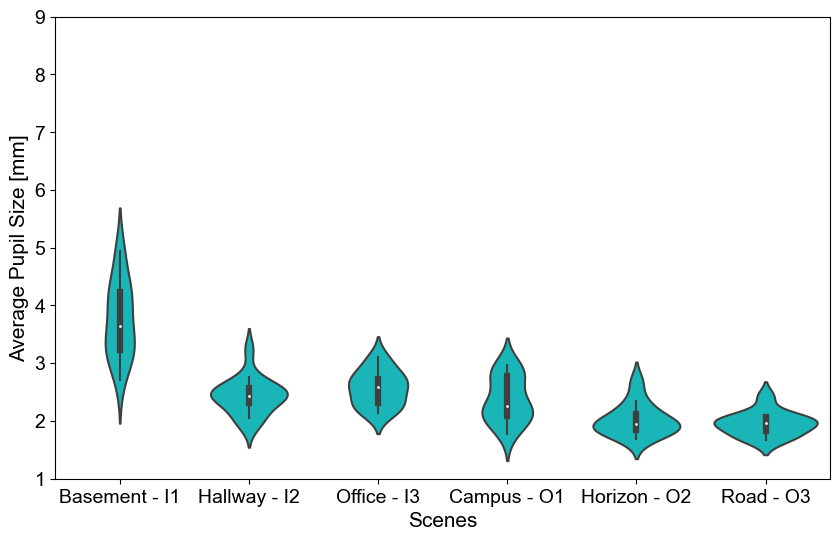

In [52]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd

# Liste aus Listen
pupil_list_all = [avr_pupil_S1, avr_pupil_S2, avr_pupil_S3, avr_pupil_S4, avr_pupil_S5, avr_pupil_S6]
for i in pupil_list_all:
    print(len(i))
# Liste von Listen in einen DataFrame umwandeln
df_pupil = pd.DataFrame(pupil_list_all).T

# Spaltennamen festlegen (optional)
column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_pupil.columns = column_names


print(df_pupil)
plt.figure(figsize=(10, 6))
sea.violinplot(data=df_pupil, color="darkturquoise")
plt.xlabel('Scenes', fontsize=15, family='Arial')
plt.ylabel('Average Pupil Size [mm]', fontsize=15, family='Arial')
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.ylim(1,9)

16
16
14
13
12
11
    Basement - I1  Hallway - I2  Office - I3  Campus - O1  Horizon - O2  \
0        1.600000      0.599999     0.599999     1.600000      2.000000   
1        0.599999      2.399981     1.399992     2.199978      0.599999   
2        0.599999      3.000030     1.000000     0.599999      0.200000   
3        1.399992      0.599999     1.200005     2.399981      1.399992   
4        1.799986      2.199978     1.200005     1.399992      1.200005   
5        1.600000      2.000000     0.599999     0.400000      1.399992   
6        2.000000      0.800000     1.600000     0.599999      1.000000   
7        2.800022      1.399992     2.000000     0.800000      1.200005   
8        2.199978      2.199978     1.000000     1.399992      1.799986   
9        1.000000      1.399992     2.199978     2.199978      2.000000   
10       1.399992      0.400000     2.199978     1.000000      0.800000   
11       0.599999      0.599999     2.199978     2.399981      1.000000   
12     

(0.0, 2.5)

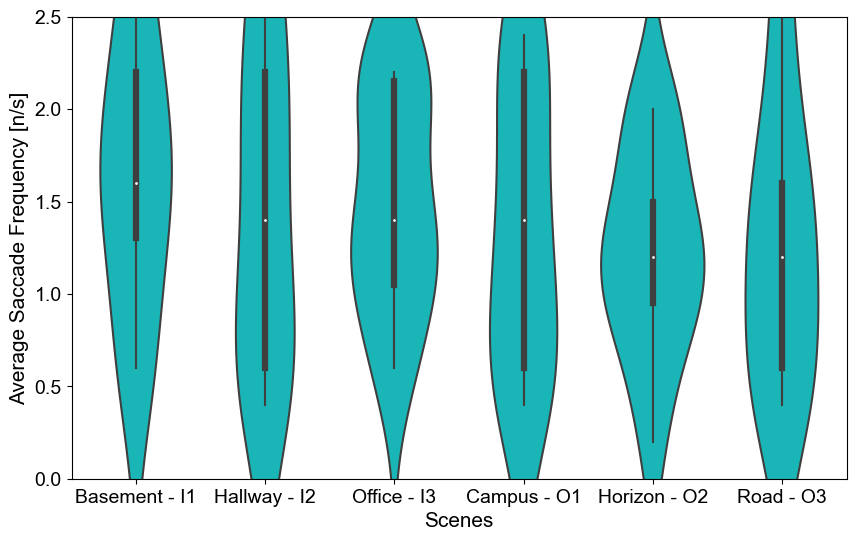

In [53]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd

# Liste aus Listen
nr_sacc_all = [freq_sacc_S1, freq_sacc_S2, freq_sacc_S3, freq_sacc_S4, freq_sacc_S5, freq_sacc_S6]
for i in nr_sacc_all:
    print(len(i))
# Liste von Listen in einen DataFrame umwandeln
df_sacc_all = pd.DataFrame(nr_sacc_all).T

# Spaltennamen festlegen (optional)
column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_sacc_all.columns = column_names

print(df_sacc_all)
plt.figure(figsize=(10, 6))
sea.violinplot(data=df_sacc_all, color="darkturquoise")
plt.xlabel('Scenes', fontsize=15, family='Arial')
plt.ylabel('Average Saccade Frequency [n/s]', fontsize=15, family='Arial')
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.ylim(0,2.5)


16
16
14
13
12
11
    Basement - I1  Hallway - I2  Office - I3  Campus - O1  Horizon - O2  \
0           225.0         170.0        144.0        223.0         303.0   
1           200.0         237.0        335.0        234.0         170.0   
2           319.0         310.0        175.0        185.0         105.0   
3           345.0         192.0        201.0        232.0         208.0   
4           256.0         331.0        265.0        184.0         170.0   
5           304.0         280.0        271.0        140.0         261.0   
6           276.0         199.0        186.0        228.0         213.0   
7           237.0         245.0        251.0        249.0         267.0   
8           253.0         300.0        204.0        410.0         220.0   
9           298.0         206.0        255.0        226.0         262.0   
10          187.0         139.0        247.0        244.0         182.0   
11          286.0         208.0        234.0        279.0         287.0   
12     

(100.0, 600.0)

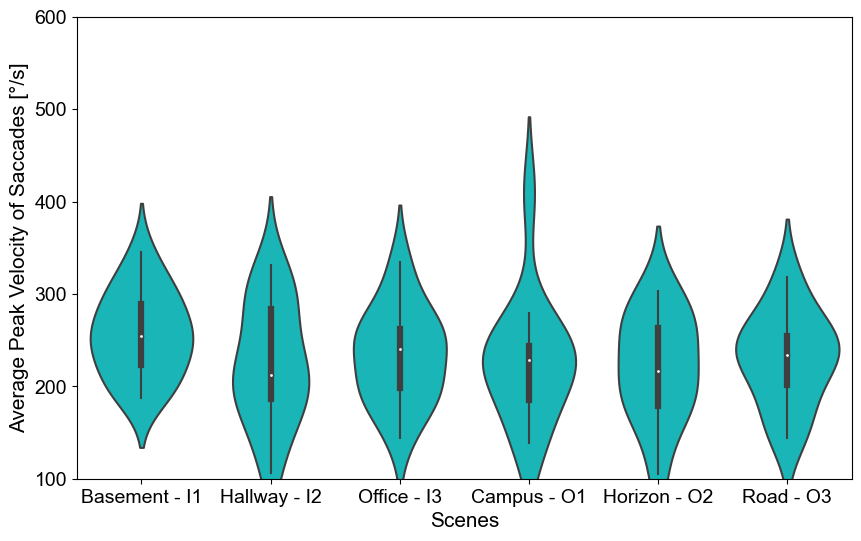

In [54]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd

# Liste aus Listen
avr_peak_velo_all = [avr_peak_velo_S1, avr_peak_velo_S2, avr_peak_velo_S3, avr_peak_velo_S4, avr_peak_velo_S5, avr_peak_velo_S6]
for i in avr_peak_velo_all:
    print(len(i))
# Liste von Listen in einen DataFrame umwandeln
df_velo_all = pd.DataFrame(avr_peak_velo_all).T

# Spaltennamen festlegen (optional)
column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_velo_all.columns = column_names


print(df_velo_all)
plt.figure(figsize=(10, 6))
sea.violinplot(data=df_velo_all,color="darkturquoise")
plt.xlabel('Scenes', fontsize=15, family='Arial')
plt.ylabel('Average Peak Velocity of Saccades [°/s]', fontsize=15, family='Arial')
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.ylim(100,600)

16
16
14
13
12
11
    Basement - I1  Hallway - I2  Office - I3  Campus - O1  Horizon - O2  \
0            4.79          5.58         2.58         5.77          8.35   
1            6.07          7.30        13.38         8.18          5.20   
2           10.42         11.55         4.13         4.09          2.80   
3           10.86          3.74         6.63         7.81          6.93   
4            7.36         11.76         7.69         6.14          3.95   
5            9.85          8.30         5.96         1.38          6.92   
6           11.30          9.23         6.66         4.16          8.56   
7           10.25         12.03        10.12         7.76          9.40   
8           11.64         13.07         4.77        11.74          5.84   
9           10.32          9.38        11.45        10.29         11.14   
10           5.93          4.43         9.76         6.62          4.53   
11           5.67          7.42        11.58         9.24          7.58   
12     

(0.0, 15.0)

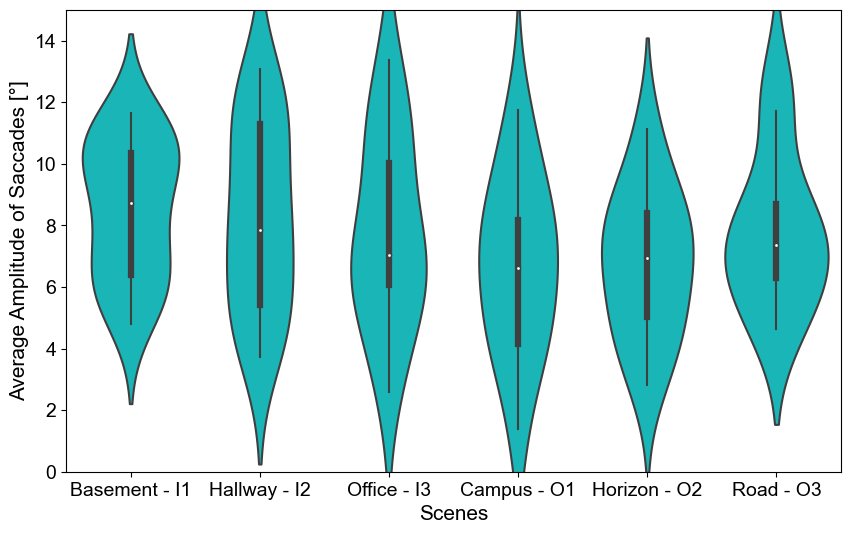

In [55]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
#data_list_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avg_fix_dur_S4, avg_fix_dur_S5, avg_fix_dur_S6]
#df = pd.DataFrame(data_list_all)
#print(df)
# Liste aus Listen
avr_amp_all = [avr_amp_S1, avr_amp_S2, avr_amp_S3, avr_amp_S4, avr_amp_S5, avr_amp_S6]
for i in avr_amp_all:
    print(len(i))
# Liste von Listen in einen DataFrame umwandeln
df_amp_all = pd.DataFrame(avr_amp_all).T

# Spaltennamen festlegen (optional)
column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_amp_all.columns = column_names

print(df_amp_all)
plt.figure(figsize=(10, 6))
sea.violinplot(data=df_amp_all,color="darkturquoise")
plt.xlabel('Scenes', fontsize=15, family='Arial')
plt.ylabel('Average Amplitude of Saccades [°]', fontsize=15, family='Arial')
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.ylim(0,15)

16
16
14
13
12
11
    Basement - I1  Hallway - I2  Office - I3  Campus - O1  Horizon - O2  \
0        3.399973      2.800022     2.800022     2.399981      4.199916   
1        2.000000      2.800022     1.600000     2.599969      1.399992   
2        1.000000      3.399973     2.000000     1.200005      2.199978   
3        3.000030      2.800022     2.399981     3.200000      1.799986   
4        2.199978      2.599969     1.600000     2.000000      3.000030   
5        2.199978      2.599969     2.800022     0.800000      3.200000   
6        2.800022      1.200005     2.000000     2.000000      1.399992   
7        3.799970      1.600000     3.000030     3.399973      2.000000   
8        2.800022      1.799986     2.399981     2.800022      3.599971   
9        1.600000      2.800022     2.800022     2.399981      2.199978   
10       2.199978      1.000000     2.599969     1.399992      1.399992   
11       0.800000      2.199978     2.399981     2.800022      2.199978   
12     

(0.0, 5.0)

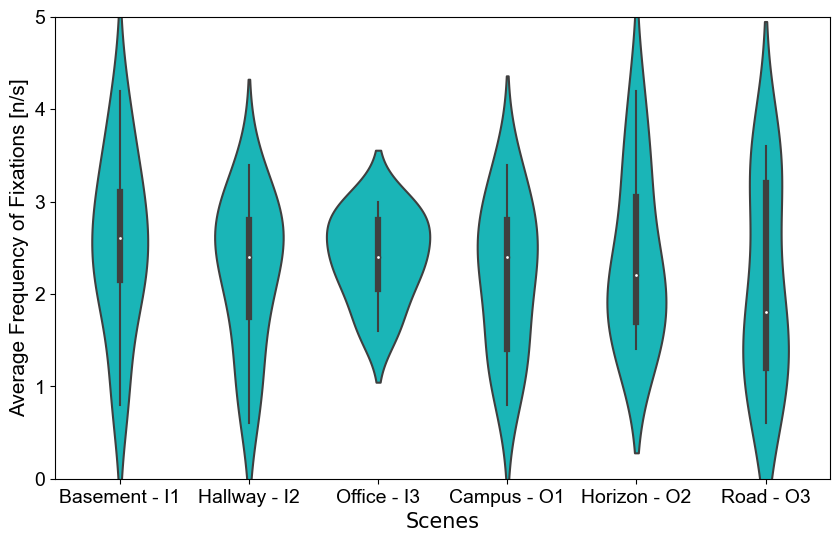

In [56]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
#data_list_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avg_fix_dur_S4, avg_fix_dur_S5, avg_fix_dur_S6]
#df = pd.DataFrame(data_list_all)
#print(df)
# Liste aus Listen
freq_fix_all = [freq_fix_S1, freq_fix_S2, freq_fix_S3, freq_fix_S4, freq_fix_S5, freq_fix_S6]
for i in freq_fix_all:
    print(len(i))
# Liste von Listen in einen DataFrame umwandeln
df_fix_all = pd.DataFrame(freq_fix_all).T

# Spaltennamen festlegen (optional)
column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_fix_all.columns = column_names

print(df_fix_all)
plt.figure(figsize=(10, 6))
sea.violinplot(data=df_fix_all, color="darkturquoise")
plt.xlabel('Scenes', fontsize=15)
plt.ylabel('Average Frequency of Fixations [n/s]', fontsize=15, family='Arial')
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.ylim(0,5)


16
16
14
13
12
11


(0.0, 3500.0)

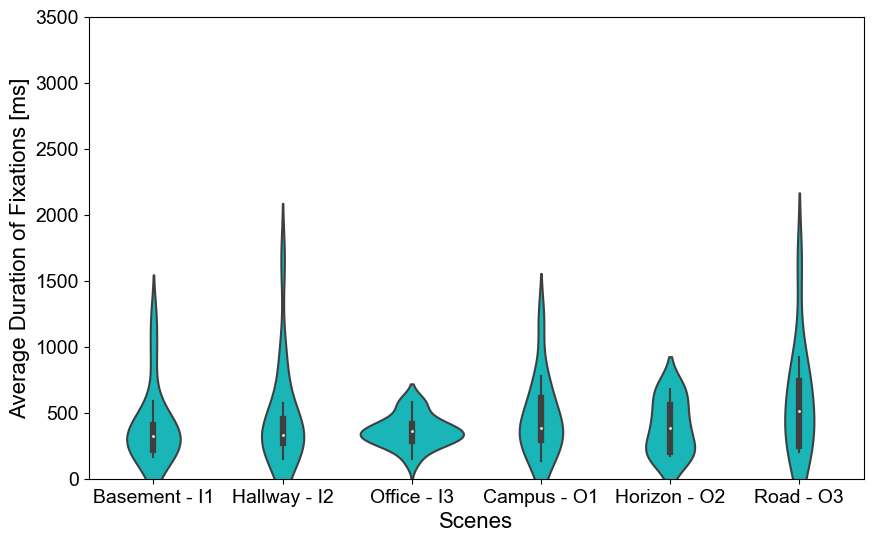

In [57]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
#data_list_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avg_fix_dur_S4, avg_fix_dur_S5, avg_fix_dur_S6]
#df = pd.DataFrame(data_list_all)
#print(df)
# Liste aus Listen

avr_dur_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avr_fix_dur_S4, avr_fix_dur_S5, avr_dur_fix_S6]
for i in avr_dur_all:
    print(len(i))
# Liste von Listen in einen DataFrame umwandeln
df_dur_all = pd.DataFrame(avr_dur_all).T

# Spaltennamen festlegen (optional)
column_names = ["Basement - I1", "Hallway - I2", "Office - I3", "Campus - O1", "Horizon - O2", "Road - O3"]
df_dur_all.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_dur_all,color="darkturquoise")
plt.xlabel('Scenes', fontsize=16, family='Arial')
plt.ylabel('Average Duration of Fixations [ms]', fontsize=16, family='Arial')
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.ylim(0, 3500)

[3.3999728002175984, 2.0, 1.0, 3.0000300003000033, 2.1999780002199976, 2.1999780002199976, 2.8000224001792016, 3.7999696002431977, 2.8000224001792016, 1.6, 2.1999780002199976, 0.8, 4.199916001679966, 2.8000224001792016, 2.3999808001535987, 3.3999728002175984, 2.8000224001792016, 2.8000224001792016, 3.3999728002175984, 2.8000224001792016, 2.5999688003743953, 2.5999688003743953, 1.2000048000192, 1.6, 1.7999856001151993, 2.8000224001792016, 1.0, 2.1999780002199976, 3.2, 2.1999780002199976, 2.1999780002199976, 0.5999988000024, 2.8000224001792016, 1.6, 2.0, 2.3999808001535987, 1.6, 2.8000224001792016, 2.0, 3.0000300003000033, 2.3999808001535987, 2.8000224001792016, 2.5999688003743953, 2.3999808001535987, 2.1999780002199976, 3.0000300003000033]
[2.3999808001535987, 2.5999688003743953, 1.2000048000192, 3.2, 2.0, 0.8, 2.0, 3.3999728002175984, 2.8000224001792016, 2.3999808001535987, 1.3999916000503998, 2.8000224001792016, 1.3999916000503998, 4.199916001679966, 1.3999916000503998, 2.199978000219

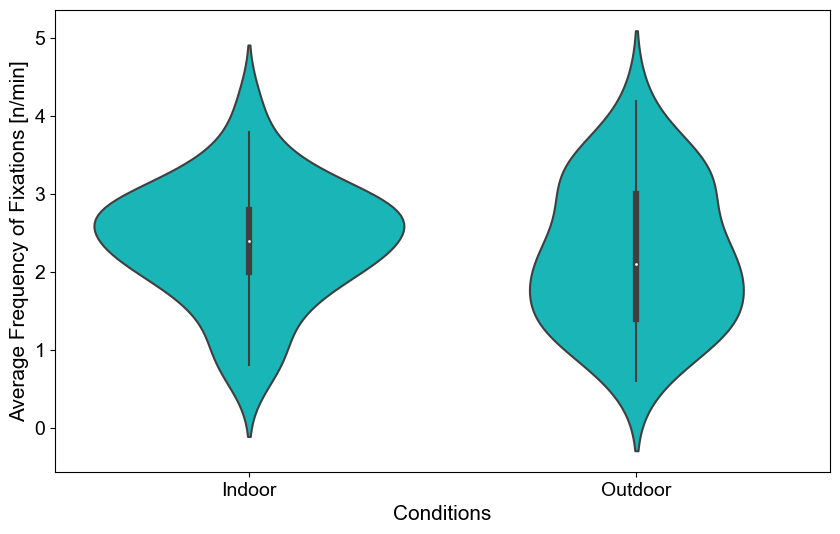

In [58]:
#Hier plotte ich für jede Frage die Ergebnisse über die Scene hinweg!
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats

#data_list_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avg_fix_dur_S4, avg_fix_dur_S5, avg_fix_dur_S6]
#df = pd.DataFrame(data_list_all)
#print(df)
# Liste aus Listen
ff_in15=[]
for item in freqfix_in:
    for i in item:
        ff_in15.append(i)
print(ff_in15)

ff_out15=[]
for item in freqfix_out:
    for i in item:
        ff_out15.append(i)
print(ff_out15)

fix_freq_all = [ff_in15, ff_out15]

# Liste von Listen in einen DataFrame umwandeln
df_fix_f15 = pd.DataFrame(fix_freq_all).T
print(df_fix_f15)
# Spaltennamen festlegen (optional)
column_names = ["Indoor", "Outdoor"]
df_fix_f15.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_fix_f15, color="darkturquoise")
plt.xlabel('Conditions',family='Arial', fontsize=15)
plt.ylabel('Average Frequency of Fixations [n/min]', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks([0,1,2,3,4,5], family='Arial')  # Corrected yticks setting

# Durchführung des t-Tests für unabhängige Stichproben
t_statistic, p_value = stats.ttest_ind(ff_in15, ff_out15)

# Ausgabe der Ergebnisse
print("T = 5 to 10s: Average Fixation Frequency T-Statistic:", t_statistic)
print("T = 5 to 10s: Average Fixation Frequency P-Value:", p_value)
print("Mean Fixation Frequency Indoor = " + str(mean_freqfix_in))
print("Mean Fixation Frequency Outdoor = " + str(mean_freqfix_out))

[163.0, 329.0, 934.0, 224.0, 418.0, 389.0, 286.0, 197.0, 300.0, 587.0, 400.0, 1215.0, 194.0, 322.0, 377.0, 189.0, 149.0, 323.0, 251.0, 272.0, 325.0, 331.0, 790.0, 573.0, 313.0, 231.0, 938.0, 331.0, 275.0, 416.0, 374.0, 1653.0, 146.0, 569.0, 433.0, 335.0, 581.0, 266.0, 448.0, 275.0, 368.0, 293.0, 349.0, 369.0, 370.0, 287.0]
[366.0, 349.0, 780.0, 247.0, 440.0, 1205.0, 424.0, 149.0, 137.0, 382.0, 671.0, 296.0, 608.0, 177.0, 657.0, 203.0, 522.0, 191.0, 210.0, 674.0, 441.0, 170.0, 407.0, 677.0, 354.0, 707.0, 511.0, 780.0, 203.0, 924.0, 229.0, 270.0, 1640.0, 602.0, 440.0, 231.0]
         0       1
0    163.0   366.0
1    329.0   349.0
2    934.0   780.0
3    224.0   247.0
4    418.0   440.0
5    389.0  1205.0
6    286.0   424.0
7    197.0   149.0
8    300.0   137.0
9    587.0   382.0
10   400.0   671.0
11  1215.0   296.0
12   194.0   608.0
13   322.0   177.0
14   377.0   657.0
15   189.0   203.0
16   149.0   522.0
17   323.0   191.0
18   251.0   210.0
19   272.0   674.0
20   325.0   441.0
21

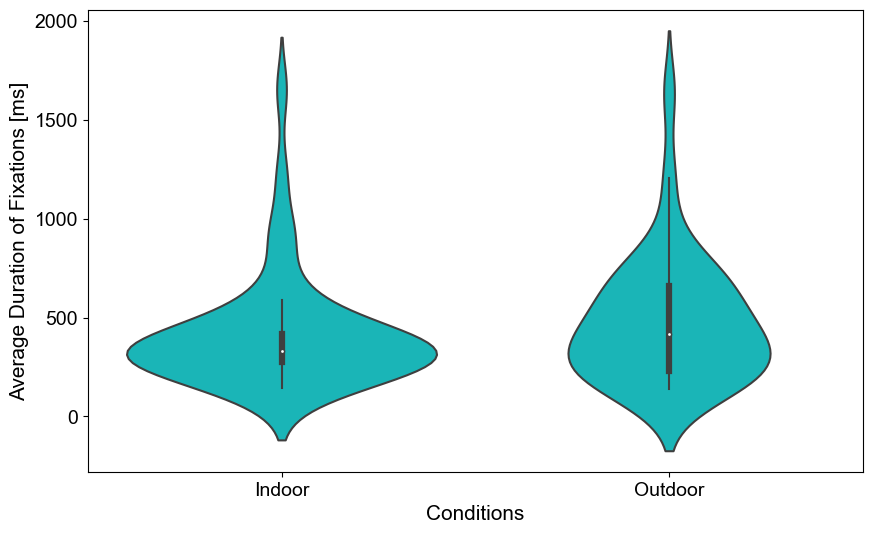

In [59]:
#Hier plotte ich für jede Frage die Ergebnisse über die Scene hinweg!
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats

#data_list_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avg_fix_dur_S4, avg_fix_dur_S5, avg_fix_dur_S6]
#df = pd.DataFrame(data_list_all)
#print(df)
# Liste aus Listen
Fdur_in15=[]
for item in dur_in:
    for i in item:
        Fdur_in15.append(i)
print(Fdur_in15)

Fdur_out15=[]
for item in dur_out:
    for i in item:
        Fdur_out15.append(i)
print(Fdur_out15)

Fdur_all = [Fdur_in15, Fdur_out15]

# Liste von Listen in einen DataFrame umwandeln
df_fdur_f15 = pd.DataFrame(Fdur_all).T
print(df_fdur_f15)
# Spaltennamen festlegen (optional)
column_names = ["Indoor", "Outdoor"]
df_fdur_f15.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_fdur_f15, color="darkturquoise")
plt.xlabel('Conditions',family='Arial', fontsize=15)
plt.ylabel('Average Duration of Fixations [ms]', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks(family='Arial')  # Corrected yticks setting

# Durchführung des t-Tests für unabhängige Stichproben
t_statistic, p_value = stats.ttest_ind(Fdur_in15, Fdur_out15)

# Ausgabe der Ergebnisse
print("T = 5 to 10s: Average Fixation Duration T-Statistic:", t_statistic)
print("T = 5 to 10s: Average Fixation Duration P-Value:", p_value)
print("Mean Indoor = " + str(mean_dur_in))
print("Mean Outdoor = " + str(mean_dur_out))


[1.6, 0.5999988000024, 0.5999988000024, 1.3999916000503998, 1.7999856001151993, 1.6, 2.0, 2.8000224001792016, 2.1999780002199976, 1.0, 1.3999916000503998, 0.5999988000024, 3.3999728002175984, 2.5999688003743953, 2.1999780002199976, 1.6, 0.5999988000024, 2.3999808001535987, 3.0000300003000033, 0.5999988000024, 2.1999780002199976, 2.0, 0.8, 1.3999916000503998, 2.1999780002199976, 1.3999916000503998, 0.4, 0.5999988000024, 3.0000300003000033, 1.7999856001151993, 1.0, 0.4, 0.5999988000024, 1.3999916000503998, 1.0, 1.2000048000192, 1.2000048000192, 0.5999988000024, 1.6, 2.0, 1.0, 2.1999780002199976, 2.1999780002199976, 2.1999780002199976, 1.3999916000503998, 2.1999780002199976]
[1.6, 2.1999780002199976, 0.5999988000024, 2.3999808001535987, 1.3999916000503998, 0.4, 0.5999988000024, 0.8, 1.3999916000503998, 2.1999780002199976, 1.0, 2.3999808001535987, 0.4, 2.0, 0.5999988000024, 0.2, 1.3999916000503998, 1.2000048000192, 1.3999916000503998, 1.0, 1.2000048000192, 1.7999856001151993, 2.0, 0.8, 1.0

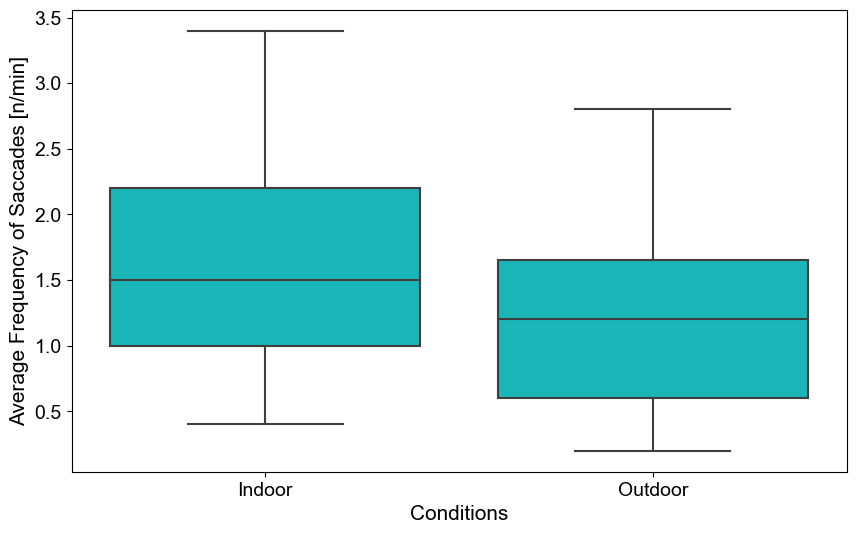

In [60]:
#Hier plotte ich für jede Frage die Ergebnisse über die Scene hinweg!
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats

#data_list_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avg_fix_dur_S4, avg_fix_dur_S5, avg_fix_dur_S6]
#df = pd.DataFrame(data_list_all)
#print(df)
# Liste aus Listen

Sfreq_in15=[]
for item in freq_in:
    for i in item:
        Sfreq_in15.append(i)
print(Sfreq_in15)

Sfreq_out15=[]
for item in freq_out:
    for i in item:
        Sfreq_out15.append(i)
print(Sfreq_out15)

Sfreq_all = [Sfreq_in15, Sfreq_out15]

# Liste von Listen in einen DataFrame umwandeln
df_Sfreq_f15 = pd.DataFrame(Sfreq_all).T
print(df_Sfreq_f15)
# Spaltennamen festlegen (optional)
column_names = ["Indoor", "Outdoor"]
df_Sfreq_f15.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.boxplot(data=df_Sfreq_f15, color="darkturquoise")
plt.xlabel('Conditions',family='Arial', fontsize=15)
plt.ylabel('Average Frequency of Saccades [n/min]', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks(family='Arial')  # Corrected yticks setting

# Durchführung des t-Tests für unabhängige Stichproben
t_statistic, p_value = stats.ttest_ind(Sfreq_in15, Sfreq_out15)


# Ausgabe der Ergebnisse
print("T = 5 to 10s: Average Frequency of Saccades T-Statistic:", t_statistic)
print("T = 5 to 10s: Average Frequency of Saccades P-Value:", p_value)

print("Mean Indoor = " + str(mean_freq_in))
print("Mean Outdoor = " + str(mean_freq_out))


[4.79, 6.07, 10.42, 10.86, 7.36, 9.85, 11.3, 10.25, 11.64, 10.32, 5.93, 5.67, 8.26, 6.48, 9.17, 7.91, 5.58, 7.3, 11.55, 3.74, 11.76, 8.3, 9.23, 12.03, 13.07, 9.38, 4.43, 7.42, 11.19, 7.13, 4.91, 4.97, 2.58, 13.38, 4.13, 6.63, 7.69, 5.96, 6.66, 10.12, 4.77, 11.45, 9.76, 11.58, 7.41, 6.33]
[5.77, 8.18, 4.09, 7.81, 6.14, 1.38, 4.16, 7.76, 11.74, 10.29, 6.62, 9.24, 3.98, 8.35, 5.2, 2.8, 6.93, 3.95, 6.92, 8.56, 9.4, 5.84, 11.14, 4.53, 7.58, 8.65, 4.65, 11.71, 7.12, 6.56, 8.75, 12.58, 6.01, 4.98, 7.35, 7.41]
        0      1
0    4.79   5.77
1    6.07   8.18
2   10.42   4.09
3   10.86   7.81
4    7.36   6.14
5    9.85   1.38
6   11.30   4.16
7   10.25   7.76
8   11.64  11.74
9   10.32  10.29
10   5.93   6.62
11   5.67   9.24
12   8.26   3.98
13   6.48   8.35
14   9.17   5.20
15   7.91   2.80
16   5.58   6.93
17   7.30   3.95
18  11.55   6.92
19   3.74   8.56
20  11.76   9.40
21   8.30   5.84
22   9.23  11.14
23  12.03   4.53
24  13.07   7.58
25   9.38   8.65
26   4.43   4.65
27   7.42  11.71

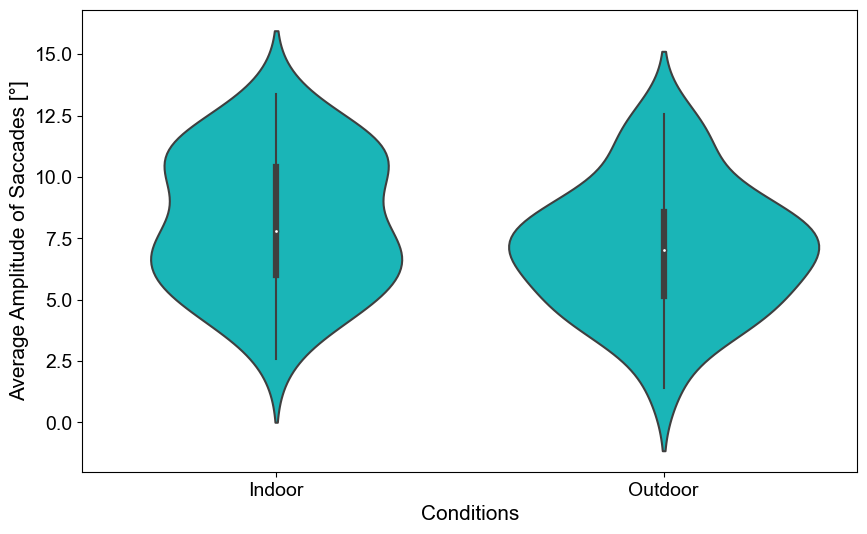

In [61]:
#Hier plotte ich für jede Frage die Ergebnisse über die Scene hinweg!
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats

#data_list_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avg_fix_dur_S4, avg_fix_dur_S5, avg_fix_dur_S6]
#df = pd.DataFrame(data_list_all)
#print(df)
# Liste aus Listen
Samp_in15=[]
for item in amp_in:
    for i in item:
        Samp_in15.append(i)
print(Samp_in15)

Samp_out15=[]
for item in amp_out:
    for i in item:
        Samp_out15.append(i)
print(Samp_out15)

Samp_all = [Samp_in15, Samp_out15]

# Liste von Listen in einen DataFrame umwandeln
df_Samp_f15 = pd.DataFrame(Samp_all).T
print(df_Samp_f15)
# Spaltennamen festlegen (optional)
column_names = ["Indoor", "Outdoor"]
df_Samp_f15.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_Samp_f15, color="darkturquoise")
plt.xlabel('Conditions',family='Arial', fontsize=15)
plt.ylabel('Average Amplitude of Saccades [°]', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks(family='Arial')  # Corrected yticks setting

# Durchführung des t-Tests für unabhängige Stichproben
t_statistic, p_value = stats.ttest_ind(Samp_in15, Samp_out15)

# Ausgabe der Ergebnisse
print("T = 5 to 10s: Average Saccade Amplitude T-Statistic:", t_statistic)
print("T = 5 to 10s: Average Saccade Amplitude P-Value:", p_value)
print("Mean Indoor = " + str(mean_amp_in))
print("Mean Outdoor = " + str(mean_amp_out))


[225.0, 200.0, 319.0, 345.0, 256.0, 304.0, 276.0, 237.0, 253.0, 298.0, 187.0, 286.0, 244.0, 194.0, 217.0, 263.0, 170.0, 237.0, 310.0, 192.0, 331.0, 280.0, 199.0, 245.0, 300.0, 206.0, 139.0, 208.0, 294.0, 216.0, 167.0, 106.0, 144.0, 335.0, 175.0, 201.0, 265.0, 271.0, 186.0, 251.0, 204.0, 255.0, 247.0, 234.0, 300.0, 197.0]
[223.0, 234.0, 185.0, 232.0, 184.0, 140.0, 228.0, 249.0, 410.0, 226.0, 244.0, 279.0, 139.0, 303.0, 170.0, 105.0, 208.0, 170.0, 261.0, 213.0, 267.0, 220.0, 262.0, 182.0, 287.0, 245.0, 253.0, 257.0, 234.0, 163.0, 283.0, 318.0, 231.0, 144.0, 214.0, 189.0]
        0      1
0   225.0  223.0
1   200.0  234.0
2   319.0  185.0
3   345.0  232.0
4   256.0  184.0
5   304.0  140.0
6   276.0  228.0
7   237.0  249.0
8   253.0  410.0
9   298.0  226.0
10  187.0  244.0
11  286.0  279.0
12  244.0  139.0
13  194.0  303.0
14  217.0  170.0
15  263.0  105.0
16  170.0  208.0
17  237.0  170.0
18  310.0  261.0
19  192.0  213.0
20  331.0  267.0
21  280.0  220.0
22  199.0  262.0
23  245.0  182.0

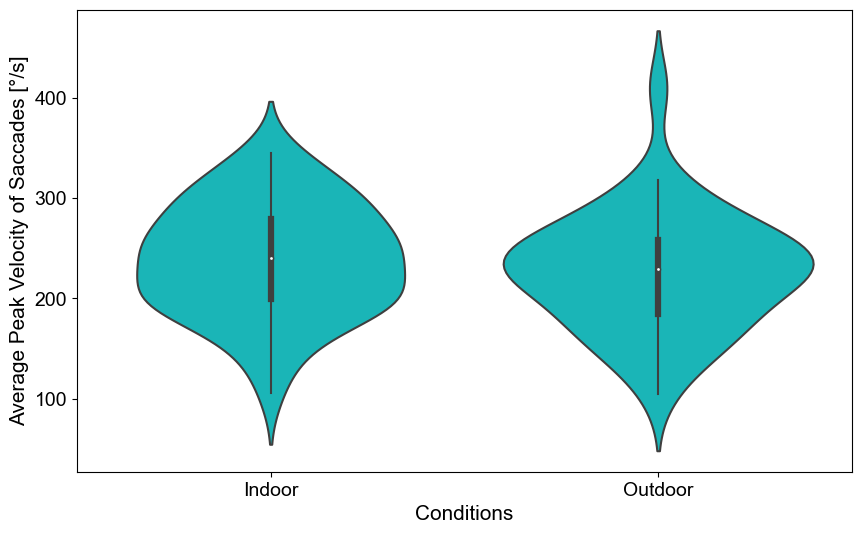

In [62]:
#Hier plotte ich für jede Frage die Ergebnisse über die Scene hinweg!
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats

#data_list_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avg_fix_dur_S4, avg_fix_dur_S5, avg_fix_dur_S6]
#df = pd.DataFrame(data_list_all)
#print(df)
# Liste aus Listen
Svelo_in15=[]
for item in velo_in:
    for i in item:
        Svelo_in15.append(i)
print(Svelo_in15)

Svelo_out15=[]
for item in velo_out:
    for i in item:
        Svelo_out15.append(i)
print(Svelo_out15)

Svelo_all = [Svelo_in15, Svelo_out15]

# Liste von Listen in einen DataFrame umwandeln
df_Svelo_f15 = pd.DataFrame(Svelo_all).T
print(df_Svelo_f15)
# Spaltennamen festlegen (optional)
column_names = ["Indoor", "Outdoor"]
df_Svelo_f15.columns = column_names
####

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_Svelo_f15, color="darkturquoise")
plt.xlabel('Conditions',family='Arial', fontsize=15)
plt.ylabel('Average Peak Velocity of Saccades [°/s]', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks(family='Arial')  # Corrected yticks setting

# Durchführung des t-Tests für unabhängige Stichproben
t_statistic, p_value = stats.ttest_ind(Svelo_in15, Svelo_out15)

# Ausgabe der Ergebnisse
print("T = 5 to 10s: Average Velocity of Saccades T-Statistic:", t_statistic)
print("T = 5 to 10s: Average Velocity of Saccades P-Value:", p_value)
print("Mean Indoor = " + str(mean_velo_in))
print("Mean Outdoor = " + str(mean_velo_out))


[3.71929, 3.15042, 4.23333, 3.39777, 3.20363, 3.07692, 4.06081, 4.15755, 4.85929, 4.24327, 4.93895, 4.2498, 3.24393, 2.71158, 3.57026, 3.33714, 2.44765, 2.50905, 2.51494, 2.41202, 2.05289, 2.19987, 2.56225, 2.38826, 2.58364, 3.24222, 2.76112, 2.05709, 2.39279, 2.33712, 1.9054, 2.60241, 2.59569, 2.56694, 2.8448, 2.19824, 2.27828, 2.72664, 2.71605, 3.01692, 3.1009, 2.13902, 2.46827, 2.37938, 2.22578, 2.73084]
[2.09243, 1.96194, 2.77339, 2.11545, 2.25325, 2.8134, 2.90023, 2.22754, 2.05079, 2.32475, 2.96747, 2.57919, 1.78024, 1.89525, 1.96839, 1.80956, 2.35354, 1.82782, 1.97675, 2.19817, 2.68412, 1.94404, 2.10418, 1.6837, 1.84434, 1.89814, 2.42025, 1.90707, 1.95948, 2.08589, 1.9821, 1.71899, 2.04724, 2.08054, 1.7566, 1.67473]
          0        1
0   3.71929  2.09243
1   3.15042  1.96194
2   4.23333  2.77339
3   3.39777  2.11545
4   3.20363  2.25325
5   3.07692  2.81340
6   4.06081  2.90023
7   4.15755  2.22754
8   4.85929  2.05079
9   4.24327  2.32475
10  4.93895  2.96747
11  4.24980  2.5

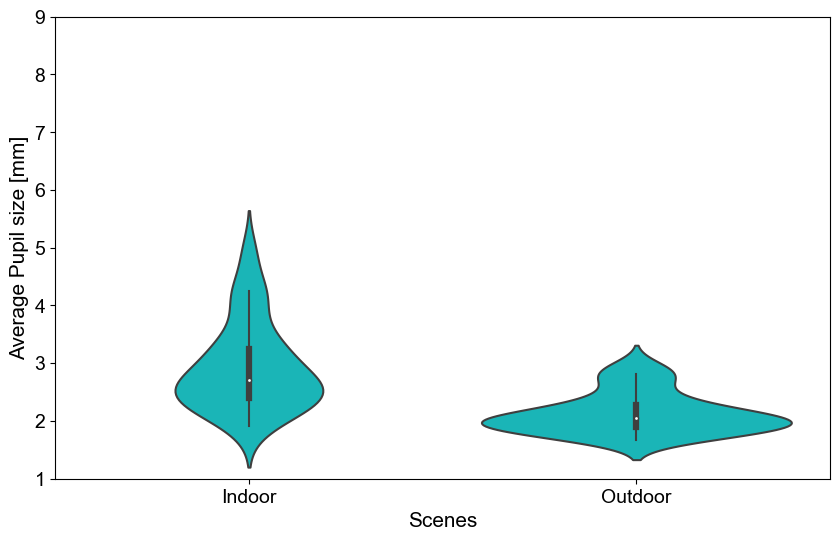

In [63]:
#Hier plotte ich für jede Frage die Ergebnisse über die Scene hinweg!
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats

#data_list_all = [avg_fix_dur_S1, avg_fix_dur_S2, avg_fix_dur_S3, avg_fix_dur_S4, avg_fix_dur_S5, avg_fix_dur_S6]
#df = pd.DataFrame(data_list_all)
#print(df)
# Liste aus Listen
Pup_in15=[]
for item in pupil_in:
    for i in item:
        Pup_in15.append(i)
print(Pup_in15)

Pup_out15=[]
for item in pupil_out:
    for i in item:
        Pup_out15.append(i)
print(Pup_out15)

Pup_all = [Pup_in15, Pup_out15]

# Liste von Listen in einen DataFrame umwandeln
df_Pup_f15 = pd.DataFrame(Pup_all).T
print(df_Pup_f15)
# Spaltennamen festlegen (optional)
column_names_IO = ["Indoor", "Outdoor"]
df_Pup_f15.columns = column_names_IO
####

plt.figure(figsize=(10, 6))
sea.violinplot(data=df_Pup_f15, color="darkturquoise")
plt.xlabel('Scenes',family='Arial', fontsize=15)
plt.ylabel('Average Pupil size [mm]', family='Arial', fontsize=15)
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')
plt.yticks(family='Arial')  # Corrected yticks setting
plt.ylim(1,9)

# Durchführung des t-Tests für unabhängige Stichproben
t_statistic, p_value = stats.ttest_ind(Pup_in15, Pup_out15)

# Ausgabe der Ergebnisse
print("T = 5 to 10s: Average Pupil size T-Statistic:", t_statistic)
print("T = 5 to 10s: Average Pupil size P-Value:", p_value)
print("Mean Indoor = " + str(mean_pupil_in))
print("Mean Outdoor = " + str(mean_pupil_out))


p-value Pupil 5
2.267008870018337e-06
p-value Pupil 10
4.934953365137073e-08
p-value Pupil 15
7.92276339196718e-08
p-value Fdur 5
0.7456239826103451
p-value Fdur 10
0.3521668253339123
p-value Fdur 15
0.34429226929379
p-value Ffreq 5
0.40005609799392416
p-value Ffreq 10
0.9073534435854773
p-value Ffreq 15
0.3508145805370855
p-value Svelo 5
0.007175117874452958
p-value Svelo 10
0.5725892258806087
p-value Svelo 15
0.3444450719715756
p-value Samp 5
0.011834562921995154
p-value Samp 10
0.4482450580181222
p-value Samp 15
0.06297205516587986
p-value Sfreq 5
0.0025199920281555833
p-value Sfreq 10
0.05764379883246095
p-value Sfreq 15
0.0781442272379665
Sfreqin5
[2.0, 1.7999856001151993, 2.1999780002199976, 1.0, 2.1999780002199976, 2.3999808001535987, 1.0, 1.3999916000503998, 1.0, 2.8000224001792016, 2.0, 1.3999916000503998, 1.3999916000503998, 2.0, 2.5999688003743953, 2.1999780002199976, 1.0, 1.3999916000503998, 2.8000224001792016, 0.8, 2.0, 1.3999916000503998, 2.3999808001535987, 1.0, 0.8, 1.3

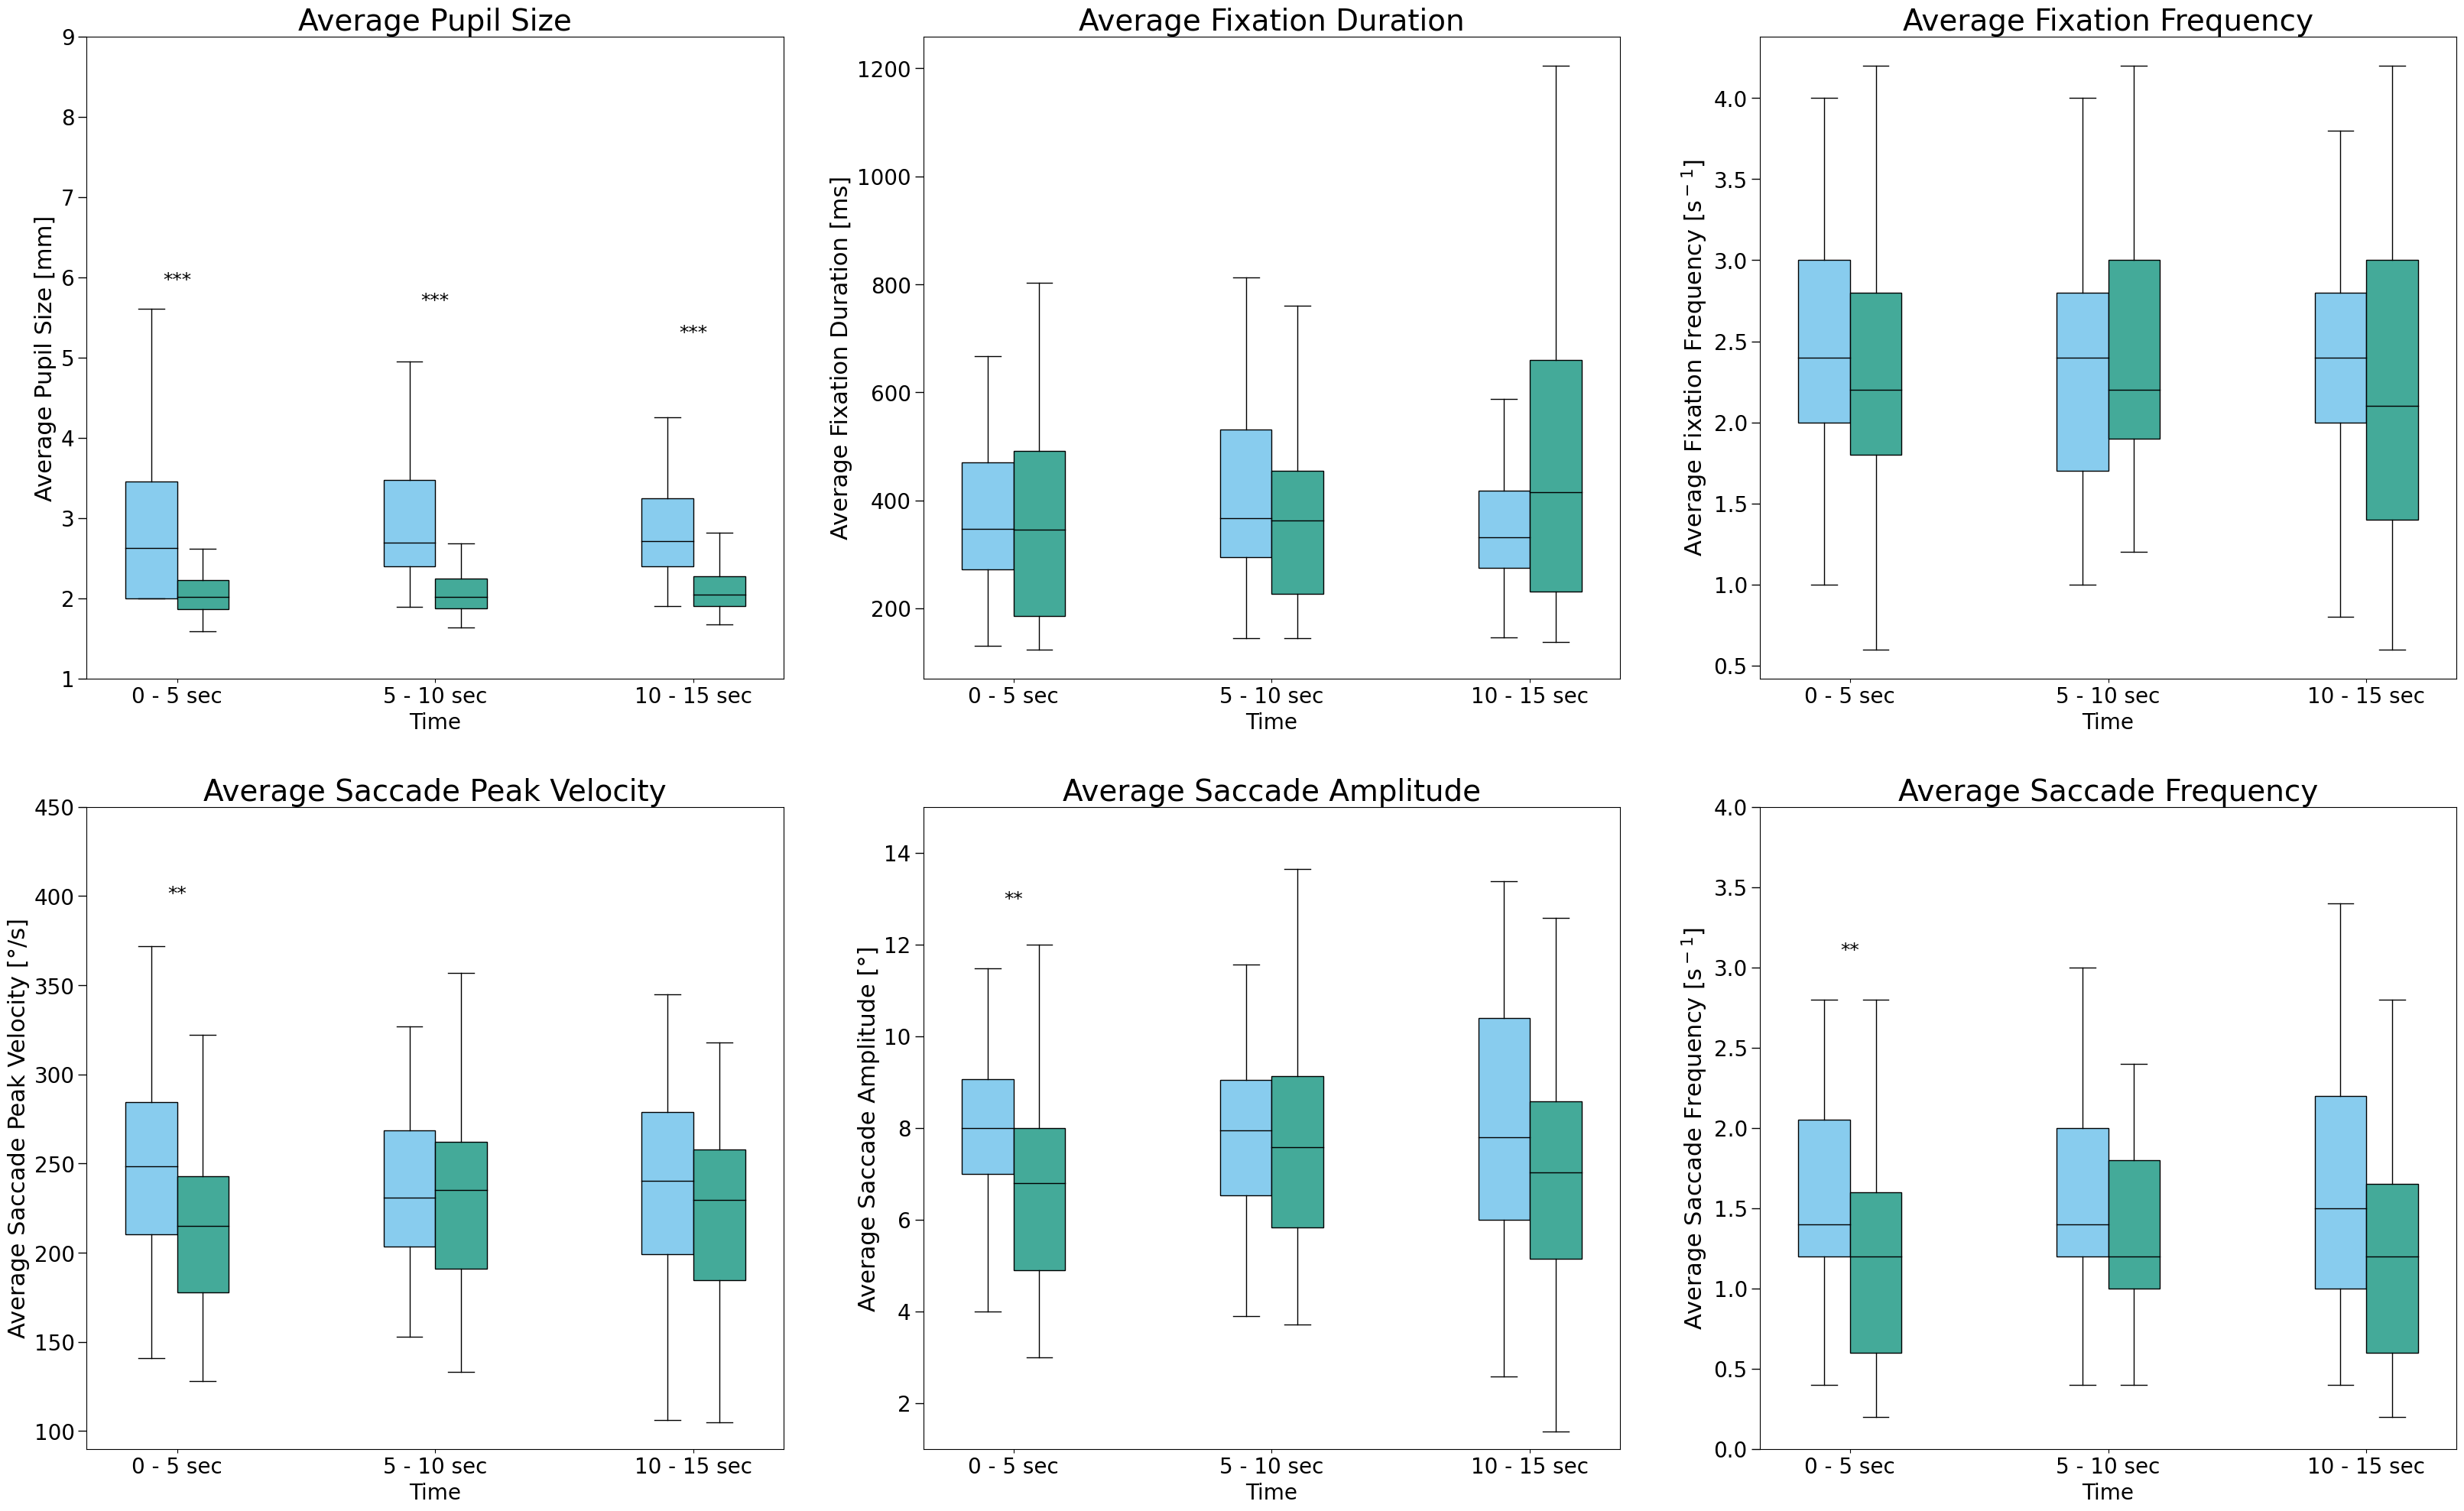

In [64]:
#This is the one
#
#
#
#
#
#
#
#
#
#

import matplotlib.pyplot as plt
import numpy as np

# Define different sets of data for each subplot
data_a1 = [Pup_in, Pup_in10, Pup_in15]
data_b1 = [Pup_out, Pup_out10, Pup_out15]
print("p-value Pupil 5")
t_statistic, p_value = stats.ttest_ind(Pup_in, Pup_out)
print(p_value)
print("p-value Pupil 10")
t_statistic, p_value = stats.ttest_ind(Pup_in10, Pup_out10)
print(p_value)
print("p-value Pupil 15")
t_statistic, p_value = stats.ttest_ind(Pup_in15, Pup_out15)
print(p_value)
data_a2 = [Fdur_in5,Fdur_in10,Fdur_in15]
data_b2 = [Fdur_out5,Fdur_out10,Fdur_out15]
print("p-value Fdur 5")
t_statistic, p_value = stats.ttest_ind(Fdur_in5, Fdur_out5)
print(p_value)
print("p-value Fdur 10")
t_statistic, p_value = stats.ttest_ind(Fdur_in10, Fdur_out10)
print(p_value)
print("p-value Fdur 15")
t_statistic, p_value = stats.ttest_ind(Fdur_in15, Fdur_out15)
print(p_value)
data_a3 = [ff_in5,ff_in10,ff_in15]
data_b3 = [ff_out5,ff_out10,ff_out15]
print("p-value Ffreq 5")
t_statistic, p_value = stats.ttest_ind(ff_in5, ff_out5)
print(p_value)
print("p-value Ffreq 10")
t_statistic, p_value = stats.ttest_ind(ff_in10, ff_out10)
print(p_value)
print("p-value Ffreq 15")
t_statistic, p_value = stats.ttest_ind(ff_in15, ff_out15)
print(p_value)
data_a4 = [Svelo_in5,Svelo_in10,Svelo_in15]
data_b4 = [Svelo_out5,Svelo_out10,Svelo_out15]
print("p-value Svelo 5")
t_statistic, p_value = stats.ttest_ind(Svelo_in5, Svelo_out5)
print(p_value)
print("p-value Svelo 10")
t_statistic, p_value = stats.ttest_ind(Svelo_in10, Svelo_out10)
print(p_value)
print("p-value Svelo 15")
t_statistic, p_value = stats.ttest_ind(Svelo_in15, Svelo_out15)
print(p_value)
data_a5 = [Samp_in5,Samp_in10,Samp_in15]
data_b5 = [Samp_out5,Samp_out10,Samp_out15]
print("p-value Samp 5")
t_statistic, p_value = stats.ttest_ind(Samp_in5, Samp_out5)
print(p_value)
print("p-value Samp 10")
t_statistic, p_value = stats.ttest_ind(Samp_in10, Samp_out10)
print(p_value)
print("p-value Samp 15")
t_statistic, p_value = stats.ttest_ind(Samp_in15, Samp_out15)
print(p_value)
data_a6 = [Sfreq_in5,Sfreq_in10,Sfreq_in15]
data_b6 = [Sfreq_out5,Sfreq_out10,Sfreq_out15]
print("p-value Sfreq 5")
t_statistic, p_value = stats.ttest_ind(Sfreq_in5, Sfreq_out5)
print(p_value)
print("p-value Sfreq 10")
t_statistic, p_value = stats.ttest_ind(Sfreq_in10, Sfreq_out10)
print(p_value)
print("p-value Sfreq 15")
t_statistic, p_value = stats.ttest_ind(Sfreq_in15, Sfreq_out15)
print(p_value)
print("Sfreqin5")
print(Sfreq_in5)
print("Sfreqout5")
print(Sfreq_out5)
print("Sfreqin10")
print(Sfreq_in10)
print("Sfreqout10")
print(Sfreq_out10)
print("Sfreqin15")
print(Sfreq_in15)
print("Sfreqout15")
print(Sfreq_out15)
ticks = ['0 - 5 sec', '5 - 10 sec', '10 - 15 sec']

titles = ['Average Pupil Size', 'Average Fixation Duration', 'Average Fixation Frequency', 'Average Saccade Peak Velocity', 'Average Saccade Amplitude', 'Average Saccade Frequency']
y_labels = ['Average Pupil Size [mm]', 'Average Fixation Duration [ms]', 'Average Fixation Frequency [s$^-$$^1$]', 'Average Saccade Peak Velocity [°/s]', 'Average Saccade Amplitude [°]', 'Average Saccade Frequency [s$^-$$^1$]']
x_labels = ['Time', 'Time', 'Time', 'Time', 'Time', 'Time']


def set_box_color(bp, box_color, median_color):
    for box in bp['boxes']:
        box.set_facecolor(box_color)
    for median in bp['medians']:
        median.set_color(median_color)

fig = plt.figure(figsize=(40, 24))

# Create subplots and set background color to white
ax1 = fig.add_subplot(231, facecolor='white')
ax2 = fig.add_subplot(232, facecolor='white')
ax3 = fig.add_subplot(233, facecolor='white')
ax4 = fig.add_subplot(234, facecolor='white')
ax5 = fig.add_subplot(235, facecolor='white')
ax6 = fig.add_subplot(236, facecolor='white')

condition1 = [True, False, False]  # Example condition, modify as needed
condition2 = [False, True, False]  # Example condition, modify as needed
condition3 = [False, False, True]  # Example condition, modify as needed

# Define data for each subplot
data_a = [data_a1, data_a2, data_a3,data_a4,data_a5,data_a6]
data_b = [data_b1, data_b2,data_b3,data_b4,data_b5,data_b6]
# Define more data if needed

axes = [ax1, ax2, ax3, ax4, ax5, ax6]

# Loop through subplots
for i, ax in enumerate(axes):
    if i < len(data_a):
        positions_a = np.array(range(3)) * 2.0 - 0.2
        positions_b = np.array(range(3)) * 2.0 + 0.2

        boxes_a = ax.boxplot(data_a[i], positions=positions_a, sym='', widths=0.4, patch_artist=True)
        boxes_b = ax.boxplot(data_b[i], positions=positions_b, sym='', widths=0.4, patch_artist=True)

        set_box_color(boxes_a, '#88CCEE', 'black')
        set_box_color(boxes_b, '#44AA99', 'black')
        
        ax.set_title(titles[i], color='black',fontsize=28)
        ax.set_xlabel(x_labels[i], color='black', fontsize=20)
        ax.tick_params(labelsize=20)
        ax.set_xticks(np.arange(len(ticks)) * 2, fontsize=22)
        ax.set_xticklabels(ticks)        
        ax.spines['left'].set_color('black')
        ax.spines['bottom'].set_color('black')
        ax.tick_params(axis='y', colors='black', length=8.0, width=1, left=True)
        ax.set_ylabel(y_labels[i], color='black', fontsize=22)
        
        # Add asterisks based on condition, only for lower row subplots
        if i == 3:  # Adjusted to apply to lower row subplots
            for j, cond in enumerate(condition1):
                if cond:
                    ax.text(j * 2, max(data_a[i][j]) - 10, '**', ha='center', va='bottom', fontsize=18)
                    #ax.text(j * 2, max(data_a[i][j]) - 16, 'p = 0.0072', ha='center', va='bottom', fontsize=9)
        if i == 4:  # Adjusted to apply to lower row subplots
            for j, cond in enumerate(condition1):
                if cond:
                    ax.text(j * 2, max(data_a[i][j]) - 2.7, '**', ha='center', va='bottom', fontsize=18)
                    #ax.text(j * 2, max(data_a[i][j]) - 2.9, 'p = 0.0049', ha='center', va='bottom', fontsize=9)
        if i == 5:  # Adjusted to apply to lower row subplots
            for j, cond in enumerate(condition1):
                if cond:
                    ax.text(j * 2, max(data_a[i][j]) + 0.25, '**', ha='center', va='bottom', fontsize=18)
                    #ax.text(j * 2, max(data_a[i][j]) + 0.17, 'p = 0.0025', ha='center', va='bottom', fontsize=9)
        if i == 0:  # Adjusted to apply to lower row subplots
            for j, cond in enumerate(condition1):
                if cond:
                    ax.text(j * 2, max(data_a[i][j]) + 0.25, '***', ha='center', va='bottom', fontsize=18)
                    #ax.text(j * 2, max(data_a[i][j]) + 0.15, 'p = 1.307e-09', ha='center', va='bottom', fontsize=9)
            for j, cond in enumerate(condition2):
                if cond:
                    ax.text(j * 2, max(data_a[i][j]) + 0.25, '***', ha='center', va='bottom', fontsize=18)
                    #ax.text(j * 2, max(data_a[i][j]) + 0.15, 'p= 4.935e-08', ha='center', va='bottom', fontsize=9)
            for j, cond in enumerate(condition3):
                if cond:
                    ax.text(j * 2, max(data_a[i][j]) + 0.25, '***', ha='center', va='bottom', fontsize=18)
                    #ax.text(j * 2, max(data_a[i][j]) + 0.15, 'p = 7.923e-08', ha='center', va='bottom', fontsize=9)
        for i, ax in enumerate(axes):
            if i == 0:
                ax.set_ybound(lower=1, upper=9)
        for i, ax in enumerate(axes):
            if i == 3:
                ax.set_ybound(lower=90, upper=450)
        for i, ax in enumerate(axes):
            if i == 4:
                ax.set_ybound(lower=1, upper=15)
        for i, ax in enumerate(axes):
            if i == 5:
                ax.set_ybound(lower=0, upper=4)
                
            pass

#plt.tight_layout()
#Lower saccade velocity and amplitude outdoors is predictable. The objects being looked at in the outdoor areas are usually further away resulting in smaller amplitude (angular distance between to focused objects) and velocity. (PUBLIcATION???)
plt.show()